## Анализ рынка игровой индустрии

<a id=content></a>
### Содержание

<br>[Описание проекта](#descr_proj)
<br>[Описание данных](#descr_data)
<br>
1. [<b>Загрузка данных и получение общей информации</b>](#1)
2. [<b>Предварительная обработка данных</b>](#2)
<br>[2.1. Приведение к нижнему регистру](#2.1.)
<br>[2.2. Изменение типов данных](#2.2.)
<br>[2.3. Обработка пропущенных значений](#2.3.)
<br>[2.4. Обработка дубликатов](#2.4.)
<br>[2.5. Создание дополнительных признаков](#2.5.)
3. [<b>Исследовательский анализ данных</b>](#3)
<br>[3.1. Ретроспектива количества выпуска игр. Определение хронологических рамок исследования](#3.1.)
<br>[3.2. Динамика продаж в разрезе платформ. Платформы с наибольшими суммарными продажами. Характерный период возникновения и исчезновения старых платформ](#3.2.)
<br>[3.3. Актуальный период исследования для подготовки прогноза на 2017 год](#3.3.)
<br>[3.4. Платформы-лидеры продаж, платформы в стадии роста или падения. Потенциально прибыльные платформы](#3.4.)
<br>[3.5. Глобальные продажи игр в разрезе платформ (диаграмма размаха значений)](#3.5.)
<br>[3.6. Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы. Корреляция между отзывами и продажами (диаграмма рассеяния с линией регрессии)](#3.6.)
<br>[3.7. Сопоставление выводов с продажами игр на других платформах](#3.7.)
<br>[3.8. Общее распределение игр по жанрам. Самые прибыльные жанры. Жанры с высокими и низкими продажами](#3.8.)
4. [<b>Формирование портрета пользователя каждого региона (`NA`, `EU`, `JP`)</b>](#4)
<br>[4.1. Самые популярные платформы (топ-5). Различия в долях продаж](#4.1.)
<br>[4.2. Самые популярные жанры (топ-5)](#4.2.)
<br>[4.3. Влияние рейтинга `ESRB` на продажи в каждом регионе](#4.3.)
5. [<b>Проверка гипотез</b>](#5)
<br>[5.1. Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые](#5.1.)
<br>[5.2. Средние пользовательские рейтинги жанров `Action` и `Sports` разные](#5.2.)
6. [<b>Подведение итогов</b>](#6)

<a id=descr_proj></a>
### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура *ESRB* (*Entertainment Software Rating Board*) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». Данные за 2016 год могут быть неполными.

<a id=descr_data></a>
### Описание данных
Исходный датафрейм содержит информацию в количестве 16 715 срок на 11 столбцов. Последовательное применение методов min(), max() и unique() позволило нам сформировать таблицу ниже:

|№ п/п| Наименование признака | Краткое описание                                       | Единицы измерения | Значение |
|---|:------------------------|:-------------------------------------------------------|:------------------|:---------|
|1. |`Name`            |название игры| название продукта | 11 560 |
|2. |`Platform`        |платформа| название платформы, всего 31 ед. | `2600`, `3DO`, `3DS`, `DC`, `DS`, `GB`, `GBA`, `GC`, `GEN`, `GG`, `N64`, `NES`, `NG`, `PC`, `PCFX`, `PS`, `PS2`, `PS3`, `PS4`, `PSP`, `PSV`, `SAT`, `SCD`, `SNES`, `TG16`, `Wii`, `WiiU`, `WS`, `X360`, `XB`, `XOne` |
|3. |`Year_of_Release` |год выпуска| дата, всего 38 ед. | 1980 - 2016 |
|4. |`Genre`           |жанр игры| название игрового жанра, всего 12 ед. |`Action`, `Adventure`, `Fighting`, `Misc`, `Platform`, `Puzzle`, `Racing`, `Role-Playing`, `Shooter`, `Simulation`, `Sports`, `Strategy`|
|5. |`NA_sales`        |продажи в Северной Америке | миллионы проданных копий | 0 - 41.36 |
|6. |`EU_sales`        |продажи в Европе | миллионы проданных копий | 0 - 28.96 |
|7. |`JP_sales`        |продажи в Японии | миллионы проданных копий | 0 - 10.22|
|8. |`Other_sales`     |продажи в других странах | миллионы проданных копий | 0 - 10.57 |
|9. |`Critic_Score`    |оценка критиков | оценка из максимально возможных 100 баллов | 13 - 98 |
|10. |`User_Score`      |оценка пользователей | оценка из максимально возможных 10 баллов, в том числе требующие уточнения рейтинги с маркировкой `tbd` | 0 - 9.7 |
|11. |`Rating`          |возрастной рейтинг| возрастная категория, всего 8 ед. |`AO`, `E`, `E10+`, `EC`, `K-A`, `M`, `RP`, `T`|

[к содержанию](#content) | [шаг 1](#1) | [шаг 2](#2) | [шаг 3](#3) | [шаг 4](#4) | [шаг 5](#5) | [шаг 6](#6)

<a id=1></a>
### Шаг 1. Загрузка данных и получение общей информации

In [1]:
# импорт библиотек
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statistics import variance
from scipy import stats as st

# игнорирование системных предупреждений об обновлениях работы функций
import warnings
warnings.simplefilter('ignore')

# настройка вывода визуализации
%matplotlib inline

In [2]:
# загрузка файла в датафрейм
try:
    df = pd.read_csv('games.csv', sep=',')
except:
    df = pd.read_csv('/datasets/games.csv', sep=',')

In [3]:
# выводим первые 5 строк датафрейма для ознакомления
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# выводим основную информацию о количестве записей, количестве ненулевых значений, типах признаков 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# первичный статистический анализ
df.describe().astype(int)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446,16715,16715,16715,16715,8137
mean,2006,0,0,0,0,68
std,5,0,0,0,0,13
min,1980,0,0,0,0,13
25%,2003,0,0,0,0,60
50%,2007,0,0,0,0,71
75%,2010,0,0,0,0,79
max,2016,41,28,10,10,98


**Вывод:** на основании результатов последовательного применения методов `min()`, `max()`, `unique()`, `info()` и `describe()`, а также цепочки методов `isna().sum()` мы получили первичную информацию для статистического анализа. Так, исходный датафрейм содержит 16715 строк в разрезе 11 признаков. 

Выявлены пропуски значений: в признаках `Name` и `Genre` по 2 пропуска, в признаке `Year_of_Release` отсутствуют данные по 269 играм, в значительном объёме от 6701 до 8578 строк (или от 40% до 51%) данные не представлены по признакам `User_Score`, `Critic_Score` и `Rating`.

Также нами установлено несоответствие типа признака хранимой информации, предстоит выявить аномальные и дублирующие значения.  Данные загрязнены, требуется проведение комплексной предобработки данных для дальнейшего исследования. Подробная информация о необходимых видах предварительной обработки представлена в таблице ниже.

*Таблица. Виды необходимой предварительной обработки данных*

| № п/п | Название         | Наличие пропусков                | Изменение типа данных  |
|-------|:-----------------|:---------------------------------|:------------------------------------------|
|1.     |`Name`            | <font color='red'>2 пропуска     | сохранение типа данных object |
|2.     |`Platform`        | нет                              | сохранение типа данных object |
|3.     |`Year_of_Release` | <font color='red'>269 пропусков  | <font color='red'>float необходимо перевести в int |
|4.     |`Genre`           | <font color='red'>2 пропуска     | сохранение типа данных object |
|5.     |`NA_sales`        | нет                              | сохранение типа данных float |
|6.     |`EU_sales`        | нет                              | сохранение типа данных float |
|7.     |`JP_sales`        | нет                              | сохранение типа данных float |
|8.     |`Other_sales`     | нет                              | сохранение типа данных float |
|9.     |`Critic_Score`    | <font color='red'>8578 пропусков | сохранение типа данных float |
|10.    |`User_Score`      | <font color='red'>6701 пропуск   | <font color='red'>object необходимо перевести в float |
|11.    |`Rating`          | <font color='red'>6766 пропусков | сохранение типа данных object |

[к содержанию](#content) | [шаг 1](#1) | [шаг 2](#2) | [шаг 3](#3) | [шаг 4](#4) | [шаг 5](#5) | [шаг 6](#6)

<a id=2></a>
### 2. Предварительная обработка данных

<a id=2.1.></a>
#### 2.1. Приведение к нижнему регистру

In [6]:
# приведём все названия признаков к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
# выводим названия признаков для ознакомления с результатами преобразований
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id=2.2.></a>
#### 2.2. Изменение типов данных

В целях выполнения исследовательской работы полагаем необходимым преобразование типов данных по 2 признакам, а именно:
* `year_of_release` - перевести в `int`, поскольку хранит данные только о годе выпуска той или иной игры
* `user_score` - перевести в `float` в соответствии с со смысловым значением оценок, выставленных пользователями той или иной игре

In [8]:
# подсчитаем количество пропущенных значений в признаке `year_of_release`
df['year_of_release'].isna().sum()

269

In [9]:
# подсчитаем процентаж пропущенных значений в признаке `year_of_release`
(df['year_of_release'].isna().sum() / len(df['year_of_release'])).round(2)

0.02

In [10]:
# удаляем строки, где пропущены значения в признаке `year_of_release`
df = df.dropna(subset=['year_of_release'])

In [11]:
# меняем тип данных признака `year_of_release` на целочисленный
df['year_of_release'] = df['year_of_release'].astype(int)

In [12]:
# выводим уникальные значения признака `year_of_release` после преобразований
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

В признаке `user_score` встречаются не только численные значения и пропуски данных, но и значение `tbd` (англ. to be determined) - необходимо уточнить. Таким образом, оценка пользователя той или иной игры остаётся для нас неизвестной, что равносильно пропуску значения. В соответствии с этой логикой вещей, мы заменим встречающееся значение `tbd` на `NaN`.

In [13]:
# выводим уникальные значения признака `user_score`
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
# замена `tbd` на `NaN`
df['user_score'].replace('tbd', np.nan, inplace=True)

In [15]:
# замена типа данных признака `user_score`
df['user_score'] = df['user_score'].astype(float)

In [16]:
# выводим основную информацию о датафрейме после преобразований
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


<a id=2.3.></a>
#### 2.3. Обработка пропущенных значений

In [17]:
# выявление пропусков данных в разрезе каждого признака
df.isna().sum().sort_values(ascending=True)

platform              0
year_of_release       0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
rating             6678
critic_score       8463
user_score         8983
dtype: int64

In [18]:
# выявление пропусков данных в разрезе каждого признака в процентном соотношении
df_missing = pd.DataFrame(columns=['название признака', 'количество пропусков', '% пропущенных значений'])
j = 0
for i, col in enumerate(df.columns):
    percent_missing = np.mean(df[col].isnull())
    value_missing = np.sum(df[col].isnull())
    if percent_missing != 0:
        df_missing.loc[j] = [col, value_missing, (percent_missing*100).round(2)]
        j +=1

print('Таблица 2. Информация о количестве пропусков', '\n\n', df_missing.sort_values(by='количество пропусков', ascending=True))

Таблица 2. Информация о количестве пропусков 

   название признака  количество пропусков  % пропущенных значений
0              name                     2                    0.01
1             genre                     2                    0.01
4            rating                  6678                   40.61
2      critic_score                  8463                   51.46
3        user_score                  8983                   54.62


In [19]:
# уточним информацию по строкам с пропусками по признаку `name`
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Таким образом, пропуски по признаку `name` и `genre` пристутствуют в одних и тех же двух строках. Удалим их. 

In [20]:
# удаляем строки, где пропущены значения в признаке `name` и `genre`
df = df.dropna(subset=['name'])

В датафрейме остаётся существенное количество пропусков по трём признакам: `rating` (нет данных по 40.6% значений), `critic_score` (нет данных по 51.45% значений) и `user_score` (нет данных по 54.62% значений). Рассмотрим пропуски по этим признакам подробнее.

**`rating`** Классификация компьютерных видеоигр регулируется в соответствии с политикой государств и организаций, связанной с определённым отношением к людям различного возраста. В её основе лежит мнение о физической и умственной неравноценности лиц различного паспортного возраста. На территории США, Мексики и Канады с 1994 года действует ESRB (ныне - ESA, Совет по рейтингу развлекательного программного обеспечения), а в ряде других стран действует порядка 30 негосударственных организаций, основным направлением деятельности которых является установление рейтинговой системы в соответствии с содержанием игры. Соответствие игры возрастному рейтингу гарантирует, что дети не увидят неприемлемый контент. Когда игра готова к продаже, издатель отправляет копии финальной версии в ESRB. Подвергается осмотру упаковка игры, а предоставленные издателем сведения о содержании игры обычно проверяются путём её тестирования. Если игра оказывается более жёсткой, чем было представлено в видеоролике, или покупатели высказываются о несоответствии рейтинга и содержимого продукта, к издателю могут быть применены различные санкции. 

В датафрейме, хранящем сведения об играх за период с 1980 по 2016 годы, присутствуют следующие категории возрастного рейтинга:

|Рейтинг| Расшифовка аббревиатуры |Краткое описание|
|-------|:------------------------|:--------------------------------------------------------------------------------------------|
|EC|«Early childhood»|«Для детей младшего возраста»: игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.|
|E|«Everyone»| «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году.|
|K-A|«Kids to Adults»| «Для всех». Этот вид маркировки применялся по отношению к играм вплоть до 1998 года, ему на смену была введена маркировка «Everyone».|
|E10+|«Everyone 10 and older»|«Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.|
|T|«Teen»|«Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или редкое использование ненормативной лексики.|
|M|«Mature»|«Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.|
|AO|«Adults Only 18+»| «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для ПК под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры. Первой игрой, которая получила данный рейтинг, стала The Joy of Sex, выпущенная в 1993 году.|
|RP|«Rating Pending»|«Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.|

In [21]:
# актуальный размер датафрейма на текущий момент предварительной обработки
df.shape

(16444, 11)

In [22]:
# объединение рейтинговых систем `K-A` и `E`, поскольку исторически одна маркировка сменила другую без смысловых потерь
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

Из всего массива данных в 16444 строк рейтинг не указан в 6676 строках, что составляет 40.59%. В целях заполнения пропусков по этому немаловажному признаку братимся к принципу историзма. Совет по рейтингу развлекательного ПО был создан в 1994 году, однако, временные границы нашего датафрейма простираются гораздо дальше вплоть до 1980 года. Выясним, сколько игр было выпущено до 1994 года и не имеет рейтинга:

In [23]:
# срез данных по логическому условию
df.query('rating.isna() and year_of_release < 1994')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13343,Beyond Oasis,GEN,1993,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13571,Sonic the Hedgehog 2 (8-bit),GG,1992,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN
15692,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,NaN
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN


Таким образом, мы имеем 361 строку данных по играм, которые были выпущены до 1994 года и не принимали участия в оценочной системе со стороны критиков и пользователей, а также не имели маркировки в соответстви с возрастным рейтингом. Пропуски в этих строках являются закономерным и ествественным явлением. 

In [24]:
# замена пропусков значений признака rating до 1994 года значением `unrated` 
df.loc[(df.rating.isna()) & (df.year_of_release < 1994), 'rating'] = 'unrated'

Рассмотрим оставшиеся 6315 строк с пропусками значения признака `rating`. До появления ESRB рейтинги видеоигр были на уровне производителей консолей. В то время Nintendo не оценивала игры, но у игр был своеобразный опыт цензурирования, чтобы они были доступны для семейной аудтории. У Sega тоже была своя собственная рейтинговая система для своих консолей.

С ростом реалистичности графики видеоигр всё больше и больше беспокойства высказывали родители и правительство США. Скандал разгорелся из-за двух видеоигр: ультра-жестокой файтинговой игры Mortal Kombat и иры Night Trap, где герой должен остановить остановить похищение девочек-подростков и всё это в формате полнометражного видео. Критическая масса негодования пользователей вынудила правительство США провести слушания о влиянии таких видеоигр. Они выдвинули ультиматум игровой индустрии: придумать универсальную систему рейтингов в течение одного года, иначе правительство само внедрит жёсткую цензуру в принудительном порядке.

Так в 1994 году в противовес государственной цензуре появился Совет по рейтингу развлекательного ПО для регулированию игровой индустрии. Они разработали систему рейтингов видеоигр в Северной Америке. В отличие от многих других стран, **рейтинги ESRB не имеют юридической силы. Компания-разработчик развлекательного ПО не обязана предоставлять вновь созданный продукт для оценки вышеназванного Совета**. В этом заключается саморегуляция североамериканского рынка: от всех производителей консолей требуется, что бы игры имели рейтинг ESRB, чтобы отображаться в их системах, иначе магазины не будут покупать игры без рейтинга.

Параллельно с ESRB в других странах мира действуют свои собственные рейтинги видеоигр. В Японии есть CERO (Организация компьютерных рейтингов развлечений), которая присваивает играм буквенные рейтинги. Они действуют в основном следуют схожим схемам. Схожим, но не идентичным! И, поскольку в датафрейме есть столбцы с продажами по японскому региону и по остальным регионам, то, мы можем предположить, что пропуски в рейтингах игр после 1994 года стали следствием разницы маркировки обозначения возрастного рейтинга контента. 

In [25]:
# ознакомление с названиями игр, вышедших после 1994 года где есть пропуски по рейтингу
df.query('rating.isna() and year_of_release >= 1994')['name']

4             Pokemon Red/Pokemon Blue
10                          Nintendogs
12         Pokemon Gold/Pokemon Silver
20       Pokemon Diamond/Pokemon Pearl
25       Pokemon Ruby/Pokemon Sapphire
                     ...              
16710    Samurai Warriors: Sanada Maru
16711                 LMA Manager 2007
16712          Haitaka no Psychedelica
16713                 Spirits & Spells
16714              Winning Post 8 2016
Name: name, Length: 6315, dtype: object

In [26]:
# замена пропусков значений признака rating с 1994 года значением `Not Rated by the ESRB`
df.loc[(df.rating.isna()) & (df.year_of_release >= 1994), 'rating'] = 'Not Rated by the ESRB'

**`critic_score` и `user_score`** Оставшиеся пропуски в этих признаках в количестве 8461 и 8981 строк соответственно не могут быть заполнены каким-либо значениями без последующего искажения данных, поэтому мы сохраним пропуски как есть. Однако, заметим для себя наличие определённых тенденций в этих данных.

Ровно до 2000 года мы наблюдаем большое количество компьютерных игр, которые существовали вне оценки пользователей и профессиональных критиков. Однако, с наступлением миллениума развитие компьютерных технологий и доступности Интернета для населения выходит на новый качественный уровень, меняется и сама форма взаимодействия между компаниями-разработчиками и конеными пользователями. И, по совокупности обстоятельств, происходит резкий заметный скачок, свидетельствующий о высоком росте применения оценочной системы. Именно на рубеже эпох в англоязычном сегменте Интренета были созданы сайты с рецензиями и рейтингами игр, которые с каждым годом наращивали охват новинок в сфере развлекательного игрового ПО. И как следствие этой деятельности игроков-любителей, игроков-профессионалов и критиков количество игровых новинок, прошедших через систему оценок, увеличилось.

К 2010 году мы видим небольшой откат в показателях, котороый можно истолковать как некое информационное пресыщение рынка компьютерных игр. В последующие этот показатель движется с незначительной динамикой, но масштаб охвата по-прежнему остаётся очень большим.

In [27]:
# выявим пропуски по признакам `critic_score` и `user_score`
df[['critic_score', 'user_score']].isna().sum()

critic_score    8461
user_score      8981
dtype: int64

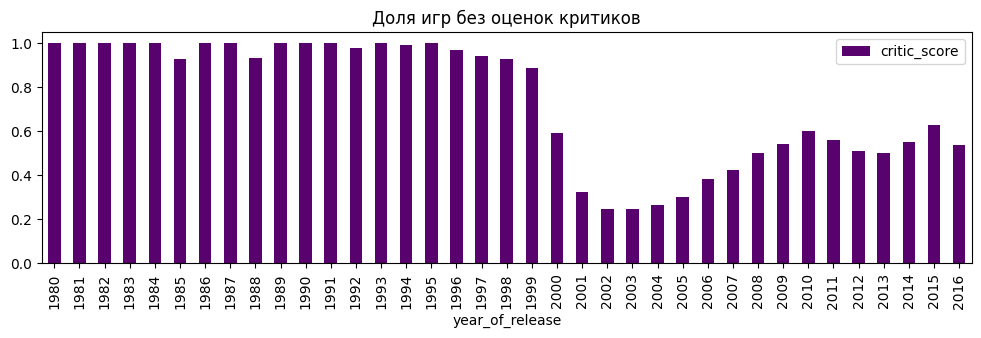

In [28]:
# игры с оценками профессиональных критиков
crit_scr = df.groupby('year_of_release').agg({'critic_score': lambda x: x.isnull().mean()})
crit_scr.plot.bar(title='Доля игр без оценок критиков', figsize=(12,3), color='#58026D');

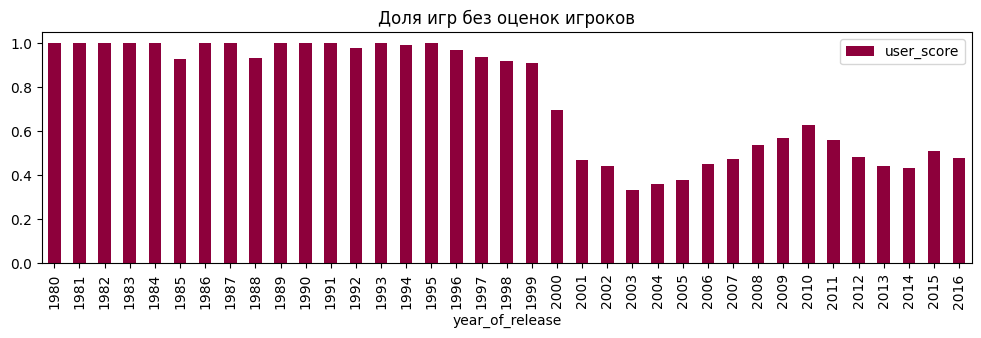

In [29]:
# игры с оценками игроков
user_scr = df.groupby('year_of_release').agg({'user_score': lambda x: x.isnull().mean()})
user_scr.plot.bar(title='Доля игр без оценок игроков', figsize=(12, 3), color='#8D003B');

В числе причин, которые могли привести к такому количеству и качеству пропусков в исходных данных, мы можем указать:
* ошибку выгрузки данных (практически равномерные потери данных в размере порядка 8400 строк по признакам `critic_score` и `user_score`);
* повреждение данных в процессе хранения или использования (потери 2 строк по признакам `name` и `genre`);
* включение в общий массив зарубежных данных могло привести к появлению пропусков в размере 6678 строк в признаке `raiting`, поскольку речь идёт о продажах игр в Северной Америке, Европе, Японии и в других странах, отсутствуют исходные данные о локации компании-разработчика, и в этом случае европейские, японские, одним словом не-американские компании имели основания не предоставлять данные о возрастном рейтинге, оценке пользователей и профессинальных критиков, потому что в их стране действует иная система рейтингов.

<a id=2.4.></a>
#### 2.4. Обработка дубликатов

Также необходимо выполнить проверку на наличие полных и неполных дубликатов. С помощью цепочки методов `duplicated().sum()` выявим полные дубликаты. Неполные дубликаты мы выявим по повторяющимся значениям в признаках `name`, `platform` и `year_of_release`.

In [30]:
# проверим датафрейм на наличие полных дубликатов
df.duplicated().sum()

0

In [31]:
# проверим датафрейм на наличие неполных дубликатов
df.loc[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [32]:
# удаляем неполные дубликаты
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

<a id=2.5.></a>
#### 2.5. Создание дополнительных признаков

In [33]:
# создадим дополнительный признак `total_sales` с суммарными данными по продажам той или иной игры
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [34]:
# выводим первые 5 строк датафрейма для ознакомления с преобразованиями
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not Rated by the ESRB,31.38


In [35]:
# финальный размер датафрейма
df.shape

(16443, 12)

**Вывод:** на этом этапе нами была выполнена предварительная обработка данных. Названия признаков были приведены к нижнему регистру с помощью цепочки методов `str.lower()`. Тип данных по 2 признакам был видоизменён: `year_of_release` из `float` был переведён в `int`, поскольку хранит данные только о годе выпуска той или иной игры, а `user_score` из `object` был переведён в `float` в соответствии с со смысловым значением оценок, выставленных пользователями той или иной игре. Здесь же были обработаны значения признака `user_score` `tbd` (англ. to be determined), которые предполагали перспективу уточнения оценки пользовательского рейтинга. Поскольку, на настоящий момент эти данные являются историческими, то оценка пользователя той или иной игры осталась для нас неизвестной, что равносильно пропуску значения. В соответствии с этой логикой вещей, встречающиеся значения `tbd` были заменены на `NaN`. Были выявлены пропуски по 5 признакам: `name`, `genre`, `rating`, `critic_score`, `user_score`. Пропуски по признакам `name` и `genre` присутствовали в смежных 2 строках, которые были удалены. Пропуски значений в количестве 6676 строк в признаке `rating` были восстановлены по логическому условию значениями ` unrated ` (релиз игры состоялся до учреждения Совета по рейтингу развлекательного ПО в 1994 году) и `Not Rated by the ESRB` (релиз состоялся после 1994 года и материал не был представлен в вышеназванный Совет по разным причинам).  Пропуски в признаках `critic_score` и `user_score` сохранены, поскольку не могут быть восстановлены по логическому условию или заполнены синтетическими данными. Выявлена тенденция в равномерном уменьшении числа развлекательного игрового ПО, выпущенного после 2000 года, причиной которой является рост числа платформ-агрегаторов рецензий и отзывов (как игроков-любителей, так и профессиональных критиков).
    
В числе причин, которые могли привести к такому количеству и качеству пропусков в исходных данных, мы можем указать:
* ошибку выгрузки данных (практически равномерные потери данных в размере порядка 8400 строк по признакам `critic_score` и `user_score`)
* повреждение данных в процессе хранения или использования (потери 2 строк по признакам `name` и `genre`)
* включение в общий массив зарубежных данных могло привести к появлению пропусков в размере 6678 строк в признаке `raiting`, поскольку речь идёт о продажах игр в Северной Америке, Европе, Японии и в других странах, отсутствуют исходные данные о локации компании-разработчика, и в этом случае европейские, японские, одним словом не-американские компании имели основания не предоставлять данные о возрастном рейтинге, оценке пользователей и профессиональных критиков, потому что в их стране действует иная система рейтингов.

В целях проведения исследования был создан дополнительный признак `total_sales`, содержащий в себе суммарные продажи того или иного игрового ПО на всех рынках. Выполнена проверка данных на дубликаты: с помощью цепочки методов `duplicated().sum()` установлены полные дубликаты, а неполные дубликаты выявлены по повторяющимся значениям в признаках `name`, `platform` и `year_of_release`.
В завершении предварительной обработки данных датафрейм получил размер 16443 строки в разрезе 12 признаков. Потери данных составили 272 строки или 1,6%.

[к содержанию](#content) | [шаг 1](#1) | [шаг 2](#2) | [шаг 3](#3) | [шаг 4](#4) | [шаг 5](#5) | [шаг 6](#6)

<a id=3></a>
### Шаг 3. Исследовательский анализ данных

<a id=3.1.></a>
#### 3.1. Ретроспектива количества выпуска игр. Определение хронологических рамок исследования

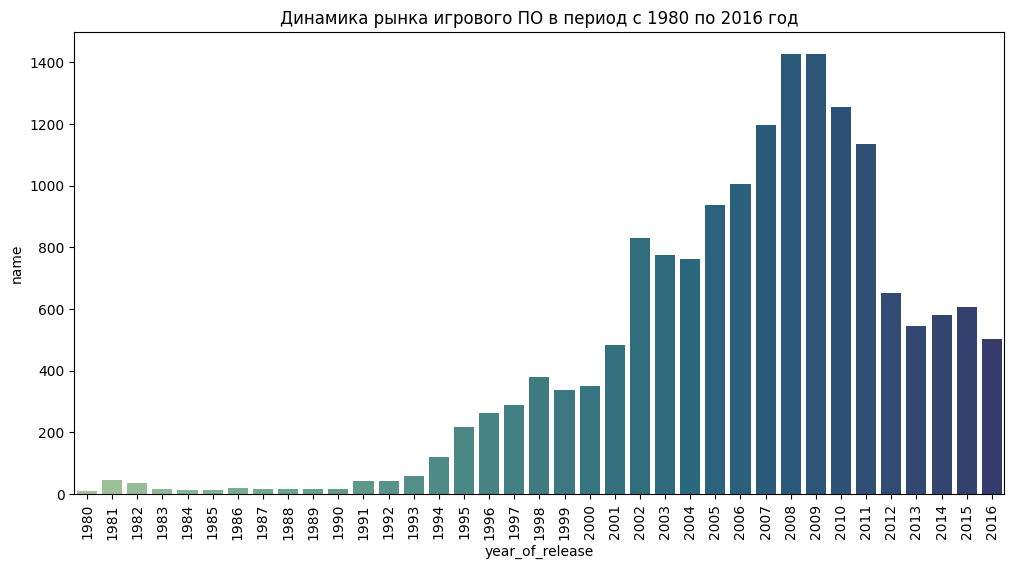

In [36]:
# расчёт динамики рынка компьютерных игр в период с 1980 по 2016 год
exp_lineplot = df[['year_of_release', 'name']].groupby('year_of_release').\
count().sort_values('year_of_release',ascending=True).reset_index()

# визуализация динамики рынка компьютерных игр в период с 1980 по 2016 год
plt.figure(figsize=(12,6))
sns.barplot(data=exp_lineplot, x='year_of_release', y='name', palette='crest');
plt.title('Динамика рынка игрового ПО в период с 1980 по 2016 год', fontsize=12);
plt.xticks(rotation=90);

Перед нами визуализация естественного процесса развития, становления и стабилизации рынка компьютерных игр с 1994 по 2016 годы. В соответствии с реальными историческими фактами и визуализацией информации датафрейма, мы можем предложить следующую периодизацию:

**`развитие (1994 - 2001)`** 1994 год был знаменателен не только учреждением Совета по рейтингу, ведь это было только одним из закономерных этапов становления и развития всемирного рынка. В 1994 году появились 32 bit процессоры, у ПК-видеоускорителей появились стандарты DirectX и OpenGL и, как следствие, шутеры от первого лица Unreal и Quake. 2D игры постепенно уходили в прошлое и их уверенно начали вытеснять 3D игры с более реалистичной графикой. На рынок вышли Sony PlayStation и Sega Saturn. Игр стало ещё больше, вдобавок с вышедшим прежде играм, многие из которых стали культовыми, появились игры Tekken, Resident Evil, Silent Hill, GTA, Need for Speed, Starcraft, Half-Life и т.д. На рынке консолей продолжали бороться трое колоссов: Sony, Nintendo и Sega. Это пятое поколение видеоигр стало своего рода культурным феноменом.

**`становление (2002 - 2011)`** Лавинообразный рост является характерной чертой периода с 2002 по 2009 год. С 2002 по 2011 год мы видим плато высоких значений по количеству релизов. На это время приходится шестое и седьмое поколение компьютерных игр. Быстро развивающийся в середине 2000-х годов рынок смартфонов и планшетов вскоре создал новый огромный субрынок для разработчиков игр. Тем временем, игры на PC развивались ничуть не менее интенсивно: появилось много различных конфигураций, доступных рядовому потребителю компьютеров, отчего в рядах геймеров произошёл раскол - те, кто предпочли не тратить деньги на мощные PC, играли в разнообразные квесты, аркады, ребусы и головоломки, а те, кто раскошелился на мощный PC - наслаждались очень красивыми и требовательными к железу играми, такими как Quake 3, Half-Life 2, Morrowind, Age of Empires, Unreal Tournament 2004, GTA: San Andreas и многими другими. Мощность и ядерность процессоров росли год от года, появляются новые консоли и движки, на рынок вышли графические процессоры ATI, AMD и NVidia, потеснившие ветерана Intel. У всё большего количества людей начал появляться доступ к Интернету, что поспособствовало развитию низкобюджетных инди-студий по разработке игр, получивших возможность продавать свои игры через Интернет без затрат на покупку и перепродажу физических носителей. Таким образом, продажи игр стремительно переходят в цифровой формат, хоть и выходят объёмные Blu-ray диски, которые, однако, не смогли выиграть борьбу со стремительно дешевеющими и увеличивающимися в размере флеш-картами. В это же время мощно развилось цифровое пиратство, особенно в странах СНГ. Крупнейшие разработчики начали заниматься выпуском кроссплатформенных проектов на разные игровые платформы. Это помогало добиться лучшей окупаемости.

**`стабилизация (2012 - 2016)`** В 2012 году начинаеся спад и стабилизация рынка, объёмы выпускаемой продукции снижаются. Возможно это связано с ростом числа игр для телефонов. У игровых платформ появился серьёзный конкурент в виде смартфонов. К этому стоит добавить выход в 2014 году на игровой рынок технологии VR (Visual Reality). Она начала пробиваться сразу по всем фронтам: и на рынок портативных мобильных устройств, и на рынок стационарных пк и игровых консолей. Но у виртуальной реальности возникло множество проблем, среди которых недостаточное количество достойных игровых проектов, поддерживающих технологию VR, высокая стоимость устройств для неё и сырые технологии взаимодействия с виртуальным миром (различные джойстики, сенсоры и камеры или обеспечивали неудобное или просто плохое взаимодействие с виртуальностью, или стоили непомерно дорого). Среди VR-шлемов можно выделить: Oculus Rift, HTC Vive, Sony PlayStation VR, Samsung Gear VR и картонный Google Cardboard (два последние - для смартфонов).

Компьютерная игровая индустрия за время своего существования претерпела немало изменений. При этом появилось много видеоигр, которые уже много лет не теряют поклонников во всем мире. **Полагаем, что для дальнейшего исследования и разработки рекламной кампании на условный 2017 год самым корректным решением будет рассмотрение периода стабильного существования рынка игрового развлекательного ПО с 2012 по 2016 годы включительно.**

<a id=3.2.></a>
#### 3.2. Динамика продаж в разрезе платформ. Платформы с наибольшими суммарными продажами. Характерный период возникновения и исчезновения старых платформ

In [37]:
# выведем уникальные названия игровых платформ, представленных в исходном датафрейме
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Для того, чтобы погрузиться в предметную область, создадим обобщённую таблицу данных об этих игровых платформах. В дальнейшем это поможет нам лучше понять глубинные процессы эволюции рынка видеоигр:

|№ п/п |Наименование платформы|Разработчик|Краткое описание |Присутствовала на рынке с, год|Присутствовала на рынке до, год| Всего лет на рынке|Количество продаж, млн.|Количество записей в датафрейме, ед.|
|---|:---|:---|:---|:---|:---|:---|:---|:---|
|1.|`2600`|Atari|Atari 2600. Первая успешная приставка с играми на картриджах. Комплект состоял из двух джойстиков либо двух paddle-контроллеров и одной игрой. Бестселлеры: Combat, Pac-Man, Space Invaders.|1980|1989|9|86.48|116|
|2.|`NES`|Nintendo|Nintendo Entertainment System. 8-bit приставка с большим пакетом игр, в том числе Super Mario Bros. Новинка: контроллер с крестовиной, кнопка Start и Select, во втором контроллере встроен микрофон.|1983|1994|11|251.05|98|
|3.|`PC`|разные|Персональные компьютеры. Версия мультиплатформенной компьютерной игры для PC называется PC-версией игры. Игра, которая вышла только на ПК, называется PC-эксклюзивом. Большинство таких игр выпускаются для Microsoft Windows, реже (и иногда позднее) выходят версии для Mac OS X или Linux.|1985|2016|31|255.76|957|
|4.|`DS`|Nintendo|Nintendo Dual Screen. Карманная игровая система имеет дизайн «раскладушки» с 2 ЖК-экранами, причём нижний экран чувствителен к нажатию стилуса или пальца. Консоль имеет встроенный микрофон, который используется в некоторых играх для подачи голосовых команд либо обмена голосовыми сообщениями с другими консолями.|1985|2013|28|802.78|2121|
|5.|`GB`|Nintendo|Game Boy. 8-bit карманная игровая система оснащена матричным экраном с регулируемой контрастностью, пятью кнопками (крестовина, две игровые кнопки, кнопки «START» и «SELECT»), одним динамиком с регулятором громкости и использует в качестве физического носителя для игр игровые картриджи. Бестселлер: Pokémon Red / Green / Blue Version|1988|2001|13|254.43|97|
|6.|`SNES`|Nintendo|Super Nintendo Entertainment System. 16-bit игровая приставка с улучшенными графическими и звуковыми возможностями по сравнению с другими консолями того времени. В картридж встраивались дополнительные чипы, за счёт этого приставка оставалась на ходу даже после выхода следующего поколения консолей. Бестселлер: Super Mario World, Donkey Kong Country.|1990|1999|9|200|239|
|7.|`GEN`|Sega|Sega Genesis. 32-bit система выпускалась в различных вариациях, которые были направлены на расширение функциональности. Успеху приставки способствовали обилие портированных аркадных игр, популярность эксклюзивной для Genesis игры Sonic the Hedgehog, несколько популярных спортивных серий игр, а также агрессивный молодёжный маркетинг, позиционирующий систему как «крутую консоль» для подростков.|1990|1994|4|28.35|27|
|8.|`GG`|Sega|Game Gear. Карманная игровая система. Имеет общую с консолью Master System аппаратную часть и с помощью адаптера может запускать игры от неё. Game Gear имела цветной экран, поддерживала вставляемые в слот для картриджей модули расширения (конвертер для подключения картриджей Master System, приёмник и даже TV-тюнер), консоль было удобно держать в руках, в отличие от Gameboy. К консоли отдельно продавалась специальная линза Super Wide Gear, визуально увеличивающая размер экрана до 5 дюймов против обычных 3,2.|1992|1992|0|0.04|1|
|9.|`NG`|Sega|Nomad Genesis. Карманная игровая система. Nomad стала последней портативной системой, выпущенной компанией Sega. Она продавалась исключительно в Северной Америке и использовала региональную блокировку. В качестве главного микропроцессора используется Motorola 68000. Память, графика и звук Nomad идентичны приставке Mega Drive, а единственное различие заключается в том, что благодаря экрану приставка полностью самодостаточна. Nomad имеет 3,25-дюймовый цветной ЖК-экран с подсветкой и аудио-/видеовыход, который позволяет подключать приставку к телевизору.|1993|1996|3|1.44|12|
|10.|`SCD`|Sega|Sega CD. Дополнение к игровой приставке Sega Mega Drive. Устройство улучшало возможности Mega Drive и добавляло возможность проигрывать игры, записанные на компакт-диске, слушать аудиодиски и запускать диски формата CD+G[en]. Основным преимуществом использования технологии CD-дисков стало увеличение объёма, доступного для хранения данных, что позволило играм увеличиться в размерах почти в 320 раз по сравнению с картриджами для Mega Drive. Это преимущество привело к тому, что для приставки выпускались full motion video игры, такие как скандально известная Night Trap.|1993|1994|1|1.86|6|
|11.|`PS`|Sony|PlayStation является первой игровой системой в линейке PlayStation.  Приставка оказалась очень популярной, обеспечив Sony прорыв в игровой индустрии, где до того момента безраздельно властвовали Nintendo и Sega. При разработке приставки основное внимание уделялось трёхмерной полигональной графике. Приставка оказалась популярной благодаря обширной библиотеке игр, популярным франшизам, низкой розничной цене и агрессивному маркетингу среди молодёжи. Среди известных серий игр для PlayStation были Gran Turismo, Crash Bandicoot, Tomb Raider и Final Fantasy, которые породили многочисленные продолжения и способствовали росту продаж приставки.|1994|2003|9|727.58|1190|
|12.|`SAT`|Sega|Saturn. Стационарная 16-bit игровая приставка. Saturn имеет двухпроцессорную архитектуру. Игры выпускались в формате CD-ROM, а библиотека игр состоит как из оригинальных игр, так и из портов игр с аркадных автоматов. В состав был добавлен ещё один графический процессор. Ранняя реклама для системы была ориентирована на более зрелую, взрослую аудиторию, чем реклама Sega Genesis. Основной процессор Hitachi SH-2 звуковой контроллер Motorola 68EC000. Графические процессоры приставки — VDP1, который обрабатывает спрайты, текстуры и полигоны, и VDP2, который обрабатывает фоны. Для сокращения времени загрузки двухскоростной CD-ROM привод управляется специальным процессором Hitachi SH-1. Отмена выпуска игры Sonic X-treme и отсутствие полностью трёхмерной игры в серии Sonic the Hedgehog считаются существенным фактором в коммерческом провале Saturn.|1994|1999|5|33.59|173|
|13.|`3DO`|The 3DO Company|3DO Interactive Multiplayer.  На момент выпуска консоль обладала очень продвинутыми аппаратными возможностями: 32-разрядный процессор ARM60 с RISC-архитектурой, работающий на частоте 12,5 МГц; два графических сопроцессора; 16-разрядный цифровой сигнальный процессор и специальный математический сопроцессор. Все дополнительные сопроцессоры были разработаны специально для этой консоли. Также консоль имела 2 мегабайта ОЗУ, 1 мегабайт видеопамяти и двухскоростной CD-привод. Имелась возможность одновременного подключения до 8 джойстиков (оригинальным способом — в цепочку, один подключается к другому). Помимо использования специально разработанного ПО, консоль могла проигрывать CD-аудио (включая поддержку CD+G), просматривать Photo CD и Video CD. Несмотря на активную рекламу, сопровождавшую запуск системы, и использование передовых технологий, высокая цена системы и перенасыщение рынка игровых систем привели к быстрому завершению её жизненного цикла.|1994|1995|1|0.1|3|
|14.|`TG16`|NEC + Hudson Soft|TurboGrafx-16. Центральный процессор 8-bit (х2) HuC 6280 при частоте в 7 160 000 Гц, видеопроцессор 16-bit HuC 6270. Разрешение 256х216 пксл., ОЗУ: 8 и 32 Кб. Бестселлеры: Die Hard, Cyber Knight, Battle Ace, Champion Wrestler, China Warrior, Devil's Crush.|1995|1995|0|0.16|2|
|15.|`N64`|Nintendo|64-bit игровая приставка. В этой приставке появилась масса новшеств, связанных с трёхмерной графикой: сглаживание текстур, MIP-mapping и др. В качестве игрового носителя был выбран картридж объёмом до 64 МБ. Вместе с консолью Nintendo выпустила первый 3D-платформер Super Mario 64, который демонстрировал её новшества во всей красе. В Nintendo 64 была реализована функция записи сохранений игры на картридж.|1996|2002|6|218.09|316|
|16.|`PCFX`|NEC|32-разрядная стационарная игровая консоль. PC-FX использовала для хранения игр только CD-диски. Консоль имела необычный дизайн, более типичный для компьютера, чем для игровой консоли. Геймпад внешне был похож на геймпад от Sega Mega Drive. Другая интересная особенность консоли — наличие трёх портов расширения. Обычно они редко используются на консолях, так как их наличие увеличивает цену, не представляя особой пользы для конечного пользователя.  Процессор: NEC V810 на частоте 21.5 МГц, RISC-архитектура, Разрешение: 256 x 240, 320 x 240. Память: ОЗУ: 2 МБ, видео-ОЗУ: 1 МБ + 256 КБ|1996|1996|1|0.03|1|
|17.|`DC`|Sega|Dreamcast. Стационарная 32-bit игровая приставка. Стала последней домашней игровой системой Sega, завершив восемнадцатилетнюю историю компании на рынке консолей. Центральный процессор Hitachi SH-4 и графический процессор NEC PowerVR2. Звуковой процессор системы, Yamaha AICA с 32-разрядным ARM7 RISC ядром, работающим на частоте 67 МГц, может генерировать 64 канала либо с помощью импульсно-кодовой, либо с помощью адаптивной дифференциальной модуляции, что в десять раз превосходит производительность звуковой системы Saturn. ОЗУ 16MB. После смены руководства Sega прекратила выпуск Dreamcast 31 марта 2001 года, отказавшись от бизнеса по выпуску игровых приставок и перепрофилировавшись в издателя игр.|1998|2008|10|15.95|52|
|18.|`WS`|Bandai|WonderSwan. Карманная игровая 16-bit консоль, выпущенная только в Японии. Центральный процессор NEC V30 MZ, большой цветной ЖК-дисплей 2.49”, ОЗУ 512Кбит. На пике популярности консоли, компании Bandai принадлежало примерно 8 % рынка Японии, что достаточно много, учитывая, что основным конкурентом была компания Nintendo. Частично это объясняется достаточно низкой ценой на консоль (порядка $65), но самой важной составляющей успеха явился контракт с компанией SquareSoft, по которому на консоли должны были выйти ремейки первых игр серии Final Fantasy.|1999|2001|2|1.42|6|
|19.|`PS2`|Sony|PlayStation 2. Игровая приставка стала наиболее быстро продаваемой и самой популярной игровой консолью в истории. Процессор: 64-bit «Emotion Engine», ОЗУ 32MB. Emotion Engine — центральный процессор PlayStation 2 — был разработан Toshiba и Sony, его массовое производство началось в 1999 году. Он стал первым коммерческим 64-битным процессором. Emotion Engine построен на MIPS R5900, комбинации CPU и DSP.|2000|2011|11|1233.56|2127|
|20.|`XB`|Microsoft|Xbox. Стационарная игровая приставка.  Microsoft решилась на выпуск собственной приставки из опасения, что развлекательные и мультимедийные устройства такого рода — и прежде всего PlayStation 2 — станут опасными конкурентами для персональных компьютеров. В качестве аппаратного и программного обеспечения Xbox использовались те же комплектующие и технологии, что и в ПК того времени, включая DirectX, операционную систему Windows и центральный процессор Intel Pentium III; Xbox стала первой игровой приставкой, в конструкцию которой по умолчанию был включён жёсткий диск. Возможность широкополосного подключения к Интернету через порт Ethernet открывала возможность многопользовательской игры по сети. Выход Xbox сопровождался рекордными продажами: до конца 2001 года было продано свыше полутора миллионов консолей; её успеху способствовал и успех многопользовательского шутера Halo: Combat Evolved.|2000|2008|8|251.57|803|
|21.|`GBA`|Sega|Game Boy Advance. 32-bit карманная игровая консоль. Game Boy Advance была разработана в «ландшафтном» форм-факторе, при котором кнопки расположены по бокам устройства, а не под экраном. Для приставки существуют как 2D так и 3D-игры (например, Need For Speed, Serious Sam Advance и др.). Процессор: 32-bit arm7tdmi на частоте 16,78 МГц,  сопроцессор Sharp LR35902 на частоте 8,4 или 4,2 МГц для обратной поддержки Game Boy и Game Boy Color. ОЗУ 32 Кбайт. Оснащена плавным регулятором громкости, выход на наушники (разъём  Mini-jack 3,5 мм). Существовала также очень редкая модель с ТВ-выходом и неотключаемой подсветкой в классическом корпусе.|2000|2007|7|312.87|811|
|22.|`GC`|Nintendo|GameCube. Использует диски на основе mini-DVD вместо полноразмерных DVD. Нет поддержки проигрывания DVD-Video и audio CD, а также возможностей других консолей, использующих полноразмерные оптические диски. Поддерживает официально онлайн-игру через широкополосный модем Nintendo GameCube. Она также имела возможность соединяться с Game Boy Advance и получать доступ к исключительным особенностям определённых игр или использовать портативную систему как контроллер для Game Boy Player.|2001|2007|6|196.73|542|
|23.|`PSP`|Sony|PlayStation Portable. Карманная игровая приставка. Размер дисплея по диагонали — 4,3 дюйма (110 мм), соотношение сторон — 16:9, разрешение — 480×272 пикселей, количество цветов — 16 млн. Система основана на процессоре MIPS R4000 и включает аппаратное обеспечение для декодирования мультимедиа (такого, как H.264) и векторный блок Virtual Mobile Engine. ОЗУ 32MB. Дополнения: фотокамера (go!cam 300 и 450x) и Спутниковая система навигации (go!explore — 290) GPS-адаптер. GPS-адаптер также поддерживал игры, в основе геймплея которых заключалось использование GPS, такие, как Metal Gear Solid: Portable Ops. дополнительные аксессуары: микрофон, батарея увеличенной ёмкости на 3600 мА·ч, насадка на батарею, увеличивающая ёмкость до 4600 мА·ч, наушники с пультом дистанционного управления, зарядное устройство, автомобильный адаптер и адаптер переменного тока.|2004|2015|11|289.53|1193|
|24.|`X360`|Microsoft|Xbox 360. Стационарная игровая приставка. Центральный процессор Xenon от IBM. Графический процессор Xenos от ATI, ОЗУ 512MB, соотношение сторон экрана 4:3 и 16:9, Съёмный жёсткий диск на 20 / 60 / 120 / 250 / 320 / 500ГБ, привод DVD-ROM. работает под управлением операционной системы, созданной специально для этой приставки. Эта операционная система является на 90 % переписанной операционной системой для первого Xbo. Совместимость с играми для оригинальной Xbox частичная.|2005|2016|1|961.24|1232|
|25.|`PS3`|Sony|PlayStation 3. С помощью PS3 можно играть, смотреть фильмы, слушать музыку, отправлять электронную почту и просматривать веб-страницы. Жёсткий диск 20Гб/40Гб/80Гб, геймпад DualShock 3. Мощности процессоров PlayStation 3: центрального процессора — 230,4 GFLOPS, графического процессора — до 192 GFLOPS. Также в приставке используется графический процессор RSX или «Синтезатор реальности», созданный компаниями nVidia и Sony. Видеочип работает на частоте 550 МГц и имеет 256 Мб памяти. Основным оптическим носителем для игр PlayStation 3 является Blu-ray, однако привод приставки также позволяет проигрывать обычные DVD, SACD и CD-носители. Приставка имеет размеры 325×98×274 мм.|2006|2016|10|931.33|1305|
|26.|`Wii`|Nintendo|Самая маленькая из приставок 7 поколения. Оснащена инновационным игровым контроллером, который может определять своё перемещение и ориентацию в трёхмерном пространстве. Кроме того, в контроллер встроен динамик и вибро-механизм, что даёт дополнительную обратную связь.|2006|2016|10|891.18|1286|
|27.|`3DS`|Nintendo|Карманная игровая система, способная создавать трёхмерный эффект изображения за счёт автостереоскопии, то есть без использования специальных очков. 2 дисплея с настраиваемой яркостью, ОЗУ 128 МB, 1GB NAND Flash внутренней памяти. Игровые картриджи объёмом до 4 ГБ со встроенной памятью для хранения сохранений игр, SD/SDHC карты памяти, крестовина, кнопки, аналоговый стик Circle Pad, сенсорный экран, 3-х осевые датчик движения и гироскоп, микрофон, камеры, ползунки регулировки звука и глубины 3D-эффекта, выключатель беспроводной связи.|2011|2016|5|257.81|512|
|28.|`PSV`|Sony|PlayStation Vita. Портативная консоль с 4-ядерным процессором ARM Cortex™-A9, ОЗУ 512MB, камеры: передняя и задняя, запись с частотой кадров 120 кадров/сек при 320×240 и 60 кадров/сек при 640×480, стереодинамики, микрофон, трехосный электронный компас, трехосевые гироскоп и акселерометр (Sixaxis); также GPS в модели с 3G.|2011|2016|5|53.81|429|
|29.|`WiiU`|ТNintendo|Особенностью Wii U является новый контроллер, который может использоваться как дополнительный сенсорный 6,2-дюймовый экран (не поддерживает мультитач), что позволит игроку получить новые игровые ощущения, а в некоторых играх мог частично заменить телевизор, играя через GamePad. Контроллер не совместим с играми Wii, но сохранил традиционные элементы управления: кнопки и аналоговые стики. Такая комбинация разбивает барьеры восприятия между играми, игроками и экраном, создавая так называемое «второе окно» в мир видеоигр. В контроллер встроен акселерометр и гироскоп, присутствует виброотдача, видеокамера, микрофон, динамики и стилус.|2012|2016|4|82.19|147|
|30.|`PS4`|Sony|PlayStation 4. приставка использует гибридный процессор компании AMD на основе x86-64 пиковой производительностью 1,84 терафлопс. Входящий в комплект игровой контроллер DualShock 4 примечателен наличием встроенного тачпада. Консоль работает под управлением операционной системы Orbis, являющейся модифицированной версией FreeBSD 9.0. Приставка позиционируется компанией именно как игровое устройство, а не как домашний медиацентр.|2013|2016|3|314.14|392|
|31.|`XOne`|Microsoft|Xbox One. 8-ядерный x86-x64 центральный процессор APU 1,75 Ггц, Объём DDR3 — 8 Гб Жёсткий диск — 500 ГБ/1 ТБ/2 ТБ. Жёсткий диск несъёмный, Blu-Ray и DVD привод, ИК датчики увеличивают качество съёмки и позволяют снимать в темноте. Xbox One поставляется с обновлённой версией бесконтактного игрового контроллера Kinect, здесь используется ToF (времяпролётная) камера с широким углом обзора и разрешением 1080p, повысилась точность определения, максимальное количество одновременно определяемых людей увеличилось до шести, новый Kinect также может отслеживать жесты контроллером и определять пульс человека.|2013|2016|3|159.32|247|

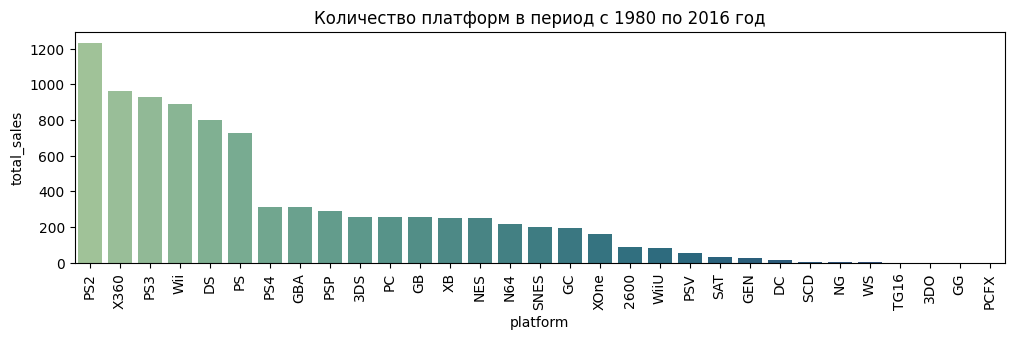

In [38]:
# расчёт количества продаж по игровым платформам: лидеры продаж
plaform_lineplot = df[['platform', 'total_sales']].groupby('platform').sum().\
                sort_values('total_sales',ascending=False).reset_index()

# визуализация количества продаж по игровым платформам: лидеры продаж
plt.figure(figsize=(12,3))
sns.barplot(data=plaform_lineplot, x='platform', y='total_sales', palette='crest');
plt.title('Количество платформ в период с 1980 по 2016 год', fontsize=12);
plt.xticks(rotation=90);

В соответствии с информацией, выведенной на первой столбчатой диаграмме этого раздела исследования, из общего количества игровых платформ  значительно выделяются по сумме продаж следующие платформы: `PS`, `PS2`, `PS3`, `DS`, `Wii`, `X360`. Мы можем сформировать выборку по условию `platform_top` из общего датафрейма `df` и подготовить визуализацию распределения по годам.

In [39]:
# расчёт динамики продаж по топовым игровым платформам: распределение по годам
platform_top = df.loc[(df['platform'].isin(['PS','PS2', 'PS3', 'Wii', 'DS', 'X360']))]

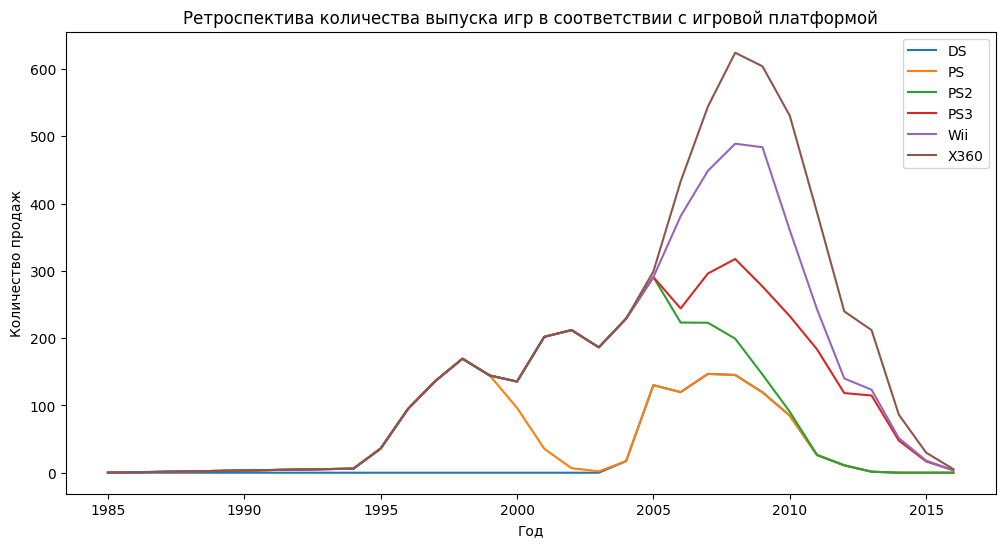

In [40]:
# визуализация динамики количества продаж по топовым игровым платформам: распределение по годам
fig, ax = plt.subplots(figsize=(12,12))

platform_top.pivot_table(index='platform', columns='year_of_release', 
                  values='total_sales', aggfunc='sum').T.plot(kind='line',stacked=True, ax=ax, figsize=(12,6))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Год')
ax.set_ylabel('Количество продаж')
ax.set_title('Ретроспектива количества выпуска игр в соответствии с игровой платформой')

plt.show()

Чтобы ответить на вопрос о характерном сроке длительности существования той или иной платформы, соберём ещё раз сводную таблицу с данными по платформам, году релиза и количеством продаж. На основании этой сводной таблицы создадим график с кривыми динамики развития каждой платформы в ретроспективе.

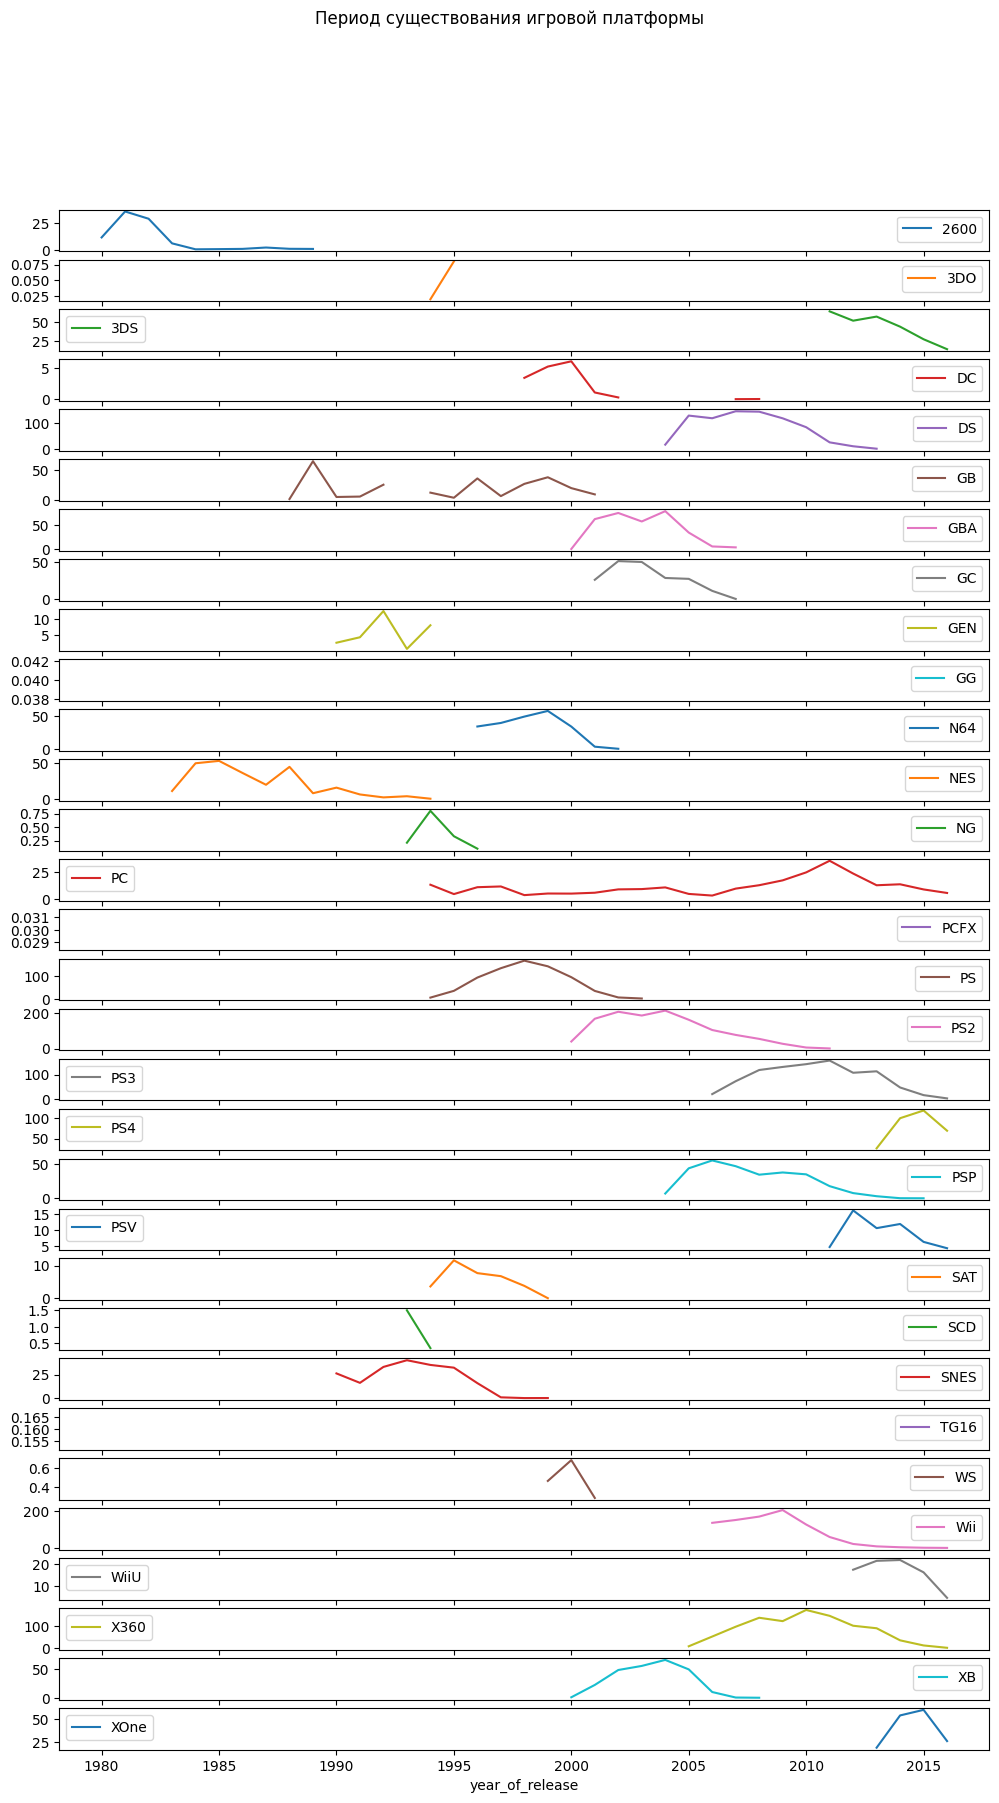

In [41]:
# расчёт динамики продаж по игровым платформам: распределение по годам
platform_CV = df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
                            .sort_values('year_of_release', ascending=False)

# визуалиазция динамики существования игровых платформ: распределение по годам
platform_CV.plot(kind='line', subplots=True, figsize=(12,20), title='Период существования игровой платформы');
ax.set_xlabel('Год')
ax.set_ylabel('Количество продаж')
plt.show();

Поскольку датафрейм охватывает разные исторические эпохи, построенные графики только подтверждают общие тенденции развития как всемирной экономики, так и рынка игрового ПО в частности.

Среди представленной 31 игровой консоли долгожителем является `PC`. Они активно присутствуют на рынке с 1985 года и продали более 255 млн. копий игровой продукции. Параллельно с ними до 2013 года свою продукцию выпускали `DS`, чьи игры разошлись тиражом 802 млн. копий. "Возраст" этих ветеранов рынка компьютерных игр весьма почтенный для этой сферы: 31 и 28 лет соответственно.

Следующая возрастная ниша игровых консолей представлена группой из 11 хорошо известных игровых платформ: `Wii`, `PS2`, `PS3`, `PSP`, `X360`, `GB`, `NES`, `PS`, `DC`, `SNES`, `2600`. Их длительность и коммерческая успешность пребывания на рынке игрового ПО сопоставимы, а подчас и превосходят достижения ветеранов отрасли. В этой группе длительность существования платформы находится в диапазоне от 9 до 13 лет. В эту же группу входят и самые прибыльные платформы: `PS`, `PS2`, `PS3`, `X360`, `Wii`. Стоит отдельно отметить, что за весь период представленных данных только 2 игровые платформы делали попытки камбэка и реанимации своего успеха: это `DC` и `GB`. Только `GB` удалось успешно вернуться и задержаться на 13 лет. По совокупности длительности пребывания, ассортимента игровой продукции и количества проданных копий, именно эти 11 консолей являются своего рода золотой серединой.

В силу разных причин целый ряд компьютерных игровых платформ, а таких в датафрейме большинство - их 13 наименований, не смогли на длительный срок удержать свою аудиторию. В худшем случае они были в продаже в течение года, в лучшем - оставались на прилавках от 6 до 8 лет (такие, как `XB`, `GBA`, `GC` и `N64`). 

Отдельной строкой стоит выделить те игровые консоли, которые на момент 2016 года находятся в активной фазе своего развития и потому длительность их пребывания на рынке невелика (от 3 до 5 лет), а вот продажи весьма внушительные (от 53.81 млн. копий до 314.14 млн. копий). К ним относятся `PS4`, `PSV`, `XOne`, `WiiU` и `3DS`. Зачастую это модификации ранее созданных консолей, у которых уже сформирована позитивная репутация среди игроков-любителей и критиков.

**На основании вышеизложенного, мы можем утверждать, что средний период длительности существования игровой платформы не превышает 10 лет.**

<a id=3.3.></a>
#### 3.3. Актуальный период исследования для подготовки прогноза на 2017 год

Ранее нами был построен график визуализации динамики развития рынка компьютерных игр в период с 1994 по 2016 годы, на основании полученныы данныы были выделены периоды развития (1994 - 2001 гг.), становления (2002 - 2011 гг.) и стабилизации (2012 - 2016 гг.). Полагаем целесообразным установление хронологических рамок исследования в соответствии с периодом стабилизации.

In [42]:
# с помощью среза данных формируем новый датафрейм для дальнейшего исследования
df_stable = df.query('year_of_release >= 2012')

In [43]:
# предварительная информация о массиве данных
df_stable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   int32  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           2885 non-null   object 
 11  total_sales      2885 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 281.7+ KB


In [44]:
# описательные стаитистики массива данных
df_stable.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,1311.000000,1530.000000,2885.000000
mean,2013.917504,0.204842,0.175671,0.066752,0.054128,72.250191,6.636863,0.501393
std,1.411559,0.566781,0.505424,0.241614,0.164664,12.688455,1.569277,1.249340
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,74.000000,7.000000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,81.000000,7.800000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


<a id=3.4.></a>
#### 3.4. Платформы-лидеры продаж, платформы в стадии роста или падения. Потенциально прибыльные платформы

In [45]:
# расчёт динамики выпуска игр в разрезе игровых платформ
platform_sales = df_stable.pivot_table(index='platform', 
                                       columns='year_of_release', 
                                       values='total_sales', 
                                       aggfunc='sum').fillna(0)
platform_sales

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,0.00,0.00,0.00
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.35,113.25,47.76,16.82,3.60
PS4,0.00,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,0.00
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


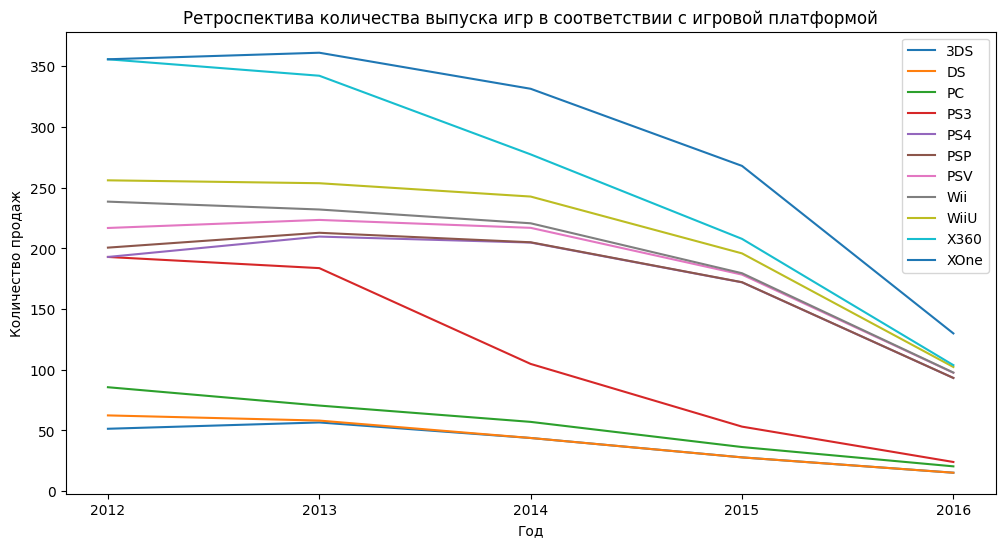

In [46]:
# визуализация динамики количества продаж по игровым платформам в актуальном периоде
fig, ax = plt.subplots(figsize=(12,12))
labels = platform_sales.columns.tolist()
platform_sales.T.plot(kind='line',stacked=True, ax=ax, figsize=(12,6))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Год')
ax.set_ylabel('Количество продаж')
ax.set_title('Ретроспектива количества выпуска игр в соответствии с игровой платформой')
plt.xticks(labels) 
plt.show()

В актуальном периоде лидерами по количеству проданных копий игровой продукции являются стационарные игровые консоли `PS3` и `PS4` семейства PlayStation от Sony. `PS3` присутствует на рынке с 2006 года, а `PS4` с 2013 года. Учитывая длительность жизненного цикла игровой платформы в 10 лет, реальным **лидером по продажам** является `PS4`, а период пребывания на рынке `PS3` подходит к концу. Это подтверждается реальными историческими данными: официальная поддержка `PS3` прекращена в 2017 году, а `PS4` только в 2021 году. 

**Реальный рост показателей по продажам** демонстрируют карманная игровая консоль `3DS` (2011-2020) серии Nintendo DS и стационарная игровая консоль `XOne` (2013-2020) семейства Xbox от Microsoft, карманная игровая консоль `PSV` семейства PlayStation от Sony (жизненный цикл 2011 - 2019). При этом стационарная игровая консоль `X360` (жизненный цикл 2005 - 2016) семейства X360 от Microsoft завершает свой срок существования, и говорить о росте показателей здесь будет неуместно.

Падение показателей продаж в контексте реалий стоит воспринимать и понимать как прекращение выпуска официальных лицензионных игр на  той или иной платформе. В разрезе актуального датафрейма это карманная игровая консоль `PSP` семейства PlayStation от Sony (жизненный цикл 2004 - 2015), карманная игровая консоль `DS` от ветеранов-долгожителей Nintendo (жизненный цикл 1985 - 2013), игровая приставка `Wii` тоже от Nintendo (жизненный цикл 2006 - 2016), а также семейство стационарных игровых консолей `PC`, выпущенное NEC в Японии в 1985 году, существовало до 2016 года. **Реальное падение продаж** характерно для консоли `WiiU` с улучшенными сенсорными характеристиками (жизненный цикл 2012 - 2017).

На этой диаграмме мы видим пересечение жизненных циклов "отмирающих" и "активно развивающихся" игровых приставок. В целях разработки рекламной кампании на период 2017 года нам необходимо выделить те игровые консоли, которые на момент 2016 года находятся в активной фазе своего развития и потому длительность их пребывания на рынке невелика (от 3 до 5 лет), а вот продажи весьма внушительные (от 53.81 млн. копий до 314.14 млн. копий). Зачастую это не уникальный вновь разработанный продукт, а модификации ранее созданных консолей, у которых уже сформировалась позитивная репутация среди игроков-любителей и критиков. Таким образом, к числу **потенциально прибыльных платформ** относятся `PS4`, `PS3`, `3DS`, `XOne`, `PSV`.

Основываясь на полученных результатах, мы можем сделать ещё один уточняющий срез данных для разработки рекламной кампании на 2017 год, дополнительно к логическому условию присутствия на рынке игровых платформ с 2012 года, фильтр по перечню наименований потенциально прибыльных платформ `PS4`, `PS3`, `3DS`, `XOne`, `PSV`.

In [47]:
# уточняющий срез данных: фильтр по названию потенциально прибыльных платформ
df_stable_top5 = df_stable.loc[(df['platform'].isin(['PS4','PS3', '3DS', 'XOne', 'PSV']))]

In [48]:
# размер полученного массива данных для разработки рекламной кампании
df_stable_top5.shape

(1938, 12)

<a id=3.5.></a>
#### 3.5. Глобальные продажи игр в разрезе платформ (диаграмма размаха значений)

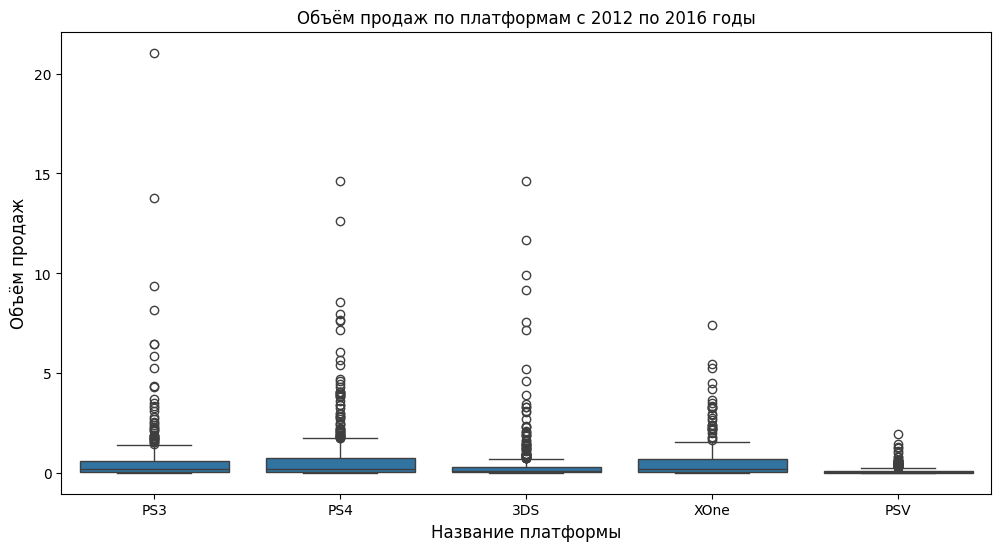

In [49]:
# визуализация диаграммы размаха значений признака потенциально прибыльных платформ с 2012 по 2016 годы
plt.figure(figsize=(12,6))
sns.boxplot(data=df_stable_top5, x='platform', y='total_sales');
plt.title('Объём продаж по платформам с 2012 по 2016 годы', fontsize=12)
plt.xlabel('Название платформы', fontsize=12)
plt.ylabel('Объём продаж', fontsize=12)
plt.show();

Чтобы лучше изучить медианные значения, установим параметр `ylim` равным 1.75 млн. проданных копий.

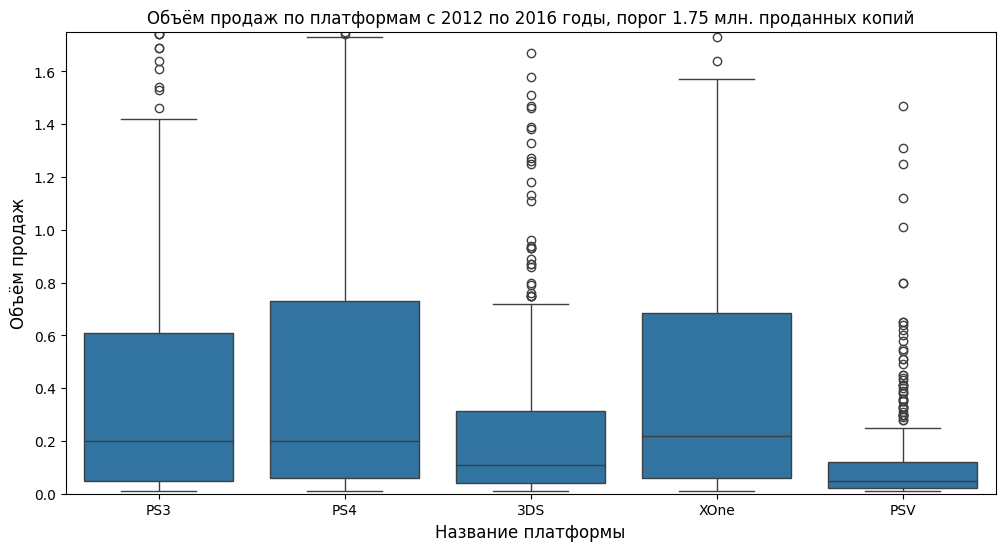

In [50]:
# визуализация диаграммы размаха значений признака потенциально прибыльных платформ с 2012 по 2016 годы
plt.figure(figsize=(12,6))
plt.ylim([0, 1.75])
sns.boxplot(data=df_stable_top5, x='platform', y='total_sales');
plt.title('Объём продаж по платформам с 2012 по 2016 годы, порог 1.75 млн. проданных копий', fontsize=12)
plt.xlabel('Название платформы', fontsize=12)
plt.ylabel('Объём продаж', fontsize=12)
plt.show();

Нижний порог значений для всех платформ находится выше нуля. Также для всех платформ характерно наличие значительного числа выбросов в виде аномально больших показателей.

Медианные значения количества проданных копий у большинства платформ смещены к нижнему краю, следовательно, мы имеем дело с большим количеством игр с небольшим количеством продаж. При этом, медианные значения платформ `XOne` и `PS3` больше и расположены выше. мы можем объяснить это более длительным сроком пребывания данных платформ на рынке и большим охватом аудитории.

Рассмотрим более подробно каждую платформу и объём продаж по ней в период 2012 по 2016 годы.

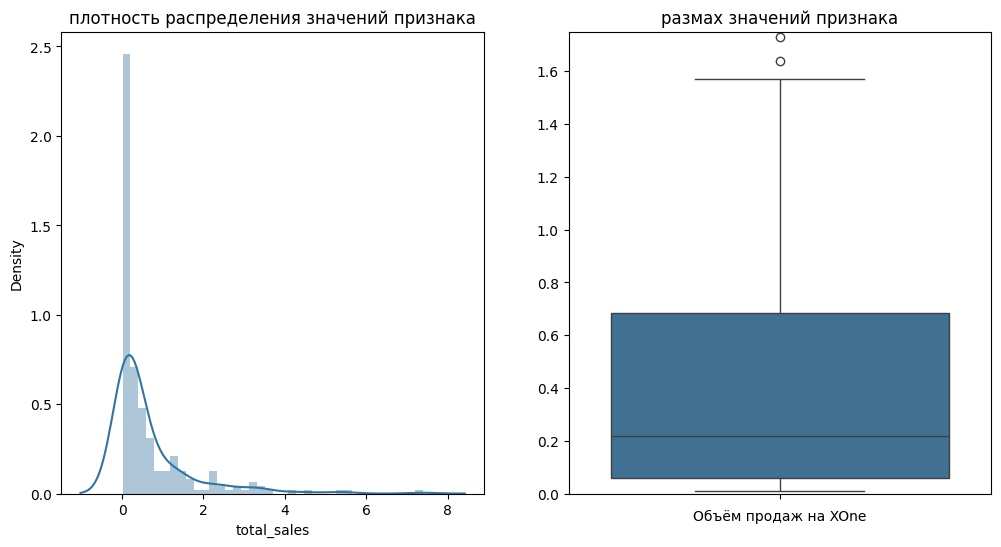

In [51]:
# в актуальном датафрейме `df_stable_top5` сделаем срез значений для платформы 'XOne'
df_stable_top5_XOne = df_stable_top5.query('platform =="XOne"')

# визуализация результата: парные диаграммы признака `total_sales` для платформы 'XOne'
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df_stable_top5_XOne['total_sales'], color='#3274a1')

plt.subplot(1,2,2)
plt.title('размах значений признака')
plt.ylim([0, 1.75])
sns.boxplot(y=df_stable_top5_XOne['total_sales'], color='#3274a1').set(ylabel='', xlabel='Объём продаж на XOne')

plt.show()

In [52]:
# описательная статистика для продаж по платформе XOne
df_stable_top5_XOne['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [53]:
# медианное значение продаж по платформе XOne
df_stable_top5_XOne['total_sales'].median()

0.22

In [54]:
# аномальные значения для платформы XOne
df_stable_top5.query('platform == "XOne" and total_sales > 0.64').sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,Not Rated by the ESRB,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
2955,Plants vs. Zombies: Garden Warfare,XOne,2014,Shooter,0.39,0.23,0.00,0.06,76.0,7.4,E10+,0.68
3006,The Evil Within,XOne,2014,Action,0.35,0.25,0.00,0.06,79.0,7.3,M,0.66
3045,Diablo III,XOne,2014,Role-Playing,0.36,0.24,0.00,0.06,NaN,NaN,Not Rated by the ESRB,0.66
3084,LEGO Jurassic World,XOne,2015,Action,0.38,0.22,0.00,0.06,70.0,6.7,E10+,0.66


Аномально большие выбросы для платформы `XOne` обеспечили бестселлеры, в абсолютном своём большинстве являющиеся шутерами с жёстким возрастным цензом: Call of Duty, Halo, Fallout, Star Wars Battlefront, Assassin's Creed, Destiny, Gears of War, The Witcher 3: Wild Hunt, Titanfall, Minecraft, Mortal Kombat X, Far Cry 4, Dead Rising 3. Их доминирование разбавляется небольшим числом спортивных (FIFA 15, FIFA 16, FIFA 17, NBA 2K16) или приключенческих игр (Ryse: Son of Rome, Rise of the Tomb Raider, Middle-Earth: Shadow of Mordor).

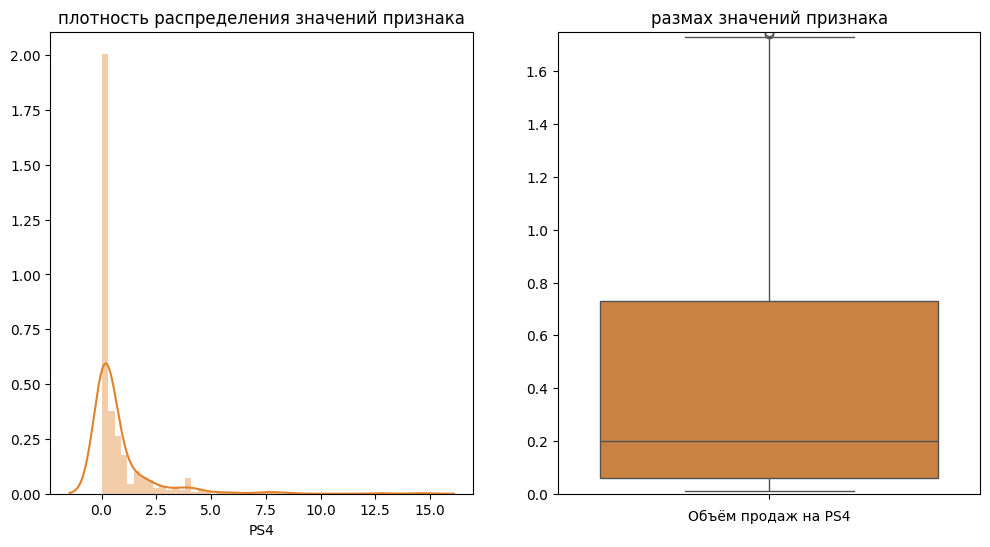

In [55]:
# в актуальном датафрейме `df_stable_top5` сделаем срез значений для платформы 'PS4'
df_stable_top5_PS4 = df_stable_top5.query('platform =="PS4"')

# визуализация результата: парные диаграммы признака `total_sales` для платформы 'PS4'
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df_stable_top5_PS4['total_sales'], color='#e1812c').set(ylabel='', xlabel='PS4')

plt.subplot(1,2,2)
plt.title('размах значений признака')
plt.ylim([0, 1.75])
sns.boxplot(y=df_stable_top5_PS4['total_sales'], color='#e1812c').set(ylabel='', xlabel='Объём продаж на PS4')

plt.show()

In [56]:
# описательная статистика для продаж по платформе PS4
df_stable_top5_PS4['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [57]:
# медианное значение продаж по платформе PS4
df_stable_top5_PS4['total_sales'].median()

0.2

In [58]:
# аномальные значения для платформы PS4
df_stable_top5.query('platform == "PS4" and total_sales > 0.80').sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Not Rated by the ESRB,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Not Rated by the ESRB,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
2301,LEGO Jurassic World,PS4,2015,Action,0.32,0.42,0.02,0.14,70.0,7.0,E10+,0.90
2332,MLB 16: The Show,PS4,2016,Action,0.72,0.00,0.00,0.17,NaN,NaN,Not Rated by the ESRB,0.89
2375,Borderlands: The Handsome Collection,PS4,2015,Shooter,0.38,0.33,0.03,0.14,82.0,7.8,M,0.88
2416,Guitar Hero Live,PS4,2015,Misc,0.34,0.38,0.00,0.14,80.0,6.2,T,0.86


Аномальные значения продаж игрового ПО для платформы `PS4` также обеспечили шутер с жёстким возрастным рейтингом Call of Duty: Black Ops 3 и экшн Grand Theft Auto V. Между ними существенный провал в значениях до следующей группы шутеров с суммами продаж порядка 5 - 8.5 млн. копий: Star Wars Battlefront (2015), Call of Duty: Advanced Warfare, Fallout 4, Destiny, The Last of Us, Call of Duty: Infinite Warfare.

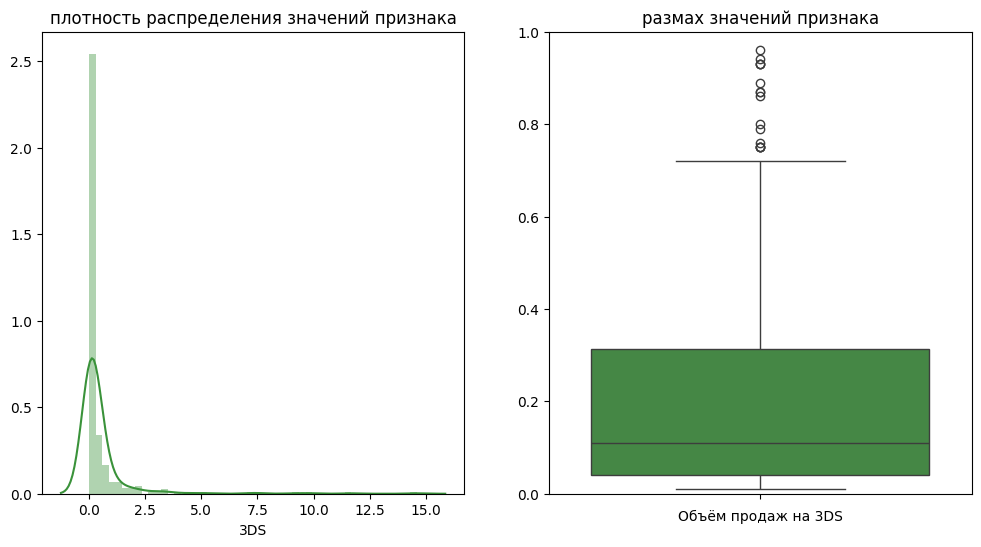

In [59]:
# в актуальном датафрейме `df_stable_top5` сделаем срез значений для платформы '3DS'
df_stable_top5_3DS = df_stable_top5.query('platform =="3DS"')

# визуализация результата: парные диаграммы признака `total_sales` для платформы '3DS'
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df_stable_top5_3DS['total_sales'], color='#3a923a').set(ylabel='', xlabel='3DS')

plt.subplot(1,2,2)
plt.title('размах значений признака')
plt.ylim([0, 1])
sns.boxplot(y=df_stable_top5_3DS['total_sales'], color='#3a923a').set(ylabel='', xlabel='Объём продаж на 3DS')

plt.show()

In [60]:
# описательная статистика для продаж по платформе 3DS
df_stable_top5_3DS['total_sales'].describe()

count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: total_sales, dtype: float64

In [61]:
# медианное значение продаж по платформе 3DS
df_stable_top5_3DS['total_sales'].median()

0.11

In [62]:
# аномальные значения для платформы 3DS
df_stable_top5.query('platform == "3DS" and total_sales > 0.31').sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Not Rated by the ESRB,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Not Rated by the ESRB,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,Not Rated by the ESRB,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...
5431,Angry Birds Star Wars,3DS,2013,Strategy,0.15,0.15,0.00,0.03,NaN,3.0,E,0.33
5564,Hatsune Miku: Project Mirai DX,3DS,2015,Misc,0.16,0.04,0.10,0.02,80.0,8.5,E10+,0.32
5589,Dragon Ball Heroes: Ultimate Mission 2,3DS,2014,Strategy,0.00,0.00,0.32,0.00,NaN,NaN,Not Rated by the ESRB,0.32
5749,LEGO Legends of Chima: Laval's Journey,3DS,2013,Adventure,0.18,0.10,0.00,0.03,65.0,3.6,E10+,0.31


Аномальные значения для портативной консоли `3DS` принадлежат приключенчским играм, паззлам, симуляторам и играм за отдельного персонажа общедоступного возрастного рейтинга за очень редким исключением "Для подростков". Если соединить все фрагменты этой картины, то мы получим портативную консоль с детским контентом, максимально широко распространённую на территории Японии: Pokemon X/Pokemon Y, Pokemon Omega Ruby/Pokemon Alpha Sapphire, Pokemon Sun/Moon, New Super Mario Bros. 2, Tomodachi Life, Luigi's Mansion: Dark Moon, Monster Hunter, Yokai Watch, Donkey Kong Country Returns, Kingdom Hearts 3D: Dream Drop Distance, Puzzle & Dragons, LEGO City Undercover.

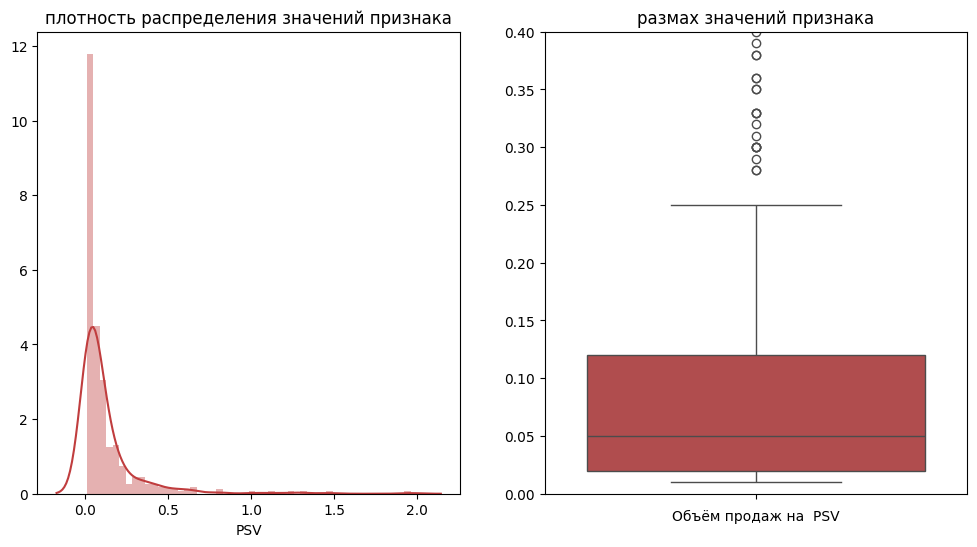

In [63]:
# в актуальном датафрейме `df_stable_top5` сделаем срез значений для платформы 'PSV'
df_stable_top5_PSV = df_stable_top5.query('platform =="PSV"')

# визуализация результата: парные диаграммы признака `total_sales` для платформы 'PSV'
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df_stable_top5_PSV['total_sales'], color='#c03d3e').set(ylabel='', xlabel='PSV')

plt.subplot(1,2,2)
plt.title('размах значений признака')
plt.ylim([0, 0.4])
sns.boxplot(y=df_stable_top5_PSV['total_sales'], color='#c03d3e').set(ylabel='', xlabel='Объём продаж на PSV')

plt.show()

In [64]:
# описательная статистика для продаж по платформе PSV
df_stable_top5_PSV['total_sales'].describe()

count    411.000000
mean       0.119659
std        0.203011
min        0.010000
25%        0.020000
50%        0.050000
75%        0.120000
max        1.960000
Name: total_sales, dtype: float64

In [65]:
# медианное значение продаж по платформе PSV
df_stable_top5_PSV['total_sales'].median()

0.05

In [66]:
# аномальные значения для платформы PSV
df_stable_top5.query('platform == "PSV" and total_sales > 0.12').sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
868,Minecraft,PSV,2014,Misc,0.18,0.64,0.90,0.24,NaN,NaN,Not Rated by the ESRB,1.96
1294,Call of Duty Black Ops: Declassified,PSV,2012,Action,0.71,0.43,0.07,0.26,33.0,4.8,M,1.47
1485,Assassin's Creed III: Liberation,PSV,2012,Action,0.53,0.48,0.06,0.24,70.0,7.2,M,1.31
1595,LittleBigPlanet PS Vita,PSV,2012,Platform,0.35,0.61,0.02,0.27,88.0,8.6,E,1.25
1831,Persona 4: Golden,PSV,2012,Role-Playing,0.36,0.23,0.38,0.15,93.0,9.2,M,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...
9536,Deception IV: Blood Ties,PSV,2014,Action,0.02,0.02,0.07,0.01,67.0,7.5,M,0.12
9658,LEGO Marvel's Avengers,PSV,2016,Action,0.02,0.07,0.00,0.03,NaN,6.6,E10+,0.12
9949,Reality Fighters,PSV,2012,Fighting,0.05,0.05,0.00,0.02,54.0,3.8,T,0.12
9993,Dynasty Warriors 8: Xtreme Legends,PSV,2013,Action,0.03,0.02,0.05,0.02,NaN,NaN,Not Rated by the ESRB,0.12


Аномальные данные по продажам для портативной консоли `PSV` содержат выбросы по игре смешанного типа Minecraft, экшенам Call of Duty и Assassin's Creed III. Это качественная попытка переставить известные игры для стационарных приставок на портативные "рельсы".

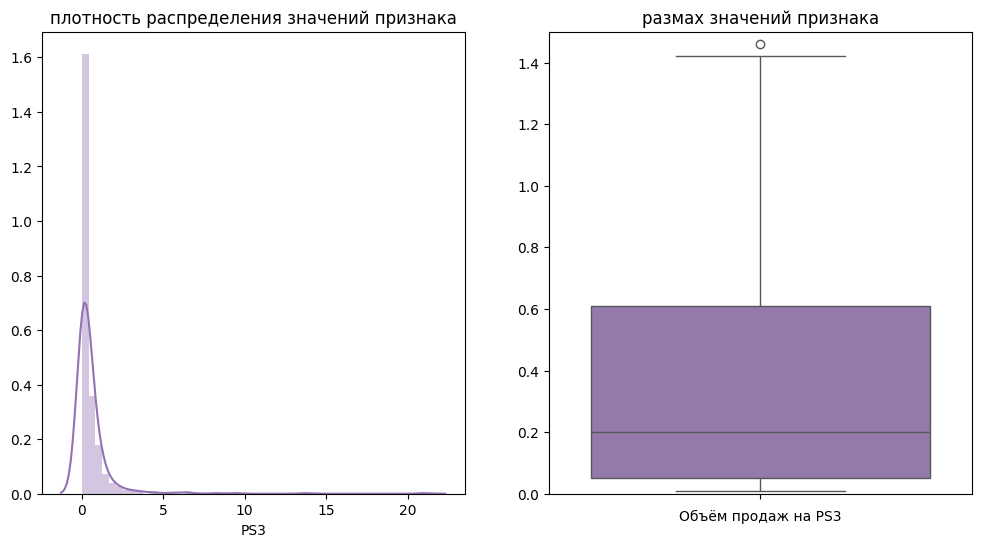

In [67]:
# в актуальном датафрейме `df_stable_top5` сделаем срез значений для платформы 'PS3'
df_stable_top5_PS3 = df_stable_top5.query('platform =="PS3"')

# визуализация результата: парные диаграммы признака `total_sales` для платформы 'PS3'
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df_stable_top5_PS3['total_sales'], color='#9372b2').set(ylabel='', xlabel='PS3')

plt.subplot(1,2,2)
plt.title('размах значений признака')
plt.ylim([0, 1.5])
sns.boxplot(y=df_stable_top5_PS3['total_sales'], color='#9372b2').set(ylabel='', xlabel='Объём продаж на PS3')

plt.show()

In [68]:
# описательная статистика для продаж по платформе PS3
df_stable_top5_PS3['total_sales'].describe()

count    492.000000
mean       0.586951
std        1.464113
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: total_sales, dtype: float64

In [69]:
# медианное значение продаж по платформе PS3
df_stable_top5_PS3['total_sales'].median()

0.19999999999999998

In [70]:
# аномальные значения для платформы PS3
df_stable_top5.query('platform == "PS3" and total_sales > 0.61').sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
...,...,...,...,...,...,...,...,...,...,...,...,...
3173,LittleBigPlanet 3,PS3,2014,Platform,0.20,0.33,0.01,0.10,NaN,7.2,E,0.64
3136,Metal Gear Solid V: The Phantom Pain,PS3,2015,Action,0.22,0.13,0.22,0.07,NaN,7.2,M,0.64
3166,NHL 13,PS3,2012,Sports,0.33,0.21,0.00,0.09,84.0,6.8,E10+,0.63
3301,Borderlands: The Pre-Sequel,PS3,2014,Shooter,0.26,0.21,0.05,0.10,77.0,6.3,M,0.62


Аномальные значения по продажам игрового ПО для стационарной платформы `PS3` открываются топовыми играми Grand Theft Auto V и Call of Duty: Black Ops II. Эти бестселлеры 2012 и 2013 годов были проданы общим количеством порядка 34 млн. копий. В соответствии с запросом аудитории эти игры в жанрах экшн и шутер с высоким возрастным цензом. Рядом с этими "золотыми" играми расположились также очень популярные шутеры, экшены и спортивные игры с высоким или общедоступным возрастным цензом: Call of Duty: Ghosts, FIFA, Assassin's Creed III, The Last of Us, Minecraft, Diablo III, Tomb Raider (2013). Многие из этих игр были проданы тиражом от 3 до 5 млн.копий.

Подводя итоги вышесказанному, мы подготовили обобщённые данные по размаху значений признака количества продаж по популярным платформам в период с 2012 по 2016 годы в таблице ниже. Путём последовательного применения метода `query` нами были получены профильные срезы данных с информацией по уровню продаж игрового ПО для каждого типа платформы в актуальном периоде. С помощью методов `describe` и `median` получены значения описательной статистики, на основании которой мы можем сделать развёрнутый вывод в дополнение к вышепостроенной диаграмме `boxplot`.

*Таблица 3. Обобщённые статистические данные по размаху значений количества продаж популярных игровых платформ в период с 2012 по 2016 годы.*

|платформа| записей, ед.|min продажи|Q3 продаж|max продажи|mean продаж|median продаж|
|:--------|:------------|:----------|:--------|:----------|:----------|:------------|
|`XOne`|247|0.01|0.68|7.39|0.64|0.22|
|`PS4` |392|0.01|0.73|14.63|0.80|0.2|
|`3DS` |396|0.01|0.31|14.60|0.49|0.11|
|`PSV` |411|0.01|0.12|1.96|0.11|0.05|
|`PS3` |492|0.01|0.61|21.05|0.58|0.19|


Итак, нижний порог значений для всех платформ находится немногим выше нуля на отметке 0.01. По количеству продаж есть явный лидер `PS4`, догоняющие его платформы и отстающие. Верхние значения усов диаграммы `boxplot` всех платформ не превышают порога в 1.5 млн. проданных копий. Внутри "ящика" по каждой платформе медиана расположена примерно на одном уровне около 0.2 млн. копий. Эти "медианные" игры придают условной стабильности и длительности существования платформы. За этой границей у каждой топовой платформы находится целая вереница аномальных выбросов разной величины: буквально от 1.96 до 21.05 млн. проданных копий. Следовательно, каждая топовая платформа целенаправленно формирует стратегию на текущий год: выпуск некоторого количества "проходных" игр, которые абсолютно точно укладываются в усреднённые запросы потребителей, и выпуск одного потенциального бестселлера  в жанре шутер / экшен с интересным, захватывающим сюжетом, хорошей графикой и высоким возрастным рейтингом.

<a id=3.6.></a>
#### 3.6. Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы. Корреляция между отзывами и продажами (диаграмма рассеяния с линией регрессии)

В формулировке задания указана "одна популярная платформа" — под этим описанием скрывается `PS4`, абсолютный лидер из топовых игровых платформ в период с 2012 по 2016 годы. Поскольку в дальнейшем исследовании нам необходимо рассмотреть все пять топовых  платформ, предлагаем написать функцию для рассчёта корреляции продаж той или иной платформы с оценками критиков и игроков, выводом парных диаграмм размаха значений по данным признакам в разрезе каждой платформы, а также парные точечные диаграммы с линией регрессии для большей наглядности.

In [71]:
# создаём функцию для рассчётов и визуализации корреляции, диаграмм размаха занчений и регрессии

def analyze_platform(df, platform_name):
    # фильтруем данные по платформе
    df_platform = df[df['platform'] == platform_name]

    # поиск взаимосвязей в данных: расчёт корреляции между отзывами и продажами
    correlation_matrix = df_platform[['critic_score', 'user_score', 'total_sales']].corr()[['total_sales']].sort_values(
        by='total_sales', ascending=False)

    # визуализация корреляции с помощью тепловой карты
    plt.figure(figsize=(4, 2))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'size':10}, fmt=".2f")
    plt.title(f'Корреляция для платформы {platform_name}')
    plt.show()

    # парные диаграммы размаха значений оценок критиков и игроков определённой платформы
    plt.figure(figsize=(12, 2))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_platform['critic_score'], color='#FF7400')
    plt.title(f'Размах значений оценок критиков {platform_name}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_platform['user_score'], color='#009999')
    plt.title(f'Размах значений оценок игроков {platform_name}')
    plt.xlabel('Оценка игроков')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

    # визуализацмя регрессионной взаимосвязи между отзывами и продажами
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.regplot(data=df_platform, x='critic_score', y='total_sales', 
                scatter_kws={'color': '#FF7400'}, line_kws={'color': 'black'})
    plt.title(f'Регрессионная взаимосвязь \n оценки критиков и продаж {platform_name}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Общие продажи')

    plt.subplot(1, 2, 2)
    sns.regplot(data=df_platform, x='user_score', y='total_sales', 
                scatter_kws={'color': '#009999'}, line_kws={'color': 'black'})
    plt.title(f'Регрессионная взаимосвязь \n оценки игроков и продаж {platform_name}')
    plt.xlabel('Оценка игроков')
    plt.ylabel('Общие продажи')

    plt.tight_layout()
    plt.show()

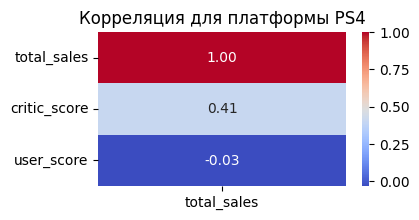

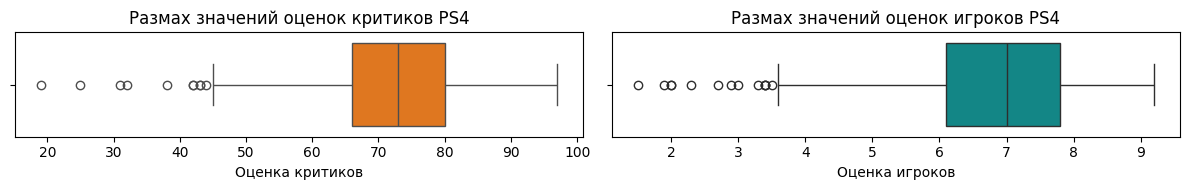

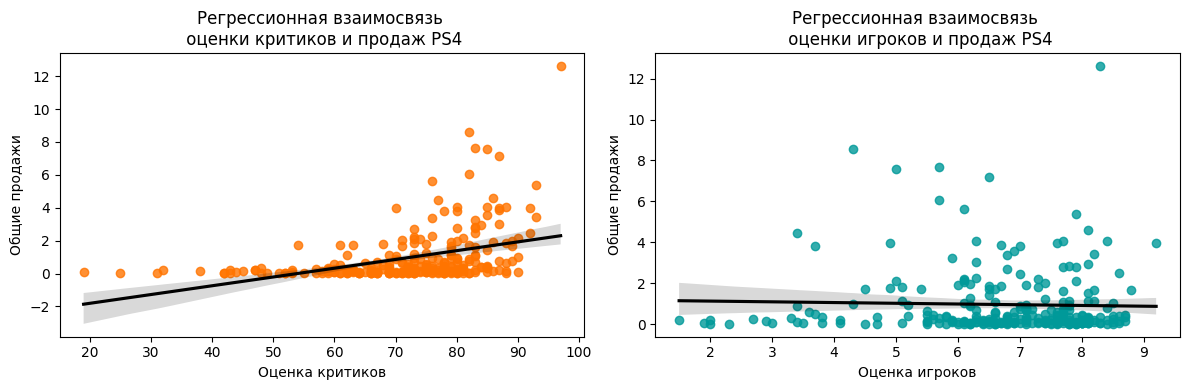

In [72]:
# вызов функции для самой популярной платформы `PS4`
analyze_platform(df_stable_top5, 'PS4')

**Вывод:** точечная диаграмма с линией регрессии наглядно показывает тенденцию в данных - умеренный положительный коэффициент корреляции оценок профессиональных критиков и его линейную положительную направленность, одновременно с этим, оценка пользователей как таковая практически не превышает нуля, и если понимать буквально, то от мнения пользователя количество продаж игрового контента для платформы `PS4` не зависит.

<a id=3.7.></a>
#### 3.7. Сопоставление выводов с продажами игр на других платформах

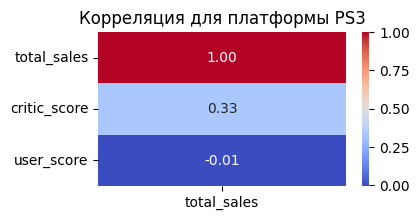

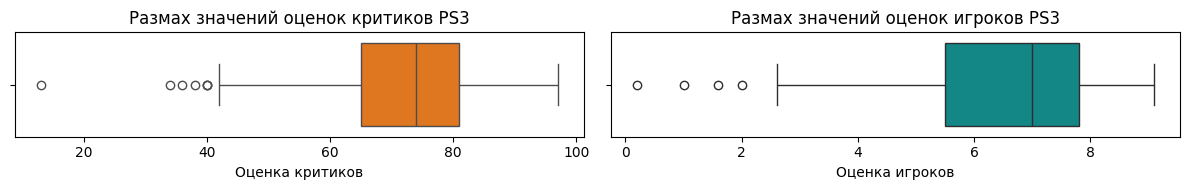

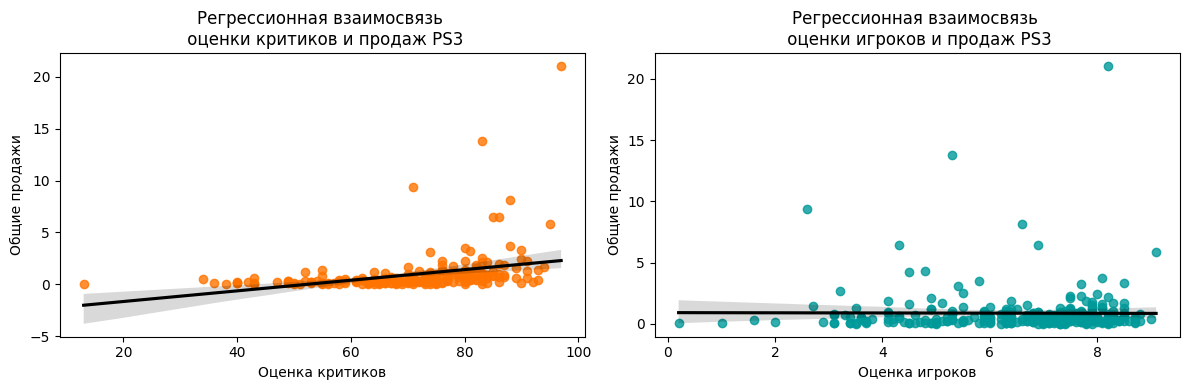

In [73]:
# вызов функции для платформы `PS3`
analyze_platform(df_stable_top5, 'PS3')

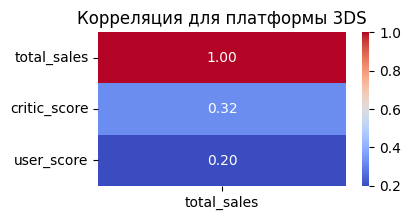

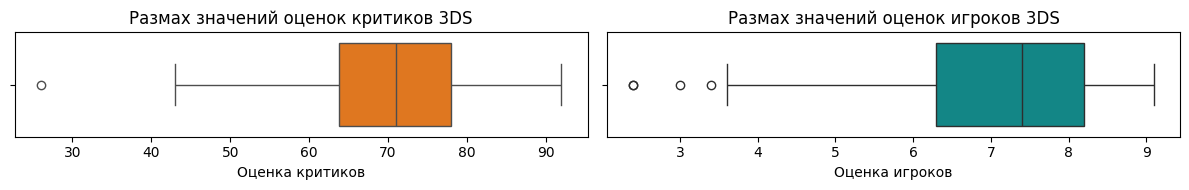

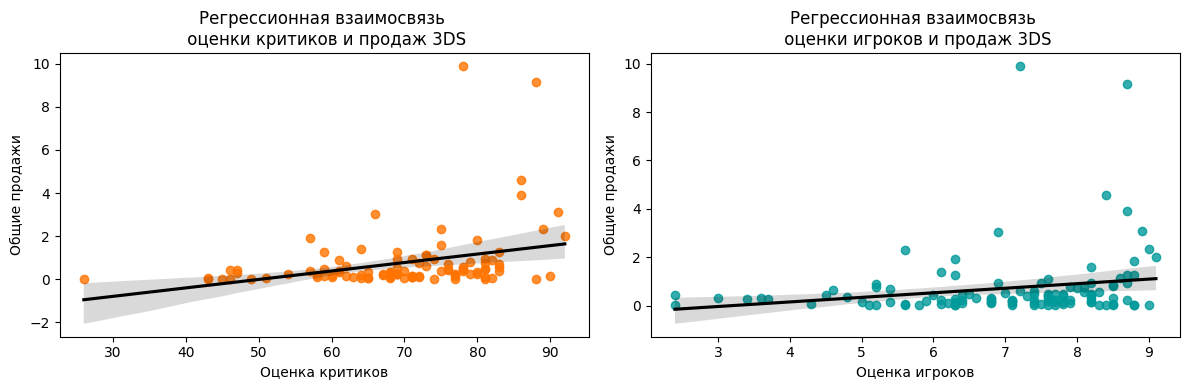

In [74]:
# вызов функции для платформы `3DS`
analyze_platform(df_stable_top5, '3DS')

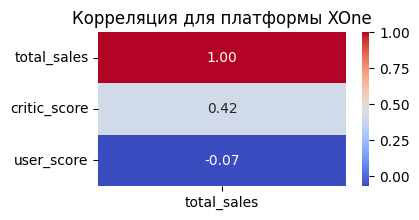

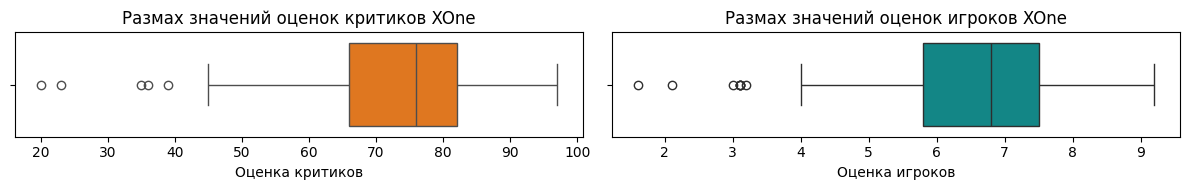

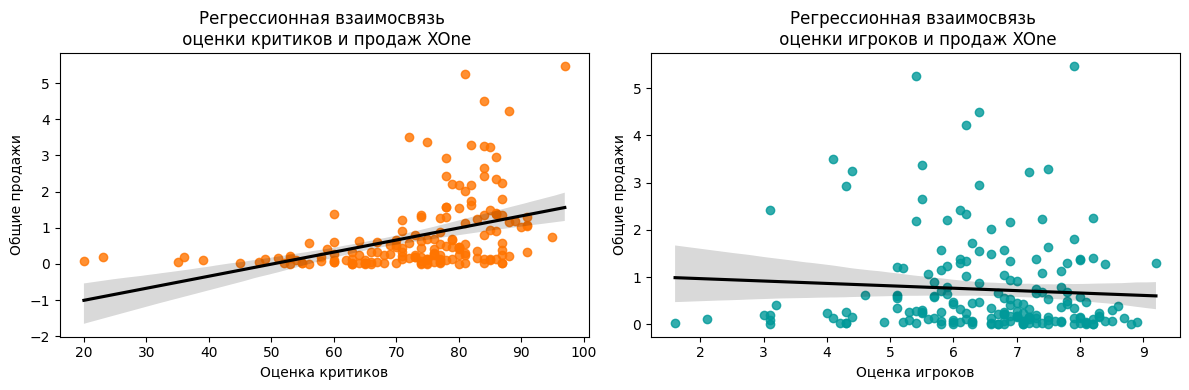

In [75]:
# вызов функции для платформы `XOne`
analyze_platform(df_stable_top5, 'XOne')

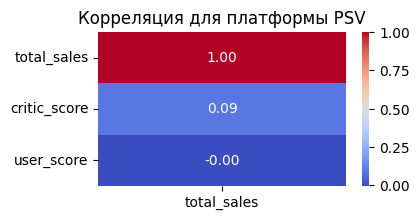

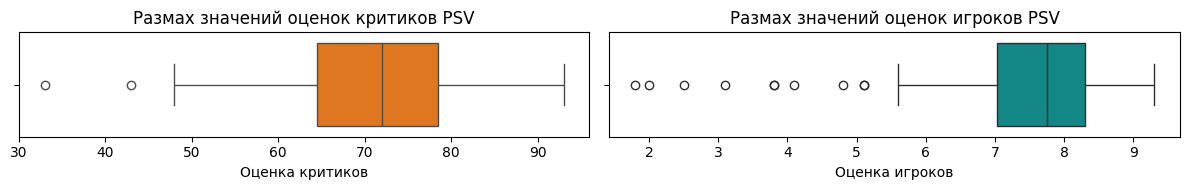

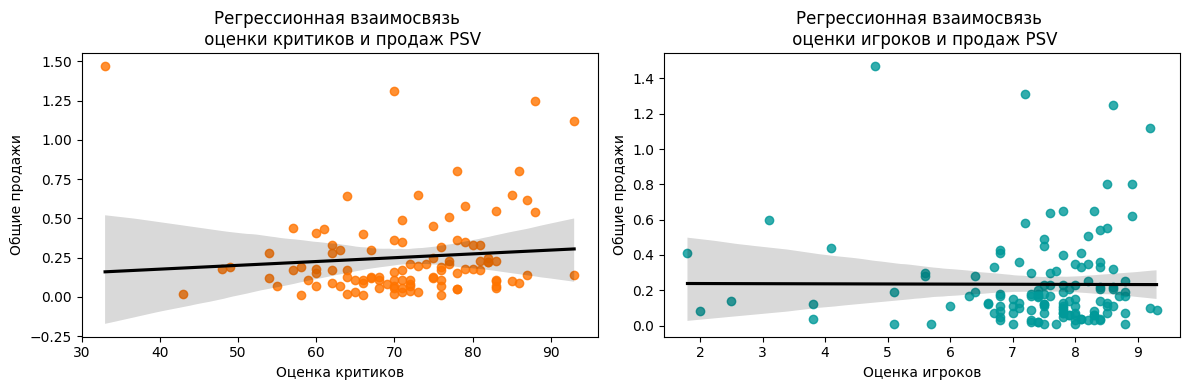

In [76]:
# вызов функции для платформы `PSV`
analyze_platform(df_stable_top5, 'PSV')

**Вывод:** вопрос взаимосвязи уровня продаж и оценок критиков и пользователей по остальным топовым платформам `PS3`, `3DS`, `XOne`, `PSV` не находит такого же однозначного ответа, как мы это наблюдали ранее в разрезе платформы `PS4`.

*Таблица . Обобщённые статистические данные по размаху значений оценок критиков и пользователей, а также мера корреляции этих величин с количеством продаж популярных игровых платформ в период с 2012 по 2016 годы.*

|Наименование платформы| Мера корреляции с оценками критиков| Мера корреляции с оценками пользователей |Диапазон оценок критиков| Диапазон оценок пользователей|
|------|----|----|----|----|
|`PS4` |0.4|-0.03|19.0 - 97.0|1.5 - 9.2|
|`PS3` |0.33|-0.006|13.0 - 97.0|0.2 - 9.1|
|`3DS` |0.32|0.19|26.0 - 92.0|2.4 - 9.1|
|`XOne`|0.41|-0.06|20.0 - 97.0|1.6 - 9.2|
|`PSV` |0.09|-0.004|33.0 - 93.0|1.8 - 9.3|

Так, для платформы `PS3` и `XOne` размах значений оценок и меры корреляции оценки критиков и пользователей ещё укладываются в общий концепт, то в отношении платформы Nintendo `3DS` голос пользователя с явным японским акцентом имеет большее значение и мера корреляции здесь вырастает до 0.19. Это значение в абсолютном смысле кажется малым, но на фоне остальных мер корреляции оценок пользователей – единственное положительное. Платформа `PSV` приятно удивляет обеими мерами корреляции, которые едва достигают 0.09 (оценка критиков) и -0.004 (оценка пользователей). Визуализация регрессивной взаимосвязи этих признаков с уровнем продаж помогает выявить причину такого положения дел: отзывы обеих сторон о платформе PSV в большинстве высокие позитивные, диапазон оценок критиков выше, чем у других платформ.

<a id=3.8.></a>
#### 3.8. Общее распределение игр по жанрам. Самые прибыльные жанры. Жанры с высокими и низкими продажами

На текущий момент у нас в распоряжении имеется два смежных датафрейма со стабильными данными за период 2012 - 2016 годов: полный и с фильтром по топовым игровым платформам. К рассмотрению к этом исследовательском разделе предлагается полный датафрейм `df_stable`, содержащий 2885 строк в разрезе 12 признаков.

In [77]:
# уникальные игровые жанры
df_stable['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

Обобщённые аналитические данные в разрезе жанров компьютерных игр, их содержания и возрастного рейтинга приведены в таблице ниже. Данные отсортированы в алфавитном порядке наименования игрового жанра.

*Таблица. Общее распределение игр по жанрам*

|№ п/п |Игровой жанр|Ключевые характеристики жанра|Типичный возрастной рейтинг|Примеры игр|
|------|:-----------|:----------------------------|:--------------------------|:----------|
|1.|`Action`|«Экшн» или в русскоязычном сегменте «Боевик». Упор делается на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции. В экшен-играх обычно игрок управляет протагонистом или аватаром. Этот персонаж должен найти выход из уровня, собрать предметы, избежать препятствий и сразиться с врагами разными способами. Действие таких игр развивается очень динамично и требует высокой концентрации внимания и быстрой реакции на происходящие в игре события. В конце уровня или ряда уровней игрок обычно сражается с боссом, битва с которым более требовательна к игроку, а сам босс зачастую крупнее обычных врагов. Препятствия и вражеские атаки истощают здоровье и запас жизней аватара. При отсутствии у него жизней, игрок получает сообщение «Game over». В другом случае, когда серия уровней успешно пройдена, игрок побеждает.|Высокий возрастной рейтинг `M` и `T` у 353 игр, 203 игры для возраста от 10 лет и старше, ERSB не участвовало в присвоении рейтинга для 475 игр этого жанра.|Assassin's Creed, The Last of Us, Uncharted, Batman, Monster Hunter, Mafia, The Evil Within, Kinect Star Wars, Hitman: Absolution, Dishonored|
|2.|`Adventure`|«Приключенческая игра», «Квест», «Адвенчура». Это интерактивная история с главным героем, управляемым игроком. Важнейшими элементами игры в жанре квеста являются собственно повествование и исследование мира, а ключевую роль в игровом процессе играет решение головоломок и задач, требующих от игрока умственных усилий. Такие характерные для других жанров компьютерных игр элементы, как бои, экономическое планирование и задачи, требующие от игрока скорости реакции и быстрых ответных действий, в квестах сведены к минимуму или вовсе отсутствуют. У приключенческой игры может быть запутанный и сложный сюжет, а если его он присутствует по минимуму или вовсе отсутствует, то в этом случае атмосфера занимает место сценария.|Высокий возрастной рейтинг `M` и `T` у 45 игр, 23 игры для возраста от 10 лет и старше, ERSB не участвовало в присвоении рейтинга для 234 игр этого жанра.|Myst, Syberia, Day of the Tentacle и Space Quest, Fahrenheit, Heavy Rain, The Last Express, Penumbra, Amnesia|
|3.|`Fighting`|«Файтинг» или в русскоязычном сегменте «Поединок / Бой / Драка / Борьба». Имитация рукопашного боя малого числа персонажей в пределах ограниченного пространства, называемого ареной (часть игровой вселенной, не управляемая участником игры, на которой происходят основные действия игры). В большинстве файтингов игроку не требуется перемещаться по длинному уровню и нельзя выйти за границы арены, а бой состоит из нечётного числа отдельных раундов и не является непрерывным. Менее значительными и необязательно присутствующими признаками жанра являются использование многочисленных шкал для изображения жизненно важных показателей персонажей и прорисовка бойцов на арене в профиль. Файтинги также могут относиться к категории спортивных игр.|Высокий возрастной рейтинг `M` и `T` у 68 игр, только 3 игры для возраста от 10 лет и старше, ERSB не участвовало в присвоении рейтинга для 38 игр этого жанра.|Mortal Kombat, Tekken, Virtua Fighter 2, Dead or Alive, Guilty Gear X|
|4.|`Misc`|«Miscellaneous» или «Смешанный жанр». В таких играх сложно выделить какой-либо конкретный игровой жанр, зачастую, несколько жанров в той или иной мере включены в сюжет.|Высокий возрастной рейтинг `M` и `T` у 24 игр, большинство для возраста от 10 лет и старше, их представлено 61 наименование, ERSB не участвовало в присвоении рейтинга для 107 игр этого жанра.|Minecraft, Nintendo Land, Just Dance, Mario Party, Rocksmith|
|5.|`Platform`|2D-игра, в которой игрок должен избегать ловушек и врагов, а уровни состоят из статичных или движущихся платформ. Например, из воздушных островов, частей суши, стен и так далее. Геймплей прост и требует, чтобы игрок зарабатывал очки, собирая монеты или их эквивалент.|Абсолютное большинство (68 наименований) созданы для возрастной аудитории 10+, высокий возрастной рейтинг `T` здесь встречается только у 5 игр, ERSB не участвовало в присвоении рейтинга для 12 игр этого жанра.|New Super Mario Bros. 2, Sonic Lost World, Donkey Kong Country Returns, Naruto: Powerful Shippuden|
|6.|`Puzzle`|«Паззл» или «Головоломка». Ключевую роль играет решение головоломок, загадок и других задач. В таких играх редко можно найти элементы action игр. В основном, требуется умственное усилие игрока. Миссии могут быть текстовыми, как интерактивная книга, и графическими, связанными с поиском объектов на картинке.|Абсолютное большинство (15 наименований) созданы для возрастной аудитории 10+, высокий возрастной рейтинг `T` здесь встречается только у 1 игры, ERSB не участвовало в присвоении рейтинга для 12 игр этого жанра.|Puzzler Brain Games, Puyo Puyo Tetris, Mario vs. Donkey Kong: Tipping Stars, Jewel Master: Cradle of Persia, Paddington: Adventures in London|
|7.|`Racing`|«Гонки». Игрок принимает участие в гоночном соревновании среди наземных, водных, воздушных или космических транспортных средств. Основой этих соревнований могут быть какие-то реально существующие гоночные серии, также они могут проходить в полностью вымышленных сеттингах. В общем случае гоночной игрой может быть компьютерная игра любого жанра: от автосимуляторов высокой степени реализма до относительно простых аркадных гоночных игр. Гоночные игры также могут относиться к категории спортивных игр.|Большинство - 76 игр - созданы для возрастной аудитории 10+, высокий возрастной рейтинг `T` здесь встречается только у 12 игр, ERSB не участвовало в присвоении рейтинга для 27 игр этого жанра.|Gran Turismo, Need for Speed, Forza, DriveClub, The Crew, F1, Project CARS|
|8.|`Role-Playing`|«RPG» или в русскоязычном сегменте «Компьютерная ролевая игра». Основан на элементах игрового процесса традиционных настольных ролевых игр. В ролевой игре игрок управляет одним или несколькими персонажами, каждый из которых описан набором численных характеристик, списком способностей и умений; примерами таких характеристик могут быть очки здоровья, показатели силы, ловкости, интеллекта, защиты, уклонения, уровень развития того или иного навыка и т.п. Обычно игрок управляет одним или несколькими главными героями («партией») и добивается победы, выполняя задания («квесты»), участвуя в тактических боях и доходя до самого конца сюжета. Ключевая особенность заключается в том, что персонажи растут в способностях, и этот рост, зачастую, контролируется игроком.|156 наименований были созданы для взрослой аудитории, и только 17 доступны для продажи в возрастной аудитории 10+, ERSB не участвовало в присвоении рейтинга для 197 игр этого жанра.|Dark Souls, The Witcher, Fantasy Life, Kingdom Hearts II, Diablo III|
|9.|`Shooter`|«Шутер» или в русскоязычном сегменте «Стрелялка». Игроку необходимо уничтожать большое количество врагов. Для этого разработчик даёт в руки персонажа разного рода оружие, предоставляет ему гаджеты или наделяет фантастическими силами. Все эти методы различают только способ взаимодействия с врагами, ловушками или транспортными средствами. Обычно по центру экрана в шутере изображается «прицел», имеющий вид от простой точки до массивного сложного рисунка. Существуют также шутеры, в которых прицел отсутствует, а прицеливание производится с помощью мушки оружия. Игрок наводит прицел на врага и нажимает клавишу атаки. В зависимости от точности игрока, разброса и эффективности оружия, враг может быть ранен, убит, либо нетронут.|185 наименований ожидаемо были созданы для взрослой аудитории, и только 16 доступны для продажи в возрастной аудитории 10+, ERSB не участвовало в присвоении рейтинга для 34 игр этого жанра.|Max Payne, Return to Castle Wolfenstein, Doom, Half-life, FarCry, F.E.A.R., Unreal Tournament, Quake|
|10.|`Simulation`|«Симулятор». Игрок принимает участие в имитации управления каким-либо процессом, аппаратом или транспортным средством. В отличие от других жанров видео-и компьютерных игр, симуляторы точно представляют или имитируют окружающую среду. Более того, они реалистично отображают взаимодействие между игровыми персонажами и окружающей средой. Эти виды игр обычно более сложны с точки зрения геймплея. Многие симуляторы стали невероятно популярны среди людей всех возрастов.|19 наименований имеют выской возрастной рейтинг, 21 игра доступна для продажи в возрастной аудитории 10+, ERSB не участвовало в присвоении рейтинга для 38 игр этого жанра.|SimCity, Tiger Woods PGA Tour|
|11.|`Sports`|«Спортивный симулятор». Имитация занятия спортом. В играх было создано большинство видов спорта, включая командные виды спорта, лёгкую атлетику, экстремальные виды спорта и боевые виды спорта. Некоторые игры подчеркивают фактическую игру в спорт (например, FIFA, Pro Evolution Soccer и Madden NFL), в то время как другие подчеркивают стратегию и управление в спорте (например, Football Manager и Out of the Park Baseball). Некоторые, такие как Need for Speed, Arch Rivals и Punch-Out!!, высмеивают спорт для комического эффекта. Этот жанр был популярен на протяжении всей истории видеоигр и является соревновательным, как и в реальном спорте. Ряд игровых серий содержат имена с характеристиками реальных команд и игроков, а также ежегодно обновляются, чтобы отразить изменения в реальном мире. Спортивный жанр — один из старейших жанров в истории игр.|Только 24 позиции имеют возрастное ограничение "Для подростков", абсолютное большинство представляют игры с общедоступным рейтингом 10+, таких наименований насчитывается 183, ERSB не участвовало в присвоении рейтинга для 60 игр этого жанра.|FIFA, NBA 2K16, Madden NFL 16, Pro Evolution Soccer 2013, Football Manager 2013, WWE 2K15, EA Sports UFC|
|12.|`Strategy`|«Стратегия». Жанр стратегических компьютерных игр, в которых отсутствует «очерёдность ходов» в отличие от компьютерных или настольных пошаговых стратегий. Участники стратегии в реальном времени позиционируют и маневрируют подразделениями и сооружениями, находящимися под их контролем, для защиты районов карты и / или уничтожения активов своих оппонентов. В типовой стратегии в ходе игры можно создавать дополнительные подразделения и сооружения. Обычно это ограничивается требованием расходования накопленных ресурсов. Эти ресурсы, в свою очередь, получаются путём контроля специальных точек на карте и / или обладания определенными типами единиц и структур, предназначенных для этой цели. Таким образом, типичная стратегия – это сбор ресурсов, постройка базы, внутриигровая технологическая разработка и косвенный контроль подразделений. Игровой процесс стратегий в реальном времени состоит из управления имеющимися ресурсами на карте для получения победы.|Только 18 позиций имеют высокое возрастное ограничение, очень мало игр с общедоступным рейтингом 10+, таких наименований насчитывается только 12, ERSB не участвовало в присвоении рейтинга для 41 игр этого жанра.|StarCraft, Civilization, Total War, XCOM, Company of Heroes 2, Angry Birds Star Wars, Dragon Ball Heroes, Code Name: S.T.E.A.M.|

In [78]:
# игровые жанры: количество в разрезе каждой платформы
df_stable.pivot_table(index='genre', columns='platform', values='total_sales', aggfunc='sum', \
                      margins=True, margins_name='Всего').fillna(0).sort_values(by='Всего', ascending=False)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,Всего
genre,,,,,,,,,,,,
Всего,194.61,12.55,62.65,288.78,314.14,11.19,49.18,35.37,82.19,236.54,159.32,1446.52
Action,45.49,1.82,13.14,115.75,96.10,3.76,16.33,10.75,19.07,81.60,37.31,441.12
Shooter,0.13,0.00,14.27,60.39,88.56,0.00,2.34,0.00,6.01,72.70,60.33,304.73
Role-Playing,79.30,9.08,13.65,22.62,28.99,2.81,12.05,1.06,2.89,9.80,10.55,192.80
Sports,4.23,0.11,3.26,44.83,55.61,1.41,3.21,2.11,3.16,36.39,26.74,181.06
Misc,9.45,0.48,0.73,8.88,8.19,0.41,4.32,17.86,12.46,14.83,7.43,85.04
Platform,19.11,0.69,0.14,4.26,7.69,0.00,2.26,2.25,21.53,2.14,0.93,61.00
Racing,0.28,0.00,1.23,11.56,12.14,0.00,2.21,0.01,7.87,8.41,9.79,53.50
Fighting,8.46,0.00,0.12,11.00,8.65,0.36,2.21,0.00,6.27,4.97,2.45,44.49


In [79]:
# игровые жанры: количество в разрезе возрастного рейтинга
df_stable.pivot_table(index='rating', columns='genre', values='name', aggfunc='count', \
                      margins=True, margins_name='Всего').fillna(0).sort_values(by='Всего', ascending=False).astype(int)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Всего
rating,,,,,,,,,,,,,
Всего,1031,302,109,192,85,28,115,370,235,80,267,71,2885
Not Rated by the ESRB,475,234,38,107,12,12,27,197,34,38,60,41,1275
M,215,31,11,5,0,0,2,70,158,2,0,4,498
T,138,14,57,19,5,1,10,86,27,17,24,14,412
E,73,4,0,21,28,9,62,5,0,19,165,8,394
E10+,130,19,3,40,40,6,14,12,16,4,18,4,306


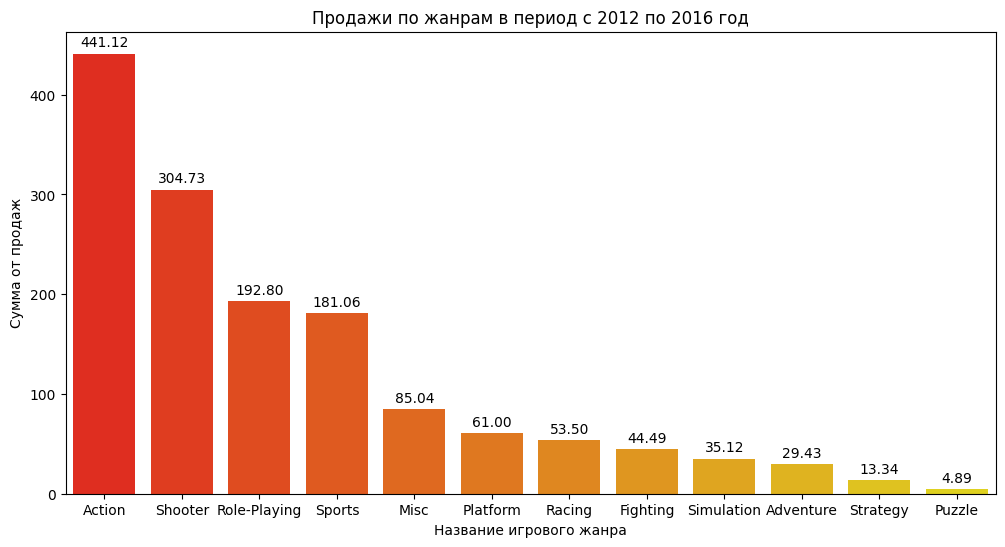

In [80]:
# распределение жанров по продажам
genre_lineplot_sales = df_stable[['genre', 'total_sales']].groupby('genre').sum().\
                sort_values('total_sales', ascending=False).reset_index()

# визуализация динамики продаж по игровым платформам: лидеры продаж
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=genre_lineplot_sales, x='genre', y='total_sales', palette='autumn')
plt.title('Продажи по жанрам в период с 2012 по 2016 год', fontsize=12)
plt.ylabel('Сумма от продаж')
plt.xlabel('Название игрового жанра')

# добавление значений над столбцами
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

plt.show()

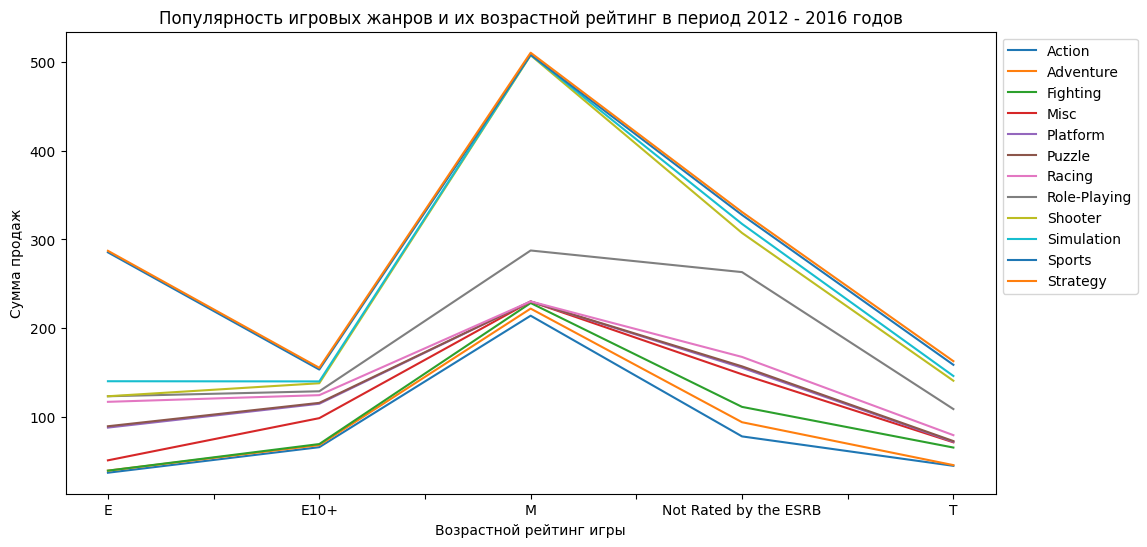

In [81]:
# визуализация динамики продаж по топовым игровым платформам: распределение по годам
fig, ax = plt.subplots(figsize=(12,12))

df_stable.pivot_table(index='genre', columns='rating', 
                  values='total_sales', aggfunc='sum').T.plot(kind='line', stacked=True, ax=ax, figsize=(12,6))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Возрастной рейтинг игры')
ax.set_ylabel('Сумма продаж')
ax.set_title('Популярность игровых жанров и их возрастной рейтинг в период 2012 - 2016 годов')

plt.show()

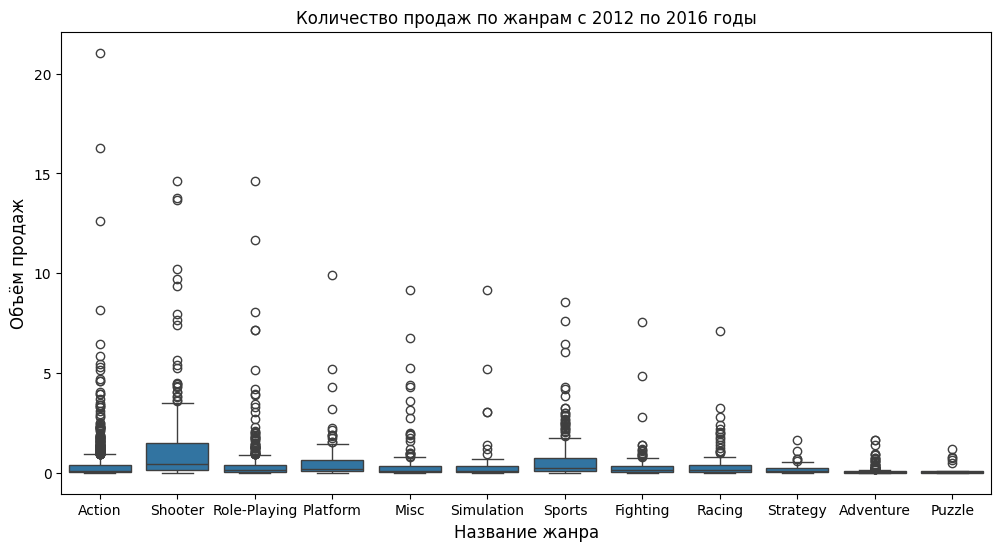

In [82]:
# визуализация диаграммы размаха значений количества продаж по игровым жанрам с 2012 по 2016 годы
plt.figure(figsize=(12,6))
sns.boxplot(data=df_stable, x='genre', y='total_sales');
plt.title('Количество продаж по жанрам с 2012 по 2016 годы', fontsize=12)
plt.xlabel('Название жанра', fontsize=12)
plt.ylabel('Объём продаж', fontsize=12)
plt.show();

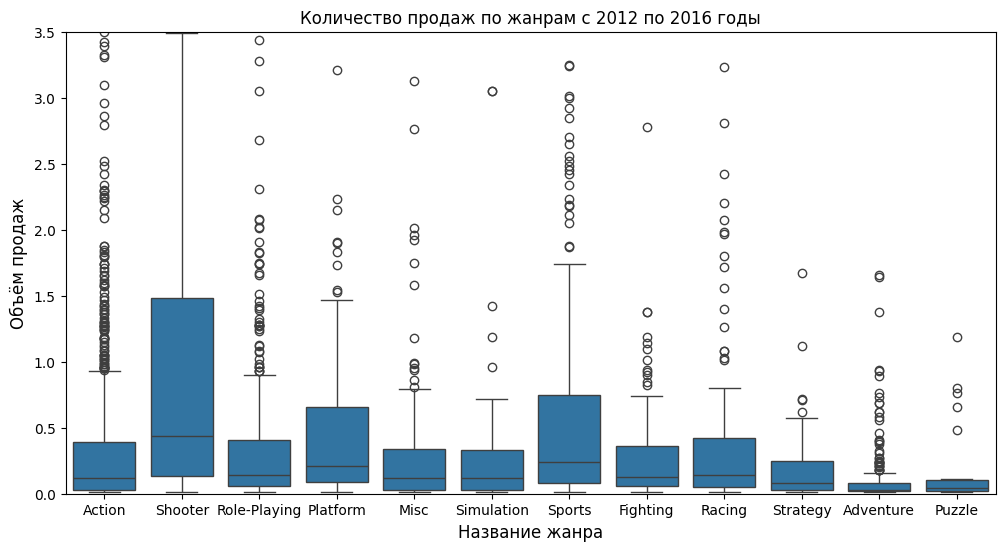

In [83]:
# визуализация диаграммы размаха значений количества продаж по игровым жанрам с 2012 по 2016 годы
# срез по порогу значений для самого многочисленного жанра - шутера - по 3.5 млн. проданных копий 
plt.figure(figsize=(12,6))
plt.ylim([0, 3.5])
sns.boxplot(data=df_stable, x='genre', y='total_sales');
plt.title('Количество продаж по жанрам с 2012 по 2016 годы', fontsize=12)
plt.xlabel('Название жанра', fontsize=12)
plt.ylabel('Объём продаж', fontsize=12)
plt.show();

In [84]:
# игровые жанры: МЕДИАННОЕ КОЛИЧЕСТВО ПРОДАЖ ПО ИГРОВЫМ ЖАНРАМ В РАЗРЕЗЕ КАЖДОЙ ПЛАТФОРМЫ
df_stable.pivot_table(index='genre', columns='platform', values='total_sales', aggfunc='median', \
                      margins=True, margins_name='Всего').fillna(0).sort_values(by='Всего', ascending=False).round(2)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,Всего
genre,,,,,,,,,,,,
Shooter,0.06,0.00,0.22,0.38,0.97,0.00,0.56,0.00,0.12,0.47,1.10,0.44
Sports,0.20,0.06,0.06,0.36,0.52,0.14,0.10,0.38,0.36,0.46,0.34,0.24
Platform,0.21,0.34,0.06,0.25,0.30,0.00,0.08,1.12,0.58,0.11,0.16,0.21
Role-Playing,0.22,4.54,0.16,0.16,0.20,0.09,0.07,0.53,0.41,0.49,0.32,0.14
Racing,0.28,0.00,0.03,0.17,0.23,0.00,0.05,0.01,0.51,0.23,0.18,0.14
Fighting,0.08,0.00,0.05,0.19,0.17,0.02,0.12,0.00,0.19,0.22,0.20,0.13
Всего,0.11,0.05,0.08,0.20,0.20,0.03,0.05,0.18,0.22,0.31,0.22,0.12
Action,0.09,0.04,0.09,0.26,0.16,0.04,0.05,0.15,0.15,0.34,0.15,0.12
Misc,0.11,0.24,0.02,0.08,0.08,0.02,0.06,0.22,0.22,0.27,0.18,0.12


In [85]:
# игровые жанры: СРЕДНЕЕ КОЛИЧЕСТВО ПРОДАЖ ПО ИГРОВЫМ ЖАНРАМ В РАЗРЕЗЕ КАЖДОЙ ПЛАТФОРМЫ
df_stable.pivot_table(index='genre', columns='platform', values='total_sales', aggfunc='mean', \
                      margins=True, margins_name='Всего').fillna(0).sort_values(by='Всего', ascending=False).round(2)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,Всего
genre,,,,,,,,,,,,
Shooter,0.06,0.00,0.35,1.21,2.16,0.00,0.59,0.00,0.60,1.48,1.59,1.30
Platform,1.01,0.34,0.05,0.39,0.64,0.00,0.28,1.12,1.27,0.36,0.19,0.72
Sports,0.35,0.06,0.19,0.72,1.21,0.14,0.15,0.30,0.40,0.83,0.70,0.68
Role-Playing,1.00,4.54,0.51,0.37,0.57,0.10,0.14,0.53,0.41,0.70,0.75,0.52
Всего,0.49,0.40,0.25,0.59,0.80,0.06,0.12,0.65,0.56,0.81,0.65,0.50
Racing,0.28,0.00,0.06,0.55,0.64,0.00,0.25,0.01,2.62,0.40,0.49,0.47
Misc,0.23,0.24,0.15,0.40,0.41,0.04,0.20,1.19,0.57,1.06,0.39,0.44
Simulation,1.00,0.21,0.40,0.16,0.20,0.06,0.02,0.11,0.20,0.19,0.17,0.44
Action,0.29,0.12,0.20,0.68,0.67,0.06,0.11,0.51,0.30,0.80,0.44,0.43


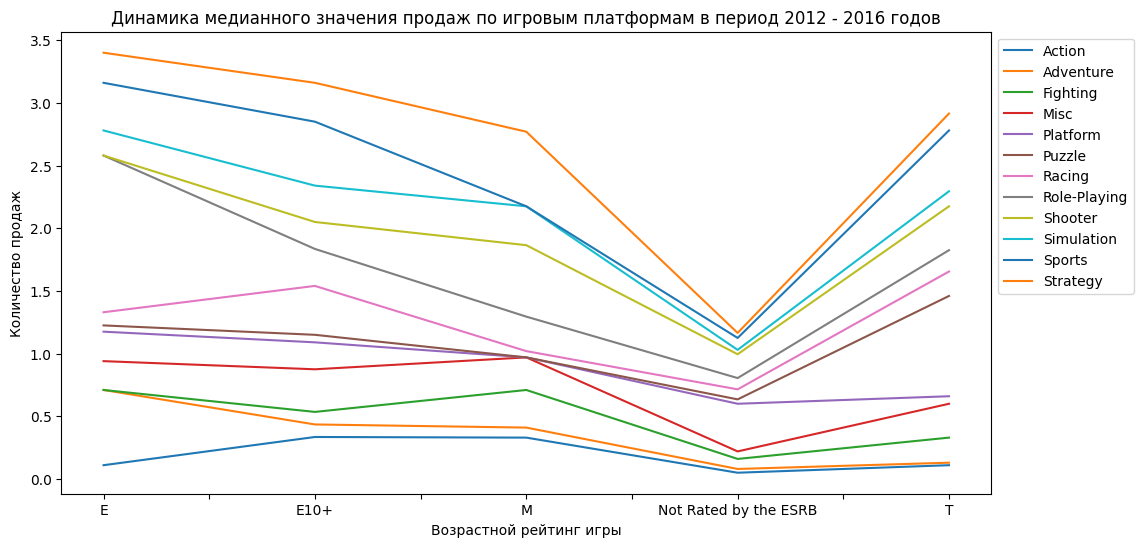

In [86]:
# динамика медианного значения продаж по игровым платформам
fig, ax = plt.subplots(figsize=(12,12))

df_stable.pivot_table(index='genre', columns='rating', 
                  values='total_sales', aggfunc='median').T.plot(kind='line',stacked=True, ax=ax, figsize=(12,6))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Возрастной рейтинг игры')
ax.set_ylabel('Количество продаж')
ax.set_title('Динамика медианного значения продаж по игровым платформам в период 2012 - 2016 годов')

plt.show()

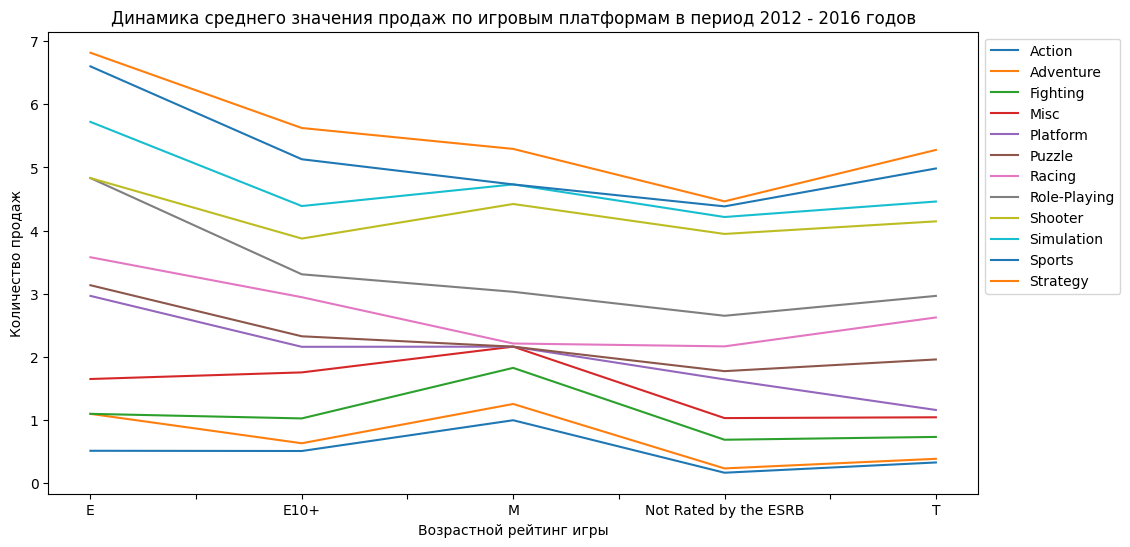

In [87]:
# динамика среднего значения продаж по игровым платформам
fig, ax = plt.subplots(figsize=(12,12))

df_stable.pivot_table(index='genre', columns='rating', 
                  values='total_sales', aggfunc='mean').T.plot(kind='line',stacked=True, ax=ax, figsize=(12,6))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Возрастной рейтинг игры')
ax.set_ylabel('Количество продаж')
ax.set_title('Динамика среднего значения продаж по игровым платформам в период 2012 - 2016 годов')

plt.show()

В соответствии с заданием нам поставили задачу изучить прибыльность жанров. Объективно, мы не располагаем информацией о себестоимости продаваемой игрового ПО, в наличии только информация о количестве миллионов проданных копий игрового ПО. Следовательно, мы не можем выделить самые прибыльные жанры. Однако, на основании сводной таблицы по жанрам и их числовым характеристикам мы можем ответить на ключевые вопросы.

|№ п/п|Наименование игрового жанра|Количество выпущенных игр, ед. всего|Из них количество хитов продаж, ед.|Число продаж, млн.копий|Число продаж в расчёте на единицу игры|Среднее количество продаж|Медианное количество продаж|Порог значений выбросов, млн.копий|Доля хитов продаж, %|
|--|:--------------|:---|:--|:-----|:---|:---|:---|:---|:----|
|1.|`Action`       |1031|114|441.12|0.42|0.12|0.42|0.93|11.05|
|2.|`Adventure`    |302 |37 |29.43 |0.09|0.03|0.09|0.16|12.25|
|3.|`Fighting`     |109 |14 |44.48 |0.40|0.13|0.41|0.8 |12.8 |
|4.|`Misc`         |192 |21 |85.04 |0.44|0.12|0.44|0.79|10.9 |
|5.|`Platform`     |85  |12 |61.01 |0.71|0.21|0.72|1.51|14.12|
|6.|`Puzzle`       |28  |5  |4.89  |0.17|0.04|0.17|0.22|17.85|
|7.|`Racing`       |115 |17 |53.49 |0.46|0.14|0.46|0.97|14.78|
|8.|`Role-Playing` |370 |52 |192.8 |0.52|0.14|0.52|0.92|14.05|
|9.|`Shooter`      |235 |24 |304.73|1.29|0.44|1.29|3.49|10.21|
|10.|`Simulation`  |80  |7  |35.12 |0.43|0.12|0.44|0.77|8.75 |
|11.|`Sports`      |267 |29 |181.06|0.67|0.24|0.68|1.74|10.86|
|12.|`Strategy`    |71  |5  |13.34 |0.18|0.08|0.19|0.58|7.04 |

Самое большое количество выпущенных игр за период с 2012 по 2016 годы — в жанре `Action`, всего 1031 игра.
Самое маленькое количество выпущенных игр за период с 2012 по 2016 годы — в жанре `Puzzle`, всего 28 игр.

Самое высокое число продаж игр за период с 2012 по 2016 годы — в жанрах `Action` (441.12 млн.копий), `Shooter` (304.73 млн.копий). При этом **истинное первое место в этой "номинации" на самом деле принадлежит играм в жанре `Shooter`**: здесь самое высокое и среднее количество продаж (0.44 млн. копий) и медианное количество продаж (1.29 млн. копий). Число продаж на единицу игры в этом жанре также очень высокое на фоне остальных значений и равно 1.29. У игр в жанре `Action` этот показатель равен только 0.42.

Самое низкое число продаж игр за период с 2012 по 2016 годы — в жанре `Puzzle` (4.89 млн.копий).

**Вывод:**

Исследовательский анализ данных поставил перед нами ряд вопросов. Так, нами была рассчитана и изучена **динамика рынка** развлекательного игрового ПО за период с 1980 по 2016 годы включительно. Полученные данные и их визуализация с помощью диаграммы `barplot` явно указывают на три хронологических периода с характерными чертами: 1) 1994 – 2001, развитие рынка игрового ПО, 2) 2002 – 2011, становление рынка игрового ПО и его лавинообразный рост, 3)  2012 – 2016, стабилизация рынка и ежегодного сохранение объёмов выпускаемой продукции. Поскольку, компьютерная игровая индустрия за весь период своего существования претерпела очень много трансформаций и адаптаций к требованиям своего времени, полагаем, что для дальнейшего исследования и разработки рекламной кампании на условный 2017 год самым корректным решением будет рассмотрение периода стабильного существования рынка игрового развлекательного ПО с 2012 по 2016 годы включительно.

Развитие развлекательного игрового ПО неотъемлемо связано с технологическим оборудованием, на котором будет реализована игровая задача. Нами были изучены сроки появления и убывания всех представленных в датафрейме 31 игровых платформ, установлены пиковые значения по количеству миллионов копий проданных игр для каждой платформы. Подготовлены расчёты для столбчатой диаграмме `barplot`, где из общего количества игровых платформ значительно выделяются лидеры по сумме продаж следующие платформы: `PS`, `PS2`, `PS3`, `DS`, `Wii`, `X360`, где продажи превышали 100 млн. копий и в случае с `X360` - превышали и 600 млн. копий. Поистине фантастические достижения. Чтобы ответить на вопрос о характерном сроке длительности существования той или иной платформы, мы подготовили сводную таблицу с данными по платформам, году релиза и суммой выручки. На основании этой сводной таблицы был создан обширный график с кривыми динамики развития каждой платформы в ретроспективе. Полученные значения движутся синхронно с основными тенденциями развития всемирного и регионального рынка игрового ПО. **Средний период длительности существования игровой платформы не превышает 10 лет,** однако, на рынке присутствуют ветераны-долгожители `PC` и `DS`, они радуют поклонников порядка 30 лет. Есть группа из 11 игровых консолей сроком существования от 9 до 13 лет, в эту же группу входят и самые прибыльные платформы. Это хорошо известные игровые платформы: `Wii`, `PS2`, `PS3`, `PSP`, `X360`, `GB`, `NES`, `PS`, `DC`, `SNES`, `2600`. Их длительность и коммерческая успешность пребывания на рынке игрового ПО сопоставимы, а подчас и превосходят достижения ветеранов отрасли. По совокупности длительности пребывания, ассортимента игровой продукции и количества проданных копий, именно эти 11 консолей являются своего рода золотой серединой. В силу разных причин целый ряд компьютерных игровых платформ, а таких в датафрейме большинство - их 13 наименований, не смогли на длительный срок удержать свою аудиторию. В худшем случае они были в продаже в течение года, в лучшем - оставались на прилавках от 6 до 8 лет (такие, как `XB`, `GBA`, `GC` и `N64`).
Суммируя полученные ранее выводы, для дальнейшего исследования нами было принято решение об установлении в качестве **актуального периода с 2012 года по 2016 год включительно.** Методом `query` был получен соответствующий срез данных в виде массива ` df_stable ` размером 2885 строк в разрезе 12 признаков.

В контексте «стабилизированного» актуального массива данных нами была изучена динамика продаж игрового развлекательного ПО в разрезе 10 платформ, присутствующих на рынке в указанный временной период.  Установлены лидеры по количеству проданных копий игровой продукции: стационарные игровые консоли `PS3` и `PS4` семейства PlayStation от Sony, при этом учитывая длительность жизненного цикла игровой платформы в 10 лет, реальным **лидером по продажам является `PS4`**, а период пребывания на рынке `PS3` подходит к концу. Это подтверждается реальными историческими данными: официальная поддержка `PS3` прекращена в 2017 году, а `PS4` только в 2021 году. 

**Реальный рост показателей по продажам** демонстрируют карманная игровая консоль `3DS` (2011-2020) серии Nintendo DS и стационарная игровая консоль `XOne` (2013-2020) семейства Xbox от Microsoft, карманная игровая консоль `PSV` семейства PlayStation от Sony (жизненный цикл 2011 - 2019). При этом стационарная игровая консоль `X360` (жизненный цикл 2005 - 2016) семейства X360 от Microsoft завершает свой срок существования, и говорить о росте показателей здесь будет неуместно.

Падение показателей продаж в контексте реалий стоит воспринимать и понимать как прекращение выпуска официальных лицензионных игр на той или иной платформе. В разрезе актуального датафрейма это карманная игровая консоль `PSP` семейства PlayStation от Sony (жизненный цикл 2004 - 2015), карманная игровая консоль `DS` от ветеранов-долгожителей Nintendo (жизненный цикл 1985 - 2013), игровая приставка `Wii` тоже от Nintendo (жизненный цикл 2006 - 2016), а также семейство стационарных игровых консолей `PC`, выпущенное NEC в Японии в 1985 году, существовало до 2016 года. **Реальное падение продаж** характерно для консоли `WiiU` с улучшенными сенсорными характеристиками (жизненный цикл 2012 - 2017).

В целях разработки рекламной кампании на период 2017 года пересечение отрезков жизненных циклов "отмирающих" и "активно развивающихся" игровых приставок помогло нам выделить те **потенциально прибыльные платформы**, которые на момент 2016 года находятся в активной фазе своего развития и потому длительность их пребывания на рынке невелика (от 3 до 5 лет), а вот продажи весьма внушительные (от 53.81 млн. копий до 314.14 млн. копий): это `PS4`, `PS3`, `3DS`, `XOne`, `PSV`. Этот топ-5 платформ был методом среза помещён в переменную `df_stable_top5`. **Глобальные продажи по этим платформам** в период 2012 – 2016 годов были изучены на основании данных диаграммы размаха значений признака `barplot`. Нижний порог значений для всех платформ находится немногим выше нуля на отметке 0.01. По количеству продаж есть явный лидер `PS4`, догоняющие его платформы и отстающие. Верхние значения усов диаграммы `boxplot` всех платформ не превышают порога в 1.5 млн. проданных копий. Внутри "ящика" по каждой платформе медиана расположена примерно на одном уровне около 0.2 млн. копий. Эти "медианные" игры придают условной стабильности и длительности существования платформы. За этой границей у каждой топовой платформы находится целая вереница аномальных выбросов разной величины: буквально от 1.96 до 21.05 млн. проданных копий. Следовательно, каждая топовая платформа целенаправленно формирует стратегию на текущий год: выпуск некоторого количества "проходных" игр, которые абсолютно точно укладываются в усреднённые запросы потребителей, и выпуск одного потенциального бестселлера в жанре шутер / экшен с интересным, захватывающим сюжетом, хорошей графикой и высоким возрастным рейтингом.

На примере одной самой популярной за период 2012 – 2016 гг. платформы `PS4` мы изучили меру взаимосвязи оценок профессиональных критиков и игроков-любителей на общий уровень продаж. Разброс оценок критиков и пользователей по этой платформе выглядит достаточно сбалансированным: медианные значения масштабированных оценок (10:1) находятся на отметке от 7 до 7.5.  На этой платформе случались и провальные игры с одинаково низкими оценками, там и признанные хиты с оценками до 9 – 10 баллов. Взаимосвязь признаков в динамике отображает график `regplot`: мы отобразили умеренный положительный коэффициент корреляции оценок профессиональных критиков и его линейную положительную направленность, одновременно с этим, оценка пользователей как таковая находится около нуля, и если понимать буквально, то от мнения пользователя количество продаж игрового контента для платформы PS4 не зависит. 

Последовательно построенные диаграммы рассеяния с линией регрессии, показывающей тенденцию в данных, демонстрируют наличие сильной линейной взаимосвязи количества продаж игрового контента от оценки профессиональных критиков, но не от мнения конечного пользователя. **Коэффициент корреляции между оценкой критиков является умеренным и линейным положительным для всех видов игровых платформ**. Следовательно, при росте одной величины (оценки профессионального критика) мы гарантированно получим рост величины количества проданных копий развлекательного игрового ПО.

Жанровое разнообразие игрового развлекательного ПО весьма и весьма обширно. Лидером является `Shooter`. Здесь высокие прибыли в размере 441.12 млн. проданных копий и самая многочисленный игровой ассортимент: 1031 игра этого жанра вышла с 2012 по 2016 годы, это очень серьёзный результат. Второй результат у игр жанра `Shooter`. За 2012 - 2016 годы разномастные стрелялки разошлись тиражом 304.73 млн.копий.  Почётное третье место делят игры содержательно разных жанров `Role-Playing` и `Sports`, при этом `Role-Playing` были проданы в общем количестве 192.80 млн.копий и имеют жётский возрастной ценз, а `Sports` в большинстве своём были интересны для 181.06 млн. покупателей. Суммарно все остальные игровые жанры (`Misc`, `Platform`, `Racing`, `Fighting`, `Simulation`, `Adventure`, `Strategy`, `Puzzle`) за указанный период были проданы в количестве 326.21 млн.копий, самые низкие продажи зафиксированы по игровому жанру `Puzzle` в количестве 4.89 млн. копий.

Самое большое количество выпущенных игр за период с 2012 по 2016 годы — в жанре `Action`, всего 1031 игра.
Самое маленькое количество выпущенных игр за период с 2012 по 2016 годы — в жанре `Puzzle`, всего 28 игр.

Самое высокое число продаж игр за период с 2012 по 2016 годы — в жанрах `Action` (441.12 млн.копий), `Shooter` (304.73 млн.копий). При этом **истинное первое место в этой "номинации" на самом деле принадлежит играм в жанре `Shooter`**: здесь самое высокое и среднее количество продаж (0.44 млн. копий) и медианное количество продаж (1.29 млн. копий). Число продаж на единицу игры в этом жанре также очень высокое на фоне остальных значений и равно 1.29. У игр в жанре `Action` этот показатель равен только 0.42.

Самое низкое число продаж игр за период с 2012 по 2016 годы — в жанре `Puzzle` (4.89 млн.копий).

<a id=4></a>
### Шаг 4. Формирование портрета пользователя каждого региона (NA, EU, JP)

<a id=4.1.></a>
#### 4.1. Самые популярные платформы (топ-5). Различия в долях продаж

С помощью параметра `normalize` мы можем подсчитать, сколько процентов от общего числа составляет каждая платформа в соответствующем регионе. Умножение полученных данных с помощью метода `mul` на 100 позволит получить нам сразу процентное соотношение:

In [88]:
# популярные игровые платформы в Северной Америке, топ-5
df_NA = pd.crosstab(index=df_stable['platform'], columns=df_stable['year_of_release'], 
            values=df_stable['na_sales'], aggfunc='sum', normalize=True, margins=True, margins_name='Всего').mul(100)
df_NA = df_NA.round(2).sort_values(by='Всего', ascending = False)[1:6].drop(columns='Всего')
df_NA

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
X360,9.88,9.03,3.43,1.25,0.12
PS4,0.00,1.71,5.88,7.17,3.64
PS3,6.75,7.01,2.77,0.84,0.11
XOne,0.00,2.01,5.24,6.10,2.41
3DS,2.90,2.63,2.09,1.04,0.70


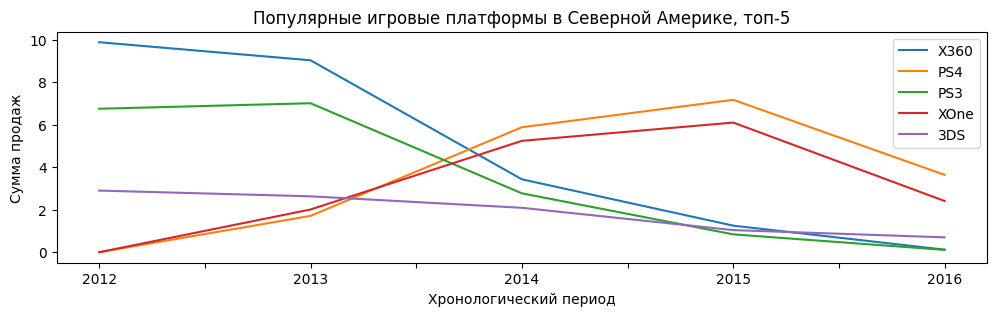

In [89]:
# популярные игровые платформы в Северной Америке, топ-5
fig, ax = plt.subplots(figsize=(12,3))

df_NA.T.plot(kind='line', ax=ax, figsize=(12,3))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Хронологический период')
ax.set_ylabel('Сумма продаж')
ax.set_title('Популярные игровые платформы в Северной Америке, топ-5')

plt.show()

In [90]:
# популярные игровые платформы в Европе, топ-5
df_EU = pd.crosstab(index=df_stable['platform'], columns=df_stable['year_of_release'], 
            values=df_stable['eu_sales'], aggfunc='sum', normalize=True, margins=True, margins_name='Всего').mul(100)
df_EU = df_EU.round(2).sort_values(by='Всего', ascending=False)[1:6].drop(columns='Всего')
df_EU

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
PS4,0.00,2.18,9.18,10.21,6.27
PS3,7.70,8.34,3.60,1.19,0.25
X360,6.31,5.33,2.23,0.69,0.14
XOne,0.00,1.05,3.58,3.64,1.90
3DS,2.30,2.93,1.72,1.00,0.46


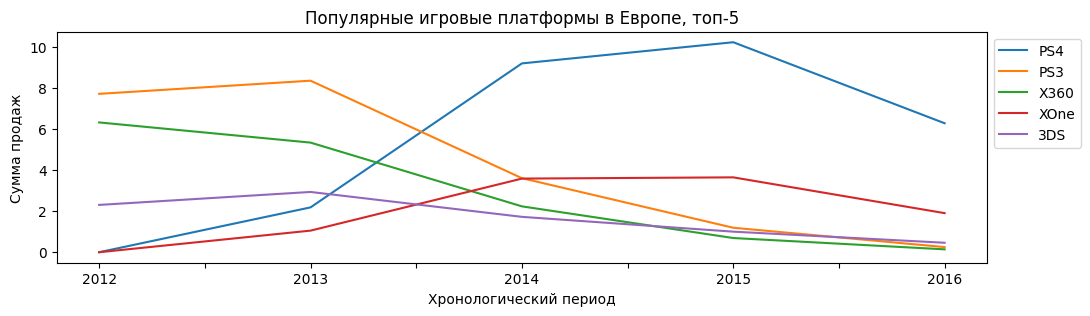

In [91]:
# популярные игровые платформы в Европе, топ-5
fig, ax = plt.subplots(figsize=(12,3))

df_EU.T.plot(kind='line', ax=ax, figsize=(12,3))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Хронологический период')
ax.set_ylabel('Сумма продаж')
ax.set_title('Популярные игровые платформы в Европе, топ-5')

plt.show()

In [92]:
# # популярные игровые платформы в Японии, топ-5
df_JP = pd.crosstab(index=df_stable['platform'], columns=df_stable['year_of_release'], 
            values=df_stable['jp_sales'], aggfunc='sum', normalize=True, margins=True, margins_name='Всего').mul(100)
df_JP = df_JP.round(2).sort_values(by='Всего', ascending=False)[1:6].drop(columns='Всего')
df_JP

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,10.37,12.24,10.74,8.06,4.17
PS3,6.20,6.30,3.25,1.91,0.68
PSV,1.27,2.10,3.18,2.52,1.85
PS4,0.00,0.49,1.54,3.28,2.98
WiiU,1.11,1.85,1.66,1.79,0.35


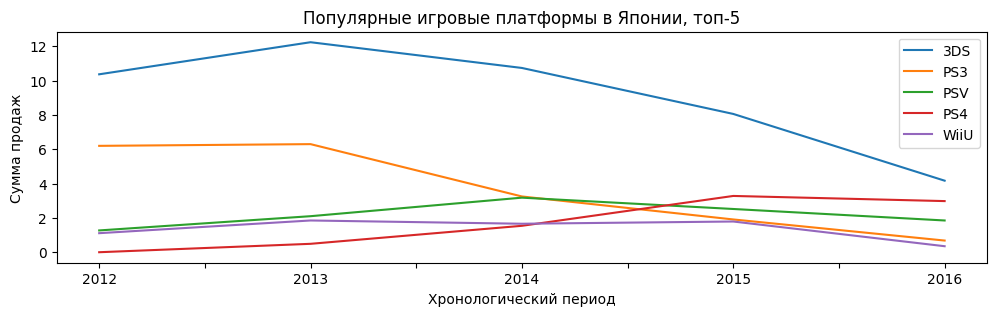

In [93]:
# популярные игровые платформы в Японии, топ-5
fig, ax = plt.subplots(figsize=(12,3))

df_JP.T.plot(kind='line', ax=ax, figsize=(12,3))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Хронологический период')
ax.set_ylabel('Сумма продаж')
ax.set_title('Популярные игровые платформы в Японии, топ-5')

plt.show()

**Вывод:** на графиках мы видим переломный момент убывания старых платформ и роста активности продаж новичков на рынке игрового ПО. Окончательная смена одного поколения игровых консолей другим произошла в 2013 году, и, в связи с поздним релизом в Японии, на этом региональном рынке "смена власти" произошла в начале 2014 года. 

Самыми популярными игровыми платформами в Северной Америке на протяжении актуального периода исследования являются `PS4` и `XOne`. Они уверенно занимают первое (3.64%) и второе(2.41%) место. Стоит отметить, что эти платформы проживают середину своего жизненного цикла и их доля присутствия на рынке в ближайшие годы пойдёт на убыль. Уверенное третье место занимает платформа `3DS`, её доля составляет порядка 0.7%. Замыкают пятёрку лидеров платформы `X360` и `PS3`. Обе эти платформы отжили свой срок и со дня на день производитель может объявить о завершении лицензионной поддержки.

Первое место на европейском рынке уверенно занимает `PS4`, её доля присутствия составляет 6.27%, пиковое значение 10.21% минуло в 2015 году, что позволяет допустить позитивный прогноз для этой приставки на следующие пару лет. На огромной дистанции от лидера пребывает `XOne` (1.9%), за последние два года её продажи идут стабильно на уровне 3.5% - 3.6%, сохраняется позитивный прогноз. `3DS`(0.46%), `PS3` (0.25%), `X360` (0.14%) едва ли могут состязаться с лидерами европейского рынка, и занимают последние строки рейтинга топ-5 для этого региона.

Японский рынок является довольно своеобразным, и в нём популярность домашних стационарных консолей с каждым годом падает. В стране восходящего Солнца гораздо больше ценятся портативные устройства и смартфоны, позволяющие играть «на ходу». Именно поэтому в Японии популярны карманные платформы от Nintendo `3DS` и `WiiU`, они занимают первую (4.17%) и последнюю (0.35%) строки рейтинга топ-5. `PS4` в качестве домашней игровой консоли отечественного производства высоко ценят японцы, доля присутствия этой платформы на рынке составляет 2.98%. Следом за ней идёт более ранняя версия также домашней стационарной игровой консоли `PS3` (0.68%). Портатитвная `PSV` занимает золотую середину топ-5, её доля на родном японском рынке составляет 1.85%. `XOne` потеряла своего японского покупателя, здесь могли сказаться и характеристики, которые только ухудшили положение `XOne` на японском рынке: требование постоянного подключения приставки `XOne` к сети, региональная блокировка и привязка игр к аккаунту. В век нарастающей мобильности и подвижности такие меры наверняка вызвали негодование пользователей, и, следовательно, сознательный отказ от использования приставки.

<a id=4.2.></a>
#### 4.2. Самые популярные жанры (топ-5)

In [94]:
# популярные игровые жанры в Северной Америке, топ-5
top5_genre_NA = df_stable.pivot_table(index='genre', \
columns='year_of_release', values='na_sales', \
aggfunc='sum', margins=True, margins_name='Всего').sort_values(by='Всего', ascending=False)[1:6].drop(columns='Всего')
top5_genre_NA

year_of_release,2012,2013,2014,2015,2016
genre,,,,,
Action,51.79,53.52,38.85,24.39,9.29
Shooter,35.03,30.72,30.84,31.94,16.24
Sports,16.26,19.14,19.82,18.77,7.54
Role-Playing,17.60,12.93,13.65,13.93,5.89
Misc,10.70,12.44,9.47,4.82,0.76


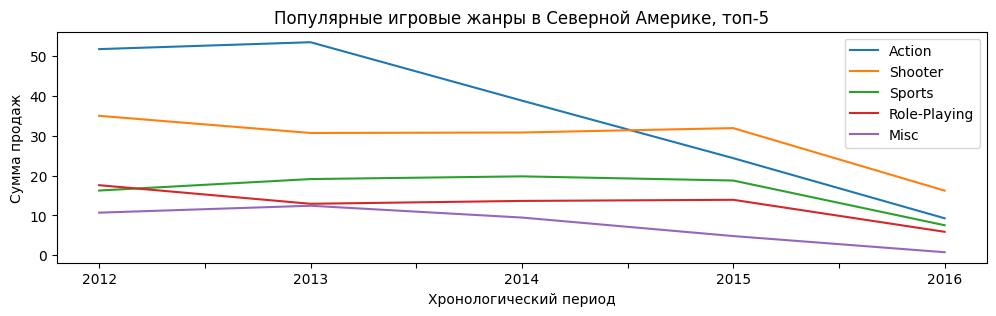

In [95]:
# популярные игровые жанры в Северной Америке, топ-5
fig, ax = plt.subplots(figsize=(12,3))

top5_genre_NA.T.plot(kind='line', ax=ax, figsize=(12,3))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Хронологический период')
ax.set_ylabel('Сумма продаж')
ax.set_title('Популярные игровые жанры в Северной Америке, топ-5')

plt.show()

In [96]:
# популярные игровые жанры в Европе, топ-5
top5_genre_EU = df_stable.pivot_table(index='genre', \
columns='year_of_release', values='eu_sales', \
aggfunc='sum', margins=True, margins_name='Всего').sort_values(by='Всего', ascending=False)[1:6].drop(columns='Всего')
top5_genre_EU

year_of_release,2012,2013,2014,2015,2016
genre,,,,,
Action,41.21,43.45,39.86,24.14,10.68
Shooter,25.61,22.34,25.24,24.38,15.90
Sports,8.56,14.79,17.91,15.81,12.01
Role-Playing,11.56,8.80,10.96,12.93,4.28
Racing,7.10,6.06,7.61,4.75,1.77


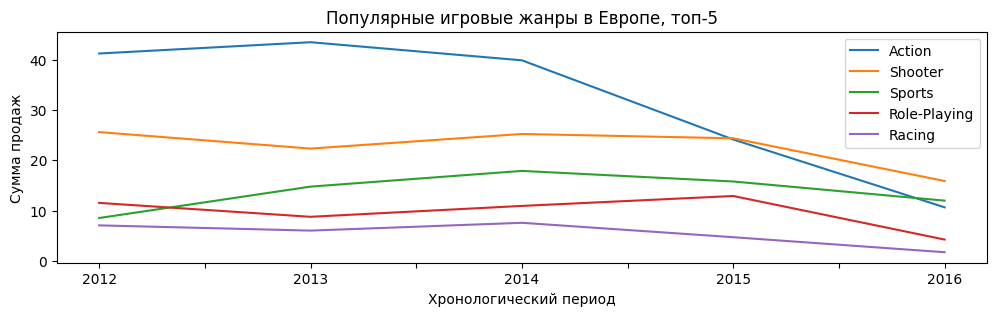

In [97]:
# популярные игровые жанры в Европе, топ-5
fig, ax = plt.subplots(figsize=(12,3))

top5_genre_EU.T.plot(kind='line', ax=ax, figsize=(12,3))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Хронологический период')
ax.set_ylabel('Сумма продаж')
ax.set_title('Популярные игровые жанры в Европе, топ-5')

plt.show()

In [98]:
# популярные игровые жанры в Японии, топ-5
top5_genre_JP = df_stable.pivot_table(index='genre', \
columns='year_of_release', values='jp_sales', \
aggfunc='sum', margins=True, margins_name='Всего').sort_values(by='Всего', ascending=False)[1:6].drop(columns='Всего')
top5_genre_JP

year_of_release,2012,2013,2014,2015,2016
genre,,,,,
Role-Playing,14.40,19.88,17.75,6.80,6.61
Action,12.31,10.91,6.53,15.98,7.07
Misc,3.66,3.59,2.42,2.15,1.04
Simulation,5.89,2.21,0.38,1.60,0.33
Fighting,1.79,1.28,4.83,0.79,0.75


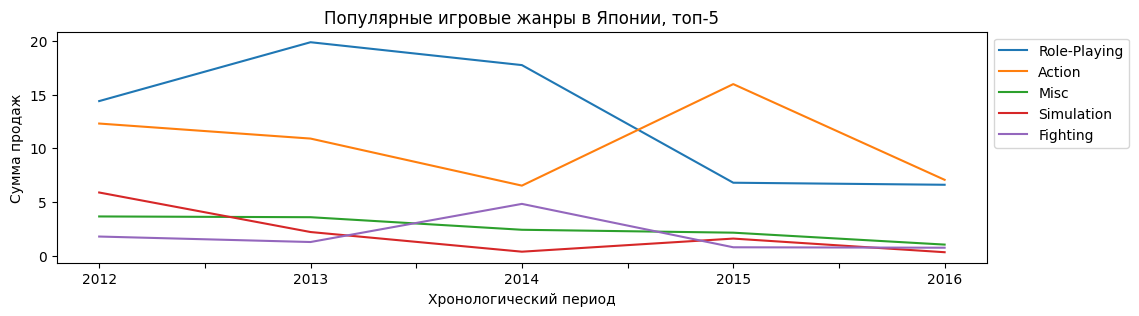

In [99]:
# популярные игровые жанры в Японии, топ-5
fig, ax = plt.subplots(figsize=(12,3))

top5_genre_JP.T.plot(kind='line', ax=ax, figsize=(12,3))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Хронологический период')
ax.set_ylabel('Сумма продаж')
ax.set_title('Популярные игровые жанры в Японии, топ-5')

plt.show()

**Вывод:** историческая культурная и языковая общность Северной Америки и Европы позволяет нам объяснить тождественность топовых игровых жанров на этих рынках: в лидерах на протяжении всего актуального периода мы видим неизменные шутеры и экшены, пиковые значения популярности приходятся на 2013 год. Именно в этом году выходят культовые Diablo III, Watch Dogs, Wolfstein, Far Cry 4, Assasin’s Creed. В Северной Америке оба этих жанра пользуются огромной популярностью у пользователей. в общем и целом европейский рынок более ровный, динамика показателей отличается плавностью. В конце 2015 года мы видим равномерное присутствие на игровом европейском рынке  шутеров, экшенов и спортивных игр. Японский рынок сосредоточен вокруг экшенов и RPG, они сменяют друг друга в серьёзной борьбе за интерес пользователя. Остальные игровые жанры в Японии очень мало представлены и далеко дистанцированы от лидеров по уровню количества продаж.

<a id=4.3.></a>
#### 4.3. Влияние рейтинга ESRB на продажи в каждом регионе

In [100]:
# рейтинги ERSB и продажи игрового ПО в Северной Америке 
rating_NA = df_stable.pivot_table(index='rating', \
columns='year_of_release', values='na_sales', \
aggfunc='sum', margins=True, margins_name='Всего').sort_values(by='Всего', ascending=False)[1:].drop(columns='Всего')
rating_NA

year_of_release,2012,2013,2014,2015,2016
rating,,,,,
M,66.36,68.79,49.39,31.36,15.67
E,35.32,28.31,24.15,18.62,7.97
Not Rated by the ESRB,13.89,24.70,27.28,28.91,8.53
E10+,21.46,21.01,15.36,14.06,3.81
T,16.23,10.84,16.09,13.91,8.95


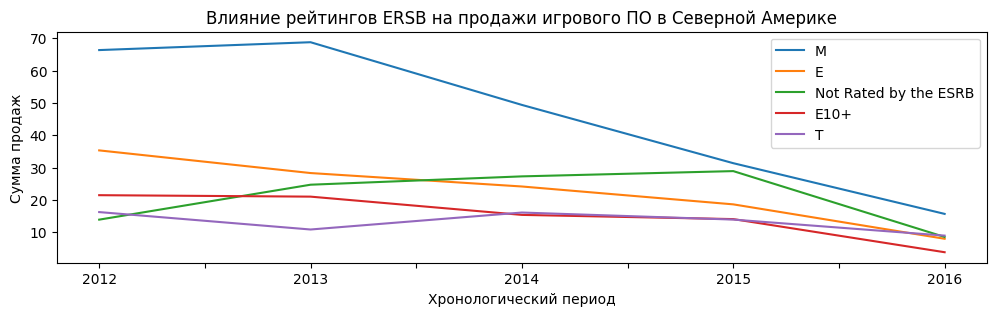

In [101]:
# визуализация влияния рейтингов ERSB на продажи игрового ПО в Северной Америке
fig, ax = plt.subplots(figsize=(12,3))

rating_NA.T.plot(kind='line', ax=ax, figsize=(12,3))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Хронологический период')
ax.set_ylabel('Сумма продаж')
ax.set_title('Влияние рейтингов ERSB на продажи игрового ПО в Северной Америке')

plt.show()

In [102]:
# рейтинги ERSB и продажи игрового ПО в Европе
rating_EU = df_stable.pivot_table(index='rating', \
columns='year_of_release', values='eu_sales', \
aggfunc='sum', margins=True, margins_name='Всего').sort_values(by='Всего', ascending=False)[1:].drop(columns='Всего')
rating_EU

year_of_release,2012,2013,2014,2015,2016
rating,,,,,
M,48.64,51.88,47.90,29.00,16.54
E,29.66,25.30,23.23,21.22,13.61
Not Rated by the ESRB,12.59,19.96,23.24,28.24,7.47
E10+,12.68,16.53,14.62,7.73,3.81
T,11.01,7.88,13.75,10.53,9.79


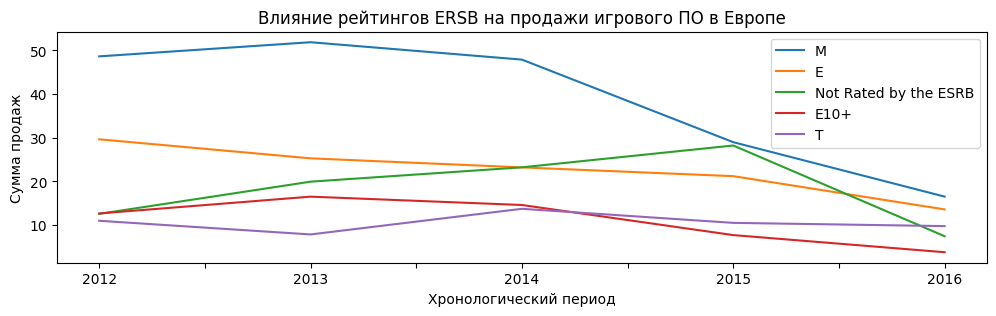

In [103]:
# визуализация влияния рейтингов ERSB на продажи игрового ПО в Европе
fig, ax = plt.subplots(figsize=(12,3))

rating_EU.T.plot(kind='line', ax=ax, figsize=(12,3))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Хронологический период')
ax.set_ylabel('Сумма продаж')
ax.set_title('Влияние рейтингов ERSB на продажи игрового ПО в Европе')

plt.show()

In [104]:
# рейтинги ERSB и продажи игрового ПО в Японии
rating_JP = df_stable.pivot_table(index='rating', \
columns='year_of_release', values='jp_sales', \
aggfunc='sum', margins=True, margins_name='Всего').sort_values(by='Всего', ascending=False)[1:].drop(columns='Всего')
rating_JP

year_of_release,2012,2013,2014,2015,2016
rating,,,,,
Not Rated by the ESRB,23.79,28.15,24.01,18.57,14.32
E,13.19,6.20,3.69,4.18,1.07
T,5.43,5.81,7.08,5.43,2.27
M,7.09,6.10,3.72,3.09,1.20
E10+,2.30,1.43,1.19,2.82,0.45


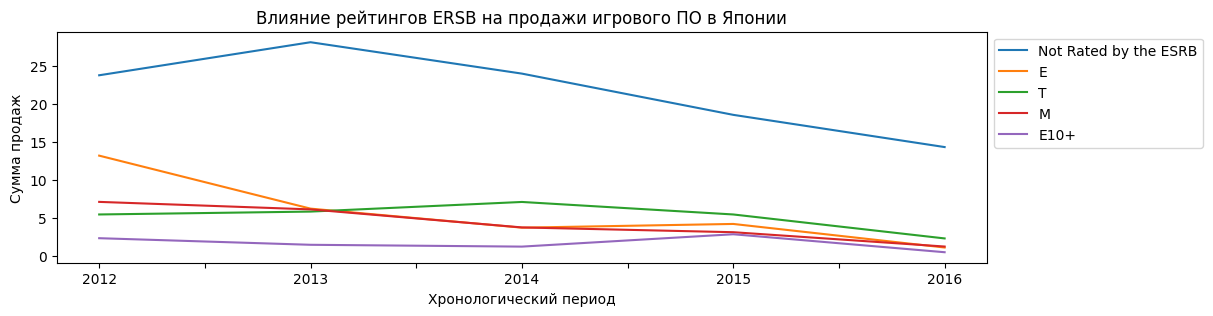

In [105]:
# визуализация влияния рейтингов ERSB на продажи игрового ПО в Японии
fig, ax = plt.subplots(figsize=(12,3))

rating_JP.T.plot(kind='line', ax=ax, figsize=(12,3))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Хронологический период')
ax.set_ylabel('Сумма продаж')
ax.set_title('Влияние рейтингов ERSB на продажи игрового ПО в Японии')

plt.show()

In [106]:
# сводная таблица по жанрам, году релиза и продажам
rat_df1 = df_stable.pivot_table(index='genre', columns='year_of_release', values='total_sales', aggfunc='sum').fillna(0)

# сводная таблица по жанрам, рейтингу и продажам
rat_df2 = df_stable.pivot_table(index='genre', columns='rating', values='total_sales', aggfunc='sum').fillna(0)
# меняем порядок столбцов в соответствии с возрастной градацией от жёсткого рейтинга до общедоступного
rat_df2 = rat_df2[['Not Rated by the ESRB', 'M', 'T', 'E10+', 'E']]

# собираем и выводим объёдинённую сводную таблицу по игровым жанрам и их возрастным рейтингам
rat_df3 = rat_df1.join(rat_df2)
rat_df3

,2012,2013,2014,2015,2016,Not Rated by the ESRB,M,T,E10+,E
genre,,,,,,,,,,
Action,119.25,122.51,97.23,72.02,30.11,78.28,214.13,45.16,66.15,37.40
Adventure,5.79,6.09,5.57,8.16,3.82,15.96,7.99,0.81,2.33,2.34
Fighting,9.18,7.09,15.85,7.90,4.47,17.26,6.29,19.76,1.18,0.00
Misc,22.22,25.27,23.38,11.57,2.60,36.70,1.68,5.91,29.16,11.59
Platform,18.37,24.54,8.81,6.05,3.23,7.35,0.00,0.58,16.21,36.86
Puzzle,1.72,0.96,1.49,0.71,0.01,1.57,0.00,0.80,1.00,1.52
Racing,13.61,12.37,16.66,8.07,2.79,10.60,0.10,6.65,8.67,27.48
Role-Playing,46.91,44.45,45.62,37.64,18.18,95.47,57.33,29.38,4.35,6.27
Shooter,71.75,62.04,65.21,67.51,38.22,44.07,219.72,31.88,9.06,0.00


**Выводы:** в результате последовательного изучения рейтингов видеоигр и динамики продаж игрового ПО нами установлено наличие явной взаимосвязи между этими признаками.

Так, в Северной Америке (США, Канада, Мексика) рынок игрового ПО прочно занят видеоиграми рейтинга `M`, сюжет которых подразумевает детальное описание или визуализацию сцен насилия, нецензурную речь, демонстрацию оружия и прочие «радости» взрослой жизни. Им в популярности совсем немного уступают подростковая ниша видеоигр с рейтингом `Т`. О детской аудитории производители думают в самую последнюю очередь, и внутренний ребёнок, требующий кровожадных развлечений, выходит на первый план.

За весь актуальный период европейский рынок только единожды попал под влияние американского ажиотажа, и пиковый всплеск интереса к видеоиграм для взрослой аудитории с возрастным маркером `M` возник и пропал у европейцев всего за один год: с 2013 по 2014 гг., динамика этого рейтинга уверенно идёт на убыль к 2016 году. Второе место по популярности занимают игры с рейтингом `E` доступные для широкой аудитории.

Японский рынок развлекательного игрового ПО живёт своей жизнью: RPG рассчитанная своим сюжетом и содержанием на подростков – хит продаж. Хотя японский рынок начинался как семейный – и об этом свидетельствуют данные – он достаточно резко отвернулся от общедоступных сюжетов и переключился на жадную до эмоций и ощущений подростковую аудиторию. Кривая спроса на графике доказывает, что эта стратегия была, есть и остаётся на момент 2016 года самой прибыльной и живучей для именно этого региона.

На графиках всех регионов хорошо заметно, как с 2014 - 2015 годов начинает резко снижаться количество видеоигр без возрастного рейтинга. В Северной Америке ушёл почти год на то, чтобы повсеместно развернуть действие ERSB. Появились проекты Metacritic и его антагонист OpenCritic. Сознательность и законопослушность европейцев вкупе с малыми территориями привели к феноменальным результатам, хотя, и по сей день, доля видеоигр без возрастной маркировки на этом рынке остаётся высокой. Но и эти высокие значения не идут ни в какое сравнение с Японским рынком: более половины (!) видеоигр, присутствующих на японском рынке, не имеют возрастного рейтинга. Кроме потенциальных различий в системе присвоения рейтинга и невозможности корректной трансформации данных, имеется ещё один важный аспект: крупнейшему англоязычному агрегатору OpenCritic пришлось отказаться от размещения на сайте видеоигр для платформ Nintendo 3DS и PlayStation Vita (обе – японские) из-за возникших сложностей в предоставлении разработчиками геймплейных видео и скриншотов. Обе платформы входят в число топовых как в Японии, так и повсеместно, и следовательно, количество игровой продукции, неохваченной зорким оком возрастной рейтинговой системы, для них также очень велико.

**Выводы:** обобщая полученные результаты в 4 разделе проектной работы, мы можем сформировать черты портрета пользователя для следующих регионов:
* **Северная Америка (США, Канада, Мексика).** Любители видеоигр с наибольшей вероятностью имеют игровую платформу `PS4` или `XOne`, самый любимый игровой жанр: `Action`, `Shooter` и `Sports`, в этих играх очень выской возрастной ценз.
* **Европа**. Существует большая вероятность, что у европейского геймера игровая консоль `PS4` или `XOne`, на которой зачастую запускают игры жанра `Action`, `Shooter` и `Sports`. Маркировка возрастного ценза: для взрослой аудитории.
* **Япония** Патриотичные настроения японского общества редко расходятся с делом: у геймеров в руках портативная игровая консоль Nintendo `3DS` или дома подключена `PS4`. Наиболее популярные жанры `Action` и `Role-Playing`, среди оставшихся жанров можно выделить `Shooter`. Японцы предпочитают игры с без рейтинга или с маркировкой `T` для подростков.

[к содержанию](#content) | [шаг 1](#1) | [шаг 2](#2) | [шаг 3](#3) | [шаг 4](#4) | [шаг 5](#5) | [шаг 6](#6)

<a id=5></a>
### 5. Проверка гипотез

<a id=5.1.></a>
#### 5.1. Средние пользовательские рейтинги платформ `XOne` и `PC` одинаковые

In [107]:
# из полного датафрейма `df` выбираем строки с платформами `XOne` и `PC`
platform_rating = df_stable.loc[(df_stable['platform'].isin(['XOne','PC']))]

# сводная таблица пользовательских оценок по каждой из платформ
platform_rating.pivot_table(index='platform', values='user_score')

,user_score
platform,
PC,6.428641
XOne,6.521429


In [108]:
# создадим датафрейм по платформе `XOne`, удаляем пропуски значений в признаке `user_score`
XOne = df_stable.query('platform == "XOne"').user_score.dropna().reset_index(drop=True)

# создадим датафрейм по платформе `PC`, удаляем пропуски значений в признаке `user_score`
PC = df_stable.query('platform == "PC"').user_score.dropna().reset_index(drop=True)

In [109]:
# описательная статистика для пользовательских оценкок платформы `XOne`
XOne.describe().round(2)

count    182.00
mean       6.52
std        1.38
min        1.60
25%        5.80
50%        6.80
75%        7.50
max        9.20
Name: user_score, dtype: float64

In [110]:
# медианная оценка пользователей платформы XOne
XOne.median()

6.8

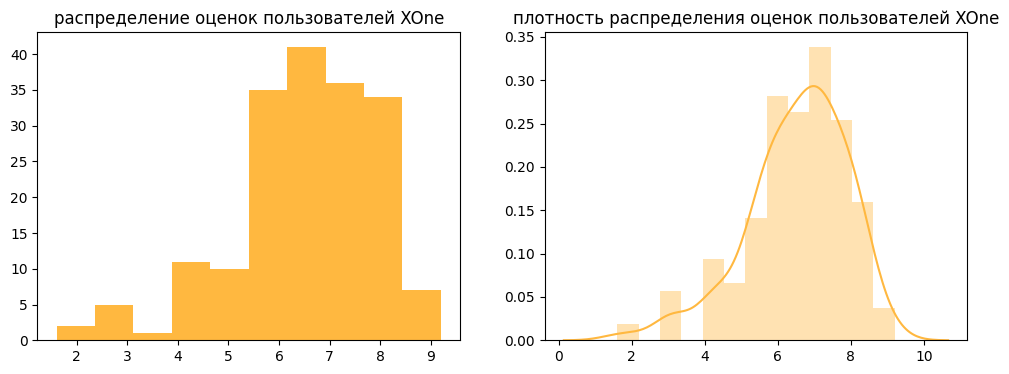

In [111]:
# парные диаграммы для платформы `XOne`
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.title('распределение оценок пользователей XOne')
XOne.hist(figsize=(12,4), grid=False, color='#FFB840').set(ylabel='', xlabel='')

plt.subplot(1,2,2)
plt.title('плотность распределения оценок пользователей XOne')
sns.distplot(XOne, color='#FFB840').set(ylabel='', xlabel='')

plt.show()

In [112]:
# описательная статистика для пользовательских оценкок платформы `PC`
PC.describe().round(2)

count    206.00
mean       6.43
std        1.66
min        1.40
25%        5.50
50%        6.80
75%        7.70
max        9.30
Name: user_score, dtype: float64

In [113]:
# медианная оценка пользователей платформы XOne
PC.median()

6.8

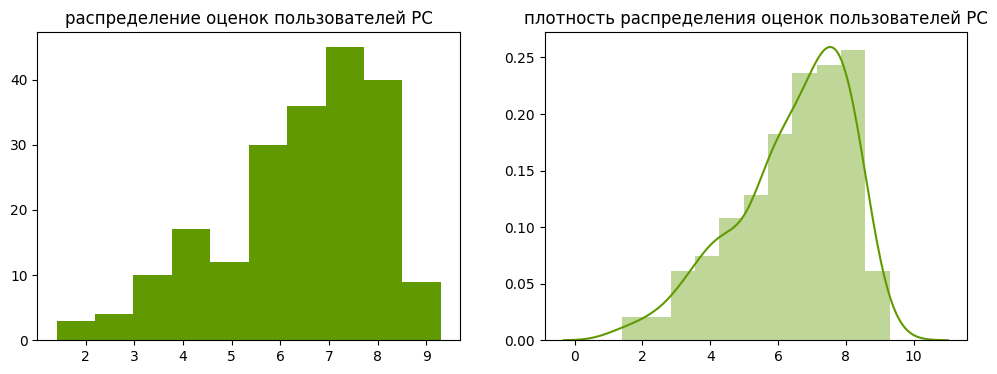

In [114]:
# парные диаграммы для платформы `PC`
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.title('распределение оценок пользователей PC')
PC.hist(figsize=(12,4), grid=False, color='#619A00').set(ylabel='', xlabel='')

plt.subplot(1,2,2)
plt.title('плотность распределения оценок пользователей PC')
sns.distplot(PC, color='#619A00').set(ylabel='', xlabel='')

plt.show()

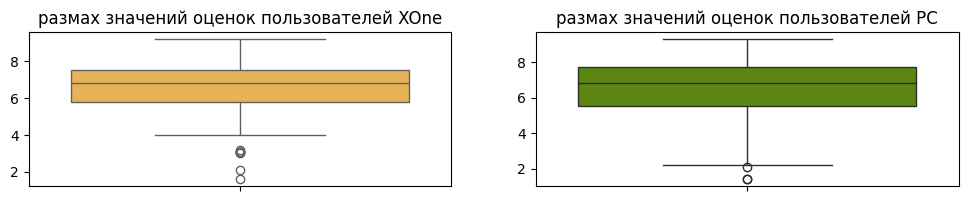

In [115]:
# парные диаграммы для платформы `XOne` и платформы `PC`
plt.figure(figsize=(12,2))

plt.subplot(1,2,1)
plt.title('размах значений оценок пользователей XOne')
sns.boxplot(XOne, color='#FFB840').set(ylabel='', xlabel='')

plt.subplot(1,2,2)
plt.title('размах значений оценок пользователей PC')
sns.boxplot(PC, color='#619A00').set(ylabel='', xlabel='')

plt.show()

На основании полученных выше расчётов мы можем сформировать обобщающие статистические данные по пользовательским оценкам игровых платформ `XOne` и `PC`. Они приведены в таблице ниже.

*Таблица 5. Обобщённые статистические данные по пользовательским оценкам платформы `XOne` и `PC`*

|Наименование платформы|Всего оценок|Минимальная оценка|Средняя оценка|Медианная оценка|Оценка Q3|Максимальная оценка|
|------|:--|:-----|:-----|:-----|:-----|:-----|
|`XOne`|182|1.60|6.52|6.80|7.50|9.20|
|`PC`  |206|1.40|6.43|6.80|7.70|9.30|

Количественная представленность пользовательских оценок по платформам существенно различается. Так, будучи ветераном компьютерной отрасли, `PC` присуствует на рынке с 1985 года и потому количество полученных оценок для этой платформы велико — всего 755 позиций. Платформа `XOne` получила путёвку в жизнь только в 2013 году, количество пользователей, которые оценили её достоинства и недостатки, составило 182 человек.

Минимальные и максимальные значения пользовательских оценок для обеих платформ приблизительно равны и находятся в диапазоне от 1.40 до 1.60 и от 9.20 до 9.30 соответственно. Различия в средних значениях становятся видны в разделах с описательной статистикой по каждой платформе, и эти значения подтверждаются графиками плотности распределения `distplot` и диаграммами размаха значений `boxplot`. Гипотезу "Средние пользовательские рейтинги платформ XOne и PC одинаковые" мы возьмём в качестве основной и предложим ей следующую альтернативу:

$H_{0}: \text{средний пользовательский рейтинг платформы `XOne`} = \text{средний пользовательский рейтинг платформы `PC`}$
$H_{1}: \text{средние пользовательские рейтинги платформ `XOne`} \neq \text{средний пользовательский рейтинг платформы `PC`}$

Установим пороговое значение:
$ \alpha = 0.05$

Чтобы уменьшить неопределённость относительно интересующего нас вопроса, мы можем провести двусторонний тест, поскольку у нас есть необходимость проверить альтернативное существование неравенства, будь оно положительным или отрицательным.

Самый распространенный способ сравнить средние между двумя независимыми группами — использовать t-критерий с двумя выборками. Однако этот тест предполагает, что дисперсии между двумя группами данных равны. Проверим дисперсию по каждой из имеющихся групп данных:

In [116]:
# расчёт дисперсии данных по платформам `XOne` и `PC`
var_XOne = variance(XOne)
var_PC = variance(PC)

print('Дисперсия по платформе XOne:', var_XOne)
print('Дисперсия по платформе PC:', var_PC)

Дисперсия по платформе XOne: 1.9069968429360695
Дисперсия по платформе PC: 2.7704439971584183


Итак, мы установили, что дисперсия между двумя группамми данных по платформам `XOne` и `PC` неодинакова. Следовательно, мы можем вместо t-критерия применить `t-критерий Уэлча`, который является непараметрическим эквивалентом t-теста для двух выборок. Для этого нам необходимо импортировать профильную библиотеку `SciPy` и выбрать из неё функцию `ttest_ind()` для двух независимых генеральных совокупностей данных. Синтаксис данного метода подразумевает наличие параметра `equal_var`, который описывает булевым значением истинность `True` или ложность `False` равенства дисперсии двух генеральных совокупностей. В нашем случае параметр `equal_var` будет ложным, поскольку мы выяснили, что дисперсии двух массивов данных существенно отличаются.

Если `p-value` будет меньше установленного критического уровня статистической значимости, то мы отвергнем нулевую гипотезу о равенстве средних пользовательских рейтингов платформ `XOne` и `PC`. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу. Вычислим значения t-критерий Уэлча:

In [117]:
# критический уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('cтатистика t-теста:', results.statistic)
print('двустороннее p-значение: ', results.pvalue)
print()
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

cтатистика t-теста: 0.5998585993590415
двустороннее p-значение:  0.5489537965134912

Не получилось отвергнуть нулевую гипотезу.


**Вывод:** Полученное p-значение больше установленного критического уровня статистической значимости 0.05, мы не можем отклонить нулевую гипотезу теста и, следовательно, отсутствует статистически значимая разница в средних значениях пользовательских рейтингов платформ `XOne` и `PC`.

<a id=5.2.></a>
#### 5.2. Средние пользовательские рейтинги жанров `Action` и `Sports` разные

In [118]:
# из полного датафрейма `df` выбираем строки с жанрами `Action` и `Sports`
platform_rating_genre = df_stable.loc[(df_stable['genre'].isin(['Action','Sports']))]

# сводная таблица пользовательских оценок по каждому жанру
platform_rating_genre.pivot_table(index='genre', values='user_score')

,user_score
genre,
Action,6.825048
Sports,5.455670


In [119]:
# создадим датафрейм по жанру `Action`, удаляем пропуски значений в признаке `user_score`
Action = df_stable.query('genre == "Action"').user_score.dropna().reset_index(drop=True)

# создадим датафрейм по жанру `Sports`, удаляем пропуски значений в признаке `user_score`
Sports = df_stable.query('genre == "Sports"').user_score.dropna().reset_index(drop=True)

In [120]:
# описательная статистика для пользовательских оценкок жанра `Action`
Action.describe().round(2)

count    523.00
mean       6.83
std        1.37
min        1.60
25%        6.25
50%        7.10
75%        7.80
max        9.10
Name: user_score, dtype: float64

In [121]:
# медианная оценка пользователей анра `Action`
Action.median()

7.1

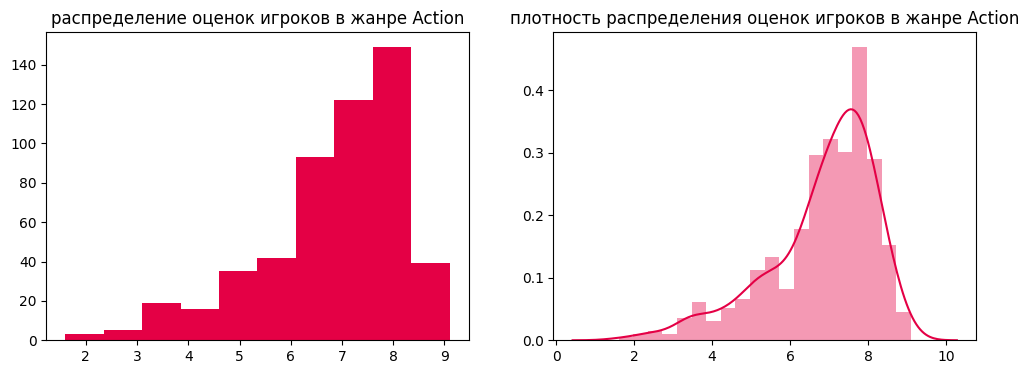

In [122]:
# парные диаграммы для жанра `Action`
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.title('распределение оценок игроков в жанре Action')
Action.hist(figsize=(12,4), grid=False, color='#E40045').set(ylabel='', xlabel='')

plt.subplot(1,2,2)
plt.title('плотность распределения оценок игроков в жанре Action')
sns.distplot(Action, color='#E40045').set(ylabel='', xlabel='')

plt.show()

In [123]:
# описательная статистика для пользовательских оценкок жанра `Sports`
Sports.describe().round(2)

count    194.00
mean       5.46
std        1.74
min        0.20
25%        4.30
50%        5.75
75%        6.80
max        8.80
Name: user_score, dtype: float64

In [124]:
# медианная оценка пользователей жанра `Sports`
Sports.median()

5.75

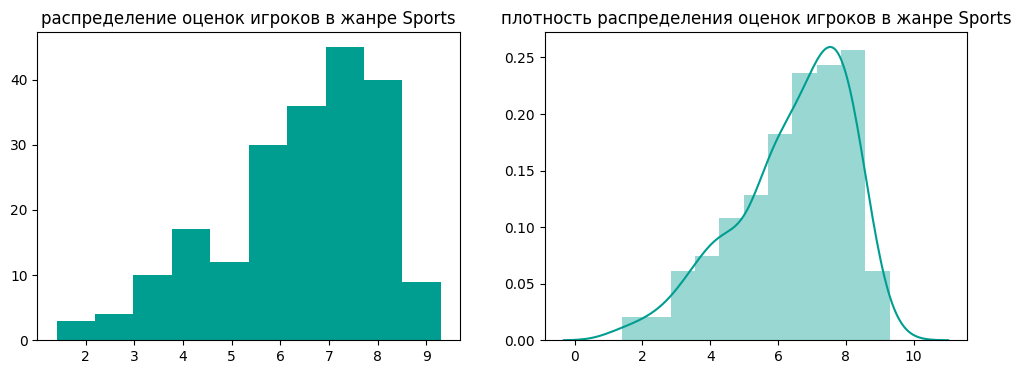

In [125]:
# парные диаграммы для жанра `Sports`
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.title('распределение оценок игроков в жанре Sports')
PC.hist(figsize=(12,4), grid=False, color='#009D91').set(ylabel='', xlabel='')

plt.subplot(1,2,2)
plt.title('плотность распределения оценок игроков в жанре Sports')
sns.distplot(PC, color='#009D91').set(ylabel='', xlabel='')

plt.show()

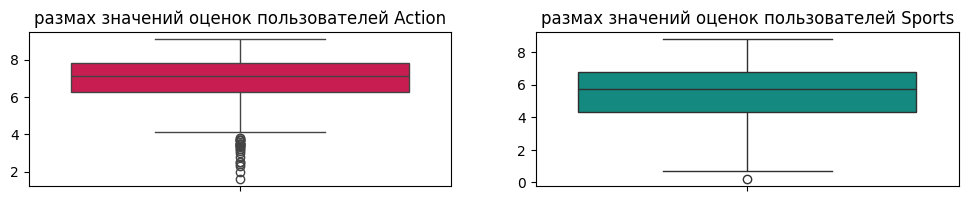

In [126]:
# парные диаграммы для жанров `Action` и `Sports`
plt.figure(figsize=(12,2))

plt.subplot(1,2,1)
plt.title('размах значений оценок пользователей Action')
sns.boxplot(Action, color='#E40045').set(ylabel='', xlabel='')

plt.subplot(1,2,2)
plt.title('размах значений оценок пользователей Sports')
sns.boxplot(Sports, color='#009D91').set(ylabel='', xlabel='')

plt.show()

На основании полученных выше расчётов мы можем сформировать обобщающие статистические данные по пользовательским оценкам игровых жанров `Action` и `Sports`. Они приведены в таблице ниже.

*Таблица 6. Обобщённые статистические данные по пользовательским оценкам игровых жанров `Action` и `Sports`*

|Наименование игрового жанра|Всего оценок|Минимальная оценка|Средняя оценка|Медианная оценка|Оценка Q3|Максимальная оценка|
|---------------------------|:-----------|:-----------------|:-------------|:---------------|:--------|:------------------|
|`Action`                   |523         |1.60              |6.83          |7.10            |7.80     |9.10               |
|`Sports`                   |194         |0.20              |5.46          |5.75            |6.80     |8.80               |

Количественная представленность пользовательских оценок по платформам различается незначительно. Игровой жанр `Action` очень популярен на протяжении многих десятилетий своего существования, в датафрейме представлено большое количество игрового ПО данной направленности - всего 523 позиции. `Sports` подразумевает игровое ПО узкой тематической направленности и представлно 194 записями. 

Минимальные и средние значения пользовательских оценок для обоих игровых жанров серьёзно разнятся и находятся в диапазоне от 0.2 до 1.6 и от 5.46 до 6.83 соответственно. Медианная оценка, большинство оценок в третьем квартиле и максимальная оценка в обоих жанрах сильно отличаются. Различие этих оценок хорошо заметно и в описательной статисике, на графиках плотности распределения `distplot`, на диаграммах размаха значений `boxplot`. В соответствии с заданием, нулевая гипотеза была сформулирована следующим образом: "Средние пользовательские рейтинги жанров Action и Sports разные". Сформулируем гипотезы:

$H_{0}: \text{средний пользовательский рейтинг жанра `Action`} = \text{средний пользовательский рейтинг жанра `Sports`}$
$H_{1}: \text{средние пользовательские рейтинг жанра `Action`} \neq  \text{средний пользовательский рейтинг жанра `Sports`}$

Установим пороговое значение:
$ \alpha = 0.05$

Поскольку в одной из гипотез присутствует знак неравенства, мы можем провести двусторонний тест. Полагаем возможным использование t-критерия с двумя выборками для сравнения среднего между двумя независимыми группами данных. Этот тест предполагает равенство дисперсий между этими двумя группами данных. Проверим дисперсию по каждой из имеющихся генеральных совокупностей данных:

In [127]:
# расчёт дисперсии данных по жанрам `Action` и `Sports`
var_Action = variance(Action)
var_Sports = variance(Sports)

print('Дисперсия по игровому жанру Action:', var_Action)
print('Дисперсия по платформе Sports:', var_Sports)

Дисперсия по игровому жанру Action: 1.889084049434811
Дисперсия по платформе Sports: 3.038542812883927


Итак, мы установили, что дисперсия между двумя группамми данных по игровым жанрам `Action` и `Sports` существенно отличаются. Следовательно, мы можем применить `t-критерий`. Для этого мы импортировали профильную библиотеку `SciPy` и выбрали из неё функцию `ttest_ind()` для двух независимых генеральных совокупностей данных. Синтаксис данного метода подразумевает наличие параметра `equal_var`, который описывает булевым значением истинность `True` или ложность `False` равенства дисперсии двух генеральных совокупностей. В нашем случае параметр `equal_var` будет ложным, поскольку мы выяснили, что дисперсии двух массивов данных значительно отличаются.

Если `p-value` будет меньше установленного критического уровня статистической значимости, то мы отвергнем нулевую гипотезу о равенстве средних пользовательских рейтингов игровых жанров `Action` и `Sports`. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу. Вычислим значения t-критерий:

In [128]:
# критический уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('cтатистика t-теста:', results.statistic)
print('двустороннее p-значение: ', results.pvalue)
print()
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

cтатистика t-теста: 9.863487132322389
двустороннее p-значение:  5.989458066467418e-20

Отвергаем нулевую гипотезу.


**Вывод:** Полученное p-значение больше установленного критического уровня статистической значимости 0.05, мы можем отклонить нулевую гипотезу теста. Разница в средних значениях пользовательских рейтингов игровых жанров `Action` и `Sports` статистически значима.

[к содержанию](#content) | [шаг 1](#1) | [шаг 2](#2) | [шаг 3](#3) | [шаг 4](#4) | [шаг 5](#5) | [шаг 6](#6)

<a id=6></a>
### 6. Выводы

Индустрия компьютерных игр зародилась в середине 1970-х годов как движение энтузиастов и за несколько десятилетий выросла из небольшого рынка в мейнстрим с годовой прибылью в 180,3 миллиардов долларов в США к 2021 году. Видеоигры внесли большой вклад в индустрию развлечений, и пока признаков замедления не наблюдается. За миллиарды лет человек эволюционировал от Homo Sapiens ("Человек Разумный") до Homo Ludens ("Человек Играющий"), и эта концепция нидерландского историка и культуролога Йохана Хёйзинга как нельзя лучше иллюстрирует развитие иговой индустрии. Играют все, независимо от пола и возраста, расы и вероисповедания. Сущность феномена игры настолько всеобъемлюща, что компании, производящие видеоигры, стали не только влиятельными игроками в современном технологическом секторе, но и законодателями мод и тенденций игрового процесса в глобальном масштабе. Рынок игровой индустрии с каждым годом будет оказывать всё больше финансовое и культурное влияние на мировом уровне, это неоспоримый факт.

<font color='blue'><b>Шаг 1.<b></font> Чтобы увеличить коммерческую успешность интернет-магазина "Стримчик", реализующего по всему миру компьютерные игры, нами был изучен датафрейм, содержащий исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. В целях изучения статистических данных нами была импортирована библиотека `pandas` для работы с массивами данных, `matplotlib` и `seaborn` для визуализации полученных результатов, модуль `variance` из библиотеки `statistics` для вычисления дисперсии и модуль `stats` библиотеки `SkiPy` для проверки гипотез. Осуществлена загрузка исходного файла с данными методом `read_csv`. В работу поступил датафрейм `games.csv.csv`, в котором содержится 16715 строк с информацией об игровом ПО в разрезе 11 признаков. Последовательное применение методов `min()`, `max()` и `unique()` позволило нам сформировать таблицу ниже:

|№ п/п| Наименование признака | Краткое описание                                       | Единицы измерения | Значение |
|---|:------------------------|:-------------------------------------------------------|:------------------|:---------|
|1. |`Name`            |название игры| название продукта | 11 560 |
|2. |`Platform`        |платформа| название платформы, всего 31 ед. | `2600`, `3DO`, `3DS`, `DC`, `DS`, `GB`, `GBA`, `GC`, `GEN`, `GG`, `N64`, `NES`, `NG`, `PC`, `PCFX`, `PS`, `PS2`, `PS3`, `PS4`, `PSP`, `PSV`, `SAT`, `SCD`, `SNES`, `TG16`, `Wii`, `WiiU`, `WS`, `X360`, `XB`, `XOne` |
|3. |`Year_of_Release` |год выпуска| дата, всего 38 ед. | 1980 - 2016 |
|4. |`Genre`           |жанр игры| название игрового жанра, всего 12 ед. |`Action`, `Adventure`, `Fighting`, `Misc`, `Platform`, `Puzzle`, `Racing`, `Role-Playing`, `Shooter`, `Simulation`, `Sports`, `Strategy`|
|5. |`NA_sales`        |продажи в Северной Америке | миллионы проданных копий | 0 - 41.36 |
|6. |`EU_sales`        |продажи в Европе | миллионы проданных копий | 0 - 28.96 |
|7. |`JP_sales`        |продажи в Японии | миллионы проданных копий | 0 - 10.22|
|8. |`Other_sales`     |продажи в других странах | миллионы проданных копий | 0 - 10.57 |
|9. |`Critic_Score`    |оценка критиков | оценка из максимально возможных 100 баллов | 13 - 98 |
|10. |`User_Score`      |оценка пользователей | оценка из максимально возможных 10 баллов, в том числе требующие уточнения рейтинги с маркировкой `tbd` | 0 - 9.7 |
|11. |`Rating`          |возрастной рейтинг| возрастная категория, всего 8 ед. |`AO`, `E`, `E10+`, `EC`, `K-A`, `M`, `RP`, `T`|

Перед нами стояла задача выявить определяющие успешность игры закономерности, поскольку это позволит сделать ставку на потенциально популярный продукт и спланировать предполагаемую рекламную кампанию на 2017 год.

<font color='blue'><b>Шаг 2.</b></font> Предварительно данные прошли обработку и очистку. С помощью метода `str.lower()` названия признаков приведены к нижнему регистру. В признаках `year_of_release` и `user_score` выполнено преобразование типа данных в соответствии со смысловым содержанием.
    
Выявлены и обработаны пропуски в признаках:
* `name`, `genre` (не подлежит восстановлению, удалено 2 строки);
* `year_of_release`(не подлежит восстановлению, удалено 269 строк, выявлена тенденция в равномерном уменьшении числа развлекательного игрового ПО, выпущенного после 2000 года, причиной которой является рост числа платформ-агрегаторов рецензий и отзывов (как игроков-любителей, так и профессиональных критиков);
* `user_score`, `critic_score` (не подлежит восстановлению, пропуски сохранены; значение `tbd` заменено на NaN)
* `rating` (восстановлено по логическому условию: релиз до 1994 года - `unrated`, релиз с 1994 года - `Not Rated by ERSB`).
    
В числе причин, которые могли привести к пропускам в исходных данных, мы можем указать ошибку выгрузки данных (практически равномерные потери данных в размере порядка 8400 строк по признакам `critic_score` и `user_score`); повреждение данных в процессе хранения или использования (потери 2 строк по признакам `name` и `genre`); объединение нескольких разных массивов данных могло привести к появлению пропусков в размере 6678 строк в признаке `raiting`. 

В целях проведения исследования был создан дополнительный признак `total_sales`, содержащий в себе суммарные продажи того или иного игрового ПО на всех рынках. Выполнена проверка на наличие полных и неполных дубликатов методами `duplicated().sum()` и по повторяющимся значениям в признаках `name`, `platform` и `year_of_release`. В завершении предварительной обработки данных датафрейм получил размер 16443 строки в разрезе 12 признаков. Потери данных составили 272 строки или 1,6%.

<font color='blue'><b>Шаг 3.</b></font> Исследовательский анализ данных поставил перед нами ряд вопросов.
    
<br><b>§3.1.</b> Установлена и визуализирована динамика рынка игрового ПО в период с 1980 по 2016 год, предложена следующая периодизация: развитие (1994 - 2001), становление (2002 - 2011), стабилизация (2012 - 2016). Для дальнейшего исследования и разработки рекламной кампании на условный 2017 год полагаем необходимым сосредоточиться на периоде стабильного существования рынка игрового развлекательного ПО с 2012 года.
    
<br><b>§3.2.</b> Развитие развлекательного игрового ПО неотъемлемо связано с технологическим оборудованием, на котором будет реализована игровая задача. Нами были изучены сроки появления и убывания всех представленных в датафрейме 31 игровых платформ, установлены пиковые значения по количеству миллионов копий проданных игр для каждой платформы. Из общего количества игровых платформ значительно выделяются <b>платформы с наибольшими суммарными продажами</b>: `PS`, `PS2`, `PS3`, `DS`, `Wii`, `X360`, где продажи превышали 100 млн. копий, а в случае с `X360` - превышали и 600 млн. копий. Был создан график с кривыми динамики развития каждой платформы в ретроспективе. Полученные значения движутся синхронно с основными тенденциями развития всемирного и регионального рынка игрового ПО и демонстируют, что <b>средний период длительности существования игровой платформы не превышает 10 лет.</b> 
    
<br><b>§3.3.</b> В результате исследования предыдущих вопросов установлен актуальный период для иссследования с 2012 по 2016 год включительно. Этот массив данных `df_stable` был получен нами методом `query` и имеет размер 2885 строк в разрезе 12 признаков.

<br><b>§3.4.</b> В контексте актуального массива данных нами была изучена динамика продаж игрового развлекательного ПО в разрезе 10 платформ, присутствующих на рынке в указанный временной период. В актуальном периоде лидерами по количеству проданных копий игровой продукции являются стационарные игровые консоли `PS3` и `PS4` семейства PlayStation от Sony. Учитывая длительность жизненного цикла игровой платформы в 10 лет, <b>реальным лидером по продажам</b> является `PS4`, а период пребывания на рынке `PS3` подходит к концу. Это подтверждается реальными историческими данными: официальная поддержка `PS3` прекращена в 2017 году, а `PS4` только в 2021 году. 

<b>Реальный рост показателей по продажам</b> демонстрируют карманная игровая консоль `3DS` (2011-2020) серии Nintendo DS и стационарная игровая консоль `XOne` (2013-2020) семейства Xbox от Microsoft, карманная игровая консоль `PSV` семейства PlayStation от Sony (жизненный цикл 2011 - 2019). При этом стационарная игровая консоль `X360` (жизненный цикл 2005 - 2016) семейства X360 от Microsoft завершает свой срок существования, и говорить о росте показателей здесь будет неуместно.

<b>Падение показателей продаж</b> в контексте реалий стоит воспринимать и понимать как прекращение выпуска официальных лицензионных игр на той или иной платформе. В разрезе актуального датафрейма это карманная игровая консоль `PSP` семейства PlayStation от Sony (жизненный цикл 2004 - 2015), карманная игровая консоль `DS` от ветеранов-долгожителей Nintendo (жизненный цикл 1985 - 2013), игровая приставка `Wii` тоже от Nintendo (жизненный цикл 2006 - 2016), а также семейство стационарных игровых консолей `PC`, выпущенное NEC в Японии в 1985 году, существовало до 2016 года. Реальное падение продаж характерно для консоли `WiiU` (жизненный цикл 2012 - 2017).
    
Чтобы сформировать <b>список потенциально прибыльных платформ</b> мы создали линейную диаграмму жизненных циклов игровых приставок. на нём мы выделили те игровые консоли, которые на момент 2016 года находятся в <i>активной фазе своего развития</i> и потому длительность их пребывания на рынке невелика (от 3 до 5 лет), а количество продаж игрового ПО весьма внушительные (от 53.81 млн. копий до 314.14 млн. копий). Зачастую это не уникальный вновь разработанный продукт, а модификации ранее созданных консолей, у которых уже сформировалась позитивная репутация среди игроков-любителей и критиков. Таким образом, к числу потенциально прибыльных платформ относятся `PS4`, `PS3`, `3DS`, `XOne`, `PSV`. Список этих платформ является вторым уточняющим фильтром данных для массива `df_stable_top5`.

<br><b>§3.5.</b> Глобальные продажи по этим платформам в период 2012 – 2016 годов были изучены на основании данных диаграммы размаха значений `barplot`. Нижний порог значений для всех платформ находится немногим выше нуля на отметке 0.01. По количеству продаж есть явный лидер `PS4`, догоняющие его платформы и отстающие. Верхние значения усов диаграммы `boxplot` всех платформ не превышают порога в 1.5 млн. проданных копий. Внутри "ящика" по каждой платформе медиана расположена примерно на одном уровне около 0.2 млн. копий. Эти "медианные" игры придают условной стабильности и длительности существования платформы. За этой границей у каждой топовой платформы находится целая вереница аномальных выбросов разной величины: буквально от 1.96 до 21.05 млн. проданных копий. Следовательно, каждая топовая платформа целенаправленно формирует стратегию на текущий год: выпуск некоторого количества "проходных" игр, которые абсолютно точно укладываются в усреднённые запросы потребителей, и выпуск одного потенциального бестселлера в жанре шутер / экшен с интересным, захватывающим сюжетом, хорошей графикой и высоким возрастным рейтингом.

<br><b>§3.6.</b> Чтобы уставноить меру влияния отзывов критиков и пользователей на продажи внутри одной популярной платформы `PS4` мы расчитали корреляцию этих признаков методом `corr`. Разброс оценок критиков и пользователей по этой платформе выглядит достаточно сбалансированным: медианные значения масштабированных оценок (10:1) находятся на отметке от 7 до 7.5.  На этой платформе случались и провальные игры с одинаково низкими оценками, там и признанные хиты с оценками до 9 – 10 баллов. Оценка критиков обладает умеренной корреляцией с продажами, одновременно с этим, мера корреляции с оценкой пользователей находится около нуля, и если понимать буквально, то от мнения пользователя количество продаж игрового контента для платформы PS4 никак не зависит. Эти выводы подкрепляются диаграммами рассеяния с линией регрессии `regplot`, показывающей тенденцию в данных.
    
<br><b>§3.7.</b> Аналогичное исследование по продажам игр на других платформах и их взаимосвязь с оценками критиков и пользователей  выявило, что для платформы `PS3` и `XOne` размах значений оценок и меры корреляции оценки критиков и пользователей ещё укладываются в общий концепт, то в отношении платформы Nintendo `3DS` голос пользователя с явным японским акцентом имеет большее значение и мера корреляции здесь вырастает до 0.19. Это значение в абсолютном смысле кажется малым, но на фоне остальных мер корреляции оценок пользователей – единственное положительное. Платформа `PSV` приятно удивляет обеими мерами корреляции, которые едва достигают 0.09 (оценка критиков) и -0.004 (оценка пользователей). Визуализация регрессивной взаимосвязи этих признаков с уровнем продаж помогает выявить причину такого положения дел: отзывы обеих сторон о платформе PSV в большинстве высокие позитивные, диапазон оценок критиков выше, чем у других платформ. Для всех приставок характерна взаимосвязь: рост одной величины (оценки профессионального критика) гарантирует рост величины количества проданных копий развлекательного игрового ПО, при этом мнение пользователя как таковое не имеет веса.

<br><b>§3.8.</b>Жанровое разнообразие игрового развлекательного ПО весьма и весьма обширно. В соответствии с заданием была поставлена задача изучить прибыльность жанров. Объективно, мы не располагаем информацией о стоимости продаваемого игрового ПО, в наличии только информация о количестве миллионов проданных копий игрового ПО. Следовательно, мы не можем выделить самые прибыльные жанры. Однако, на основании сводной таблицы по жанрам и их числовым характеристикам мы можем ответить на ключевые вопросы:
* самое большое количество выпущенных игр за период с 2012 по 2016 годы — в жанре `Action`, всего 1031 игра;
* самое маленькое количество выпущенных игр за период с 2012 по 2016 годы — в жанре `Puzzle`, всего 28 игр;
* самое высокое число продаж игр за период с 2012 по 2016 годы — в жанрах `Action` (441.12 млн.копий), `Shooter` (304.73 млн.копий). При этом <b>истинное первое место в этой "номинации" на самом деле принадлежит играм в жанре `Shooter`</b>: здесь самое высокое и среднее количество продаж (0.44 млн. копий) и медианное количество продаж (1.29 млн. копий). Число продаж на единицу игры в этом жанре также очень высокое на фоне остальных значений и равно 1.29. У игр в жанре `Action` этот показатель равен только 0.42.
* cамое низкое число продаж игр за период с 2012 по 2016 годы — в жанре `Puzzle` (4.89 млн.копий).

<font color='blue'><b>Шаг 4.</b></font> Региональные рынки развлекательного игрового ПО в датафрейме представлены тремя крупными географическими регионами: Северная Америка, Европа и Япония. В силу объективных причин, таких, как культурный код, особенности национального менталитета, демографический состав населения, уровень жизни стран, спрос и предложение каждого рынка могут оказаться  разными.

<br><b>§4.1.Самые популярные платформы (топ-5)</b> Мы выявили переломный момент убывания старых платформ и роста активности продаж новичков на рынке игрового ПО. Окончательная смена одного поколения игровых консолей другим произошла в 2013 году. В Северной Америке и Европе с 2014 года бессменными лидерами продаж являются платформы `PS4` и `XOne`, остальные платформы существуют на приличной дистанции и по продажам не выбиваются дальше 20 млн. копий. Собственно, диапазон значений от 20 до 30 млн. копий и является своеобразным рубежом между обычной популярностью платформы и культовым ошеломительным успехом у пользователей. Доля продаж платформ `PS3`, `3DS3`, `PSV` составляет порядка 10% для Северной Америки и чуть меньше 10% для Европы. Стоит также отметить, что платформа `3DS` находится в зените своего существования и по динамике продаж уверенно движется к успеху, и это характерно для англоязычного сегмента.

Японский рынок является довольно своеобразным, и в нём популярность домашних стационарных консолей с каждым годом падает. В стране восходящего Солнца гораздо больше ценятся портативные устройства и смартфоны, позволяющие играть «на ходу». Именно поэтому в Японии популярны платформы `PS4` и `XOne`, хотя последняя потеряла своего японского покупателя за два года пребывания на рынке. Здесь же могли сказаться и пользовательские характеристики, которые и без того оттолкнули пользователей: требование постоянного подключения приставки `XOne` к сети, региональная блокировка и привязка игр к аккаунту.

<br><b>§4.2.Самые популярные жанры (топ-5)</b> Историческая культурная и языковая общность Северной Америки и Европы позволяет нам объяснить тождественность топовых игровых жанров на этих рынках: в лидерах на протяжении всего актуального периода мы видим неизменные шутеры и экшены, пиковые значения популярности приходятся на 2013 год. Именно в этом году выходят культовые Diablo III, Watch Dogs, Wolfstein, Far Cry 4, Assasin’s Creed. В Северной Америке оба этих жанра пользуются огромной популярностью у пользователей. в общем и целом европейский рынок более ровный, динамика показателей отличается плавностью. В конце 2015 года мы видим равномерное присутствие на игровом европейском рынке шутеров, экшенов и спортивных игр. Японский рынок сосредоточен вокруг экшенов и RPG, они сменяют друг друга в серьёзной борьбе за интерес пользователя. Остальные игровые жанры в Японии очень мало представлены и далеко дистанцированы от лидеров по уровню количества продаж.

<br><b>§4.3.Влияние рейтингов ERSB на продажи в регионе</b> Между этими признаками существует взаимосвязь. Так, в Северной Америке (США, Канада, Мексика) рынок игрового ПО прочно занят видеоиграми рейтинга `M`, сюжет которых подразумевает детальное описание или визуализацию сцен насилия, нецензурную речь, демонстрацию оружия и прочие «радости» взрослой жизни. Им в популярности совсем немного уступают подростковая ниша видеоигр с рейтингом `Т`. О детской аудитории производители думают в самую последнюю очередь, и внутренний ребёнок, требующий кровожадных развлечений, выходит на первый план.

За весь актуальный период европейский рынок только единожды попал под влияние американского ажиотажа, и пиковый всплеск интереса к видеоиграм для взрослой аудитории возник и пропал у европейцев всего за один год: с 2013 по 2014 гг.

Японский рынок развлекательного игрового ПО живёт своей жизнью: RPG рассчитанная своим сюжетом и содержанием на подростков – хит продаж. Хотя японский рынок начинался как семейный – и об этом свидетельствуют данные – он достаточно резко отвернулся от общедоступных сюжетов и переключился на жадную до эмоций и ощущений подростковую аудиторию. Кривая спроса на графике доказывает, что эта стратегия была, есть и остаётся на момент 2016 года самой прибыльной и живучей для именно этого региона.

На графиках всех регионов хорошо заметно, как с 2014 - 2015 годов начинает резко снижаться количество видеоигр без возрастного рейтинга. В Северной Америке ушёл почти год на то, чтобы повсеместно внедрить в жизнь рейтинг ERSB. Появились проекты Metacritic и его антагонист OpenCritic. Сознательность и законопослушность европейцев вкупе с малыми территориями привели к феноменальным результатам, хотя и по сей день доля видеоигр без возрастной маркировки на этом рынке остаётся высокой. Но и эти высокие значения не идут ни в какое сравнение с Японским рынком: более половины (!) видеоигр, присутствующих на японском рынке, не имеют возрастного рейтинга. Кроме потенциальных различий в системе присвоения рейтинга и невозможности корректной трансформации данных, имеется ещё один важный аспект: крупнейшему англоязычному агрегатору OpenCritic пришлось отказаться от размещения на сайте видеоигр для платформ Nintendo 3DS и PlayStation Vita (обе – японские) из-за возникших сложностей в предоставлении разработчиками геймплейных видео и скриншотов. Обе платформы входят в число топовых как в Японии, так и повсеместно, и следовательно, количество игровой продукции, неохваченной зорким оком возрастной рейтинговой системы, для них также очень велико.

<b>Характерные черты портрета пользователя для исследуемых регионов выглядят следующим образом:</b>
* **Северная Америка (США, Канада, Мексика).** Любители видеоигр с наибольшей вероятностью имеют игровую платформу `PS4` или `XOne`, самый любимый игровой жанр: `Action`, `Shooter` и `Sports`, в этих играх очень выской возрастной ценз.
* **Европа**. Существует большая вероятность, что у европейского геймера игровая консоль `PS4` или `XOne`, на которой зачастую запускают игры жанра `Action`, `Shooter` и `Sports`. Маркировка возрастного ценза: для взрослой аудитории.
* **Япония** Патриотичные настроения японского общества редко расходятся с делом: у геймеров в руках портативная игровая консоль Nintendo `3DS` или подключена `PS4`. Наиболее популярные жанры `Action` и `Role-Playing`, среди оставшихся жанров можно выделить `Shooter`. Японцы предпочитают игры с без рейтинга или с маркировкой `T` для подростков.

<font color='blue'><b>Шаг 5.</b></font> Проверка гипотез выполнена с помощью `t-критерия`, установлено, что средние пользовательские рейтинги платформ XOne и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные.

<font color='blue'><b>В заключении</b></font> хотим отметить, что в течение всего срока существования рынка игрового развлекательного ПО сами игры были и остаются движущей силой развития компьютерных технологий. Несмотря на солидный возраст, в этой индустрии по-прежнему нет стабильности, новые компании неожиданно появляются на рынке и также быстро исчезают с него. За период с 2012 по 2016 годы было создано и стали популярными множество казуальных и инди-игр, росло и крепло направление игр для мобильных платформ. Миниатюризация аппаратного обеспечения и массовое распространение мобильных телефонов способствовало появлению мобильных игровых приложений; появилось направление создания игр для социальных сетей. Коммерческая успешность интернет-магазина "Стримчик", реализующего по всему миру компьютерные игры, с большой долей вероятности будет достигнута в случае реализации рекламной кампании на период 2017 года в разрезе следующх логических условий, установленных в ходе данного исследования:

|Региональный рынок игрового ПО|Игровая платформа   |Игровой жанр | Возрастной рейтинг | Ожидаемые продажи, млн.копий    |
|------------------------------|:-------------------|:------------|:-------------------|:--------------------------------|
|Северная Америка  |`PS4`, `XOne`, `3DS`, `PS3`, `X360`|`Action`, `Shooter`, `Sports`|`M`, без рейтинга, `T` |0.34 - 4.31|
|Европа            |`PS4`, `XOne`, `3DS`, `PS3`, `X360`|`Action` `Shooter`, `Sports` |`M`, `E`, `T`          |0.41 - 5.02|
|Япония            |`PS4`, `3DS`, `PSV`, `PS3`, `WiiU` |`Action`, `Role-Play`        |без рейтинга, `T`, `E` |0.07 - 0.86|

Полагаем, что цель исследования достигнута, и практическая работа по анализу рынка игровой индустрии выполнена.

[к содержанию](#content) | [шаг 1](#1) | [шаг 2](#2) | [шаг 3](#3) | [шаг 4](#4) | [шаг 5](#5) | [шаг 6](#6)